Terdapat 2 sektor saham yang akan dilakukan prediksi, sektor Alat Berat & Tambang dan sektor bank: 

1. UNTR 
2. HEXA
3. KOBX
4. PTRO

Sektor Bank:
1. BBCA 
2. BNI (BBNI)
3. BRI (BBRI)
4. Bank Mandiri (BMRI)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.stats import norm

In [3]:
untr = pd.read_csv("UNTR.JK.csv")
hexa = pd.read_csv("HEXA.JK.csv")
kobx = pd.read_csv("KOBX.JK.csv")
ptro = pd.read_csv("PTRO.JK.csv")
bbca = pd.read_csv("BBCA.JK.csv")
bbni = pd.read_csv("BBNI.JK.csv")
bbri = pd.read_csv("BBRI.JK.csv")
bmri = pd.read_csv("BMRI.JK.csv")
mega = pd.read_csv("MEGA.JK.csv")
bdmn = pd.read_csv("BDMN.JK.csv")
ihsg = pd.read_csv("JKSE.csv")
lq45 = pd.read_csv("JKLQ45.csv")

In [4]:
ihsg

Date         Open         High          Low        Close  \
0     2016-01-04  4580.165039  4603.824219  4525.918945  4525.918945   
1     2016-01-05  4527.431152  4594.340820  4527.003906  4557.821777   
2     2016-01-06  4563.653809  4639.236816  4562.573242  4608.981934   
3     2016-01-07  4573.692871  4577.636230  4530.448242  4530.448242   
4     2016-01-08  4524.862793  4550.907227  4507.414063  4546.288086   
...          ...          ...          ...          ...          ...   
1829  2023-04-28  6945.477051  6958.672852  6897.708984  6915.715820   
1830  2023-05-02  6915.715820  6920.335938  6814.344238  6863.301758   
1831  2023-05-03  6863.301758  6865.611816  6776.895996  6812.722168   
1832  2023-05-04  6812.722168  6846.124023  6780.086914  6844.026855   
1833  2023-05-05  6844.026855  6851.585938  6733.775879  6787.630859   

        Adj Close       Volume  
0     4525.918945   21276600.0  
1     4557.821777   24364900.0  
2     4608.981934   29976300.0  
3     4530.448242   24018600.0  
4     4546.288086   23991300.0  
...           ...          ...  
1829  6915.715820  130620700.0  
1830  6863.301758  136480100.0  
1831  6812.722168  121306900.0  
1832  6844.026855  137517900.0  
1833  6787.630859  148189400.0  

[1834 rows x 7 columns]

In [5]:
# memanggil dataframe untuk saham UNTR
untr

Date     Open     High      Low    Close     Adj Close      Volume
0     2015-01-02  17375.0  17375.0  17200.0  17300.0   9781.608398    984800.0
1     2015-01-05  17350.0  17350.0  16850.0  16875.0   9541.307617   2324800.0
2     2015-01-06  16875.0  17075.0  16850.0  16950.0   9583.714844   3469900.0
3     2015-01-07  17000.0  17075.0  16875.0  17025.0   9626.120117   1423600.0
4     2015-01-08  17150.0  17150.0  16900.0  16900.0   9555.442383   2006500.0
...          ...      ...      ...      ...      ...           ...         ...
2074  2023-04-28  28900.0  28900.0  28900.0  28900.0  28900.000000   1804800.0
2075  2023-05-02  26900.0  26900.0  26900.0  26900.0  26900.000000   1180700.0
2076  2023-05-03  25025.0  25025.0  25025.0  25025.0  25025.000000   9696100.0
2077  2023-05-04  24900.0  24975.0  24500.0  24500.0  24500.000000  19490700.0
2078  2023-05-05  24400.0  24400.0  23975.0  24150.0  24150.000000  10333700.0

[2079 rows x 7 columns]

In [6]:
# mengatahui informasi pada dataframe saham UNTR
untr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2079 non-null   object 
 1   Open       2078 non-null   float64
 2   High       2078 non-null   float64
 3   Low        2078 non-null   float64
 4   Close      2078 non-null   float64
 5   Adj Close  2078 non-null   float64
 6   Volume     2078 non-null   float64
dtypes: float64(6), object(1)
memory usage: 113.8+ KB


In [7]:
def current_stock_price(data, year_month):
    index_saham = data[data['Date'] ==data[data['year_month'] == year_month]["Date"].min() ].index.item()
    list_prev_year_month = data[index_saham:]["prev_year_month"].unique()
    
    tanggal_awal_prev_year_month=[]
    for i in list_prev_year_month:
        tanggal_awal_prev_year_month.append(str(data[data['year_month'] ==i]["Date"].min()))
    
    index_prev_year_month = []
    for i in tanggal_awal_prev_year_month:
        index_prev_year_month.append(data[data['Date'] == i].index.item())
        
    panjang_month_year = []
    for i in data["year_month"][index_saham:].unique():
        panjang_month_year.append(len(data[data["year_month"] == i]))
        
    index_akhir = [index_prev_year_month + panjang_month_year for index_prev_year_month, panjang_month_year in zip(index_prev_year_month , panjang_month_year)]
    
    z = []
    for index_prev_year_month, index_akhir in zip(index_prev_year_month, index_akhir):
        z.append(np.r_[index_prev_year_month:index_akhir])
        
    np.hstack(z)
    
    current_stock = np.array(data.loc[np.hstack(z),["Close"]])
    data.loc[index_saham:, "current_stock_price"] = current_stock
    return data

In [8]:
def mean_daily_price_change(data,year_month):
    index_saham_awal = data[data['Date'] == data[data['year_month'] == year_month]["Date"].min()].index.item()
    index_awal_prev_year_month = data[data["year_month"] == str(data.loc[index_saham_awal:, "prev_year_month"].unique()[0])]["Date"].min()
    
    # tabel daily price change
    data["daily_price_change"] =np.log(data[data[data["Date"] == index_awal_prev_year_month].index.item() - 1 : ]["Close"]/data[data[data["Date"] == index_awal_prev_year_month].index.item() - 1 : ]["Close"].shift())
    df_daily_price_change = data.loc[data[data["Date"] == index_awal_prev_year_month].index.item() - 1:, ["year_month", "daily_price_change"]]
    df_daily_price_change
    
    # tabel pivot mean daily price change
    df_mean_daily_price_change=data.groupby("year_month")[["daily_price_change"]].mean().dropna()
    df_mean_daily_price_change.reset_index(inplace=True)
    df_mean_daily_price_change.rename(columns={"year_month" : "prev_year_month",
                                               "daily_price_change" : "mean_daily_price_change"}, inplace=True)
    df_mean_daily_price_change
    
    # melakukan vlookup pada kolom prev_year_month
    df_vlookup = pd.merge(left=data, right=df_mean_daily_price_change, how='left', on="prev_year_month")
    return df_vlookup

In [9]:
def perhitungan(data,index):
    fg = (data.loc[index,["Date"]] - pd.DateOffset(months=2)).dt.to_period("M")["Date"]
    fh = str(data[data['year_month'] ==fg]["Date"].min())
    len(data[ data[data['Date'] == fh].index.item():index+1])
    return len(data[ data[data['Date'] == fh].index.item():index+1])

def jumlah_hari_perdagangan_sebulan(data,year_month):
    index_saham = data[data['Date'] ==data[data['year_month'] == year_month]["Date"].min() ].index.item()
    
    hari_sebulan = []
    for index, row in data.loc[index_saham:].iterrows():
        hari_sebulan.append(perhitungan(data, index))
        
    data.loc[index_saham:, "Jumlah_hari_perdagangan_sebulan"] = hari_sebulan
        
    return data

In [10]:
def perhitungan_setahun(data,index):
    tahun_bulan = data.loc[index,["year_month"]]["year_month"]
    awal_tahun_bulan_tanggal = data[data["year_month"] == tahun_bulan]["Date"][index]
    range_awal = (awal_tahun_bulan_tanggal - pd.DateOffset(years=1)).strftime("%Y-%m")
    range_awal_full = data[data["year_month"] == range_awal]["Date"].min()
    index_range_awal = data[data["Date"] == range_awal_full].index.item()
    range_akhir = (awal_tahun_bulan_tanggal - pd.DateOffset(months=1)).strftime("%Y-%m")
    range_akhir_full = data[data["year_month"] == range_akhir]["Date"].max()
    index_range_akhir = data[data["Date"] == range_akhir_full].index.item()
    return len(data.loc[index_range_awal:index_range_akhir])


def jumlah_hari_perdagangan_setahun(data,year_month):
    index_saham = data[data['Date'] ==data[data['year_month'] == year_month]["Date"].min() ].index.item()
    
    setahun = []
    for index, row in data.loc[index_saham:].iterrows():
        setahun.append(perhitungan_setahun(data,index))
        
    data.loc[index_saham:, "Jumlah_hari_perdagangan_setahun"] = setahun
        
    return data

In [11]:
# membuat tabel std 
def perhitungan_stock_price(data,index):
    # membuat tabel baru yang tabel standar deviasi 
    tahun_bulan = data.loc[index,["year_month"]]["year_month"]
    awal_tahun_bulan_tanggal = data[data["year_month"] == tahun_bulan]["Date"][index]
    range_awal = (awal_tahun_bulan_tanggal - pd.DateOffset(years=1)).strftime("%Y-%m")
    range_akhir = data.iloc[-1]["year_month"]
    list_std = data[data["year_month"].between(range_awal, range_akhir)]["year_month"].unique()
    list_std = list(list_std.astype(str))
    
    nilai_std = []
    for i in list_std:
        nilai_std.append(round(data[data["year_month"] == i]["Close"].std(), 4))
        
    dict = {"Date":list_std, "Std":nilai_std}
    tabel_std = pd.DataFrame(dict)
    
    # melakukan perhitungan stock volatility berdasarkan tabel standar deviasi
    tahun_bulan_std = data.loc[index,["year_month"]]["year_month"]
    awal_tahun_bulan_tanggal_std = data[data["year_month"] == tahun_bulan_std]["Date"][index]
    range_awal_std = (awal_tahun_bulan_tanggal_std - pd.DateOffset(years=1)).strftime("%Y-%m")
    range_awal_tabel = tabel_std[tabel_std["Date"] == range_awal_std].index.item()
    sum(tabel_std[range_awal_tabel:12]["Std"])
    return sum(tabel_std[range_awal_tabel:12]["Std"])

def stock_volatility(data,year_month):
    index_saham = data[data['Date'] ==data[data['year_month'] == year_month]["Date"].min() ].index.item()
    
    stock_volatility = []
    for index, row in data.loc[index_saham:].iterrows():
        stock_volatility.append(perhitungan_stock_price(data,index))
        
    data.loc[index_saham:, "stock_volatility"] = stock_volatility
        
    return data

In [12]:
def black_scholes(data, divident_yield, risk_free):
    data["strike_price"] = data["current_stock_price"] * np.exp(data["mean_daily_price_change"])
    data["time_to_maturity"] = data["Jumlah_hari_perdagangan_sebulan"] / data["Jumlah_hari_perdagangan_setahun"]
    data["divident_yield"] = float(divident_yield)
    data["risk_free"] = float(risk_free)
    data["d1"] = (np.log(data["current_stock_price"]/data["strike_price"]) + (data["risk_free"]-data["divident_yield"]+((data["stock_volatility"]**2)/2)*data["time_to_maturity"]))/(data["stock_volatility"]*np.sqrt(data["time_to_maturity"]))
    data["d2"] = (np.log(data["current_stock_price"]/data["strike_price"]) + (data["risk_free"]-data["divident_yield"]-((data["stock_volatility"]**2)/2)*data["time_to_maturity"]))/(data["stock_volatility"]*np.sqrt(data["time_to_maturity"]))
    data["N(d1)"] = norm.cdf(data["d1"])
    data["N(d2)"] = norm.cdf(data["d2"])
    data["N(-d1)"] = norm.cdf(-data["d1"])
    data["N(-d2)"] = norm.cdf(-data["d2"])
    data["C"] = data["current_stock_price"] * np.exp(-data["divident_yield"]*data["time_to_maturity"]) * data["N(d1)"] - data["strike_price"] * np.exp(-data["risk_free"]*data["time_to_maturity"]) * data["N(d2)"]
    data["P"] = data["strike_price"] * np.exp(-data["risk_free"]*data["time_to_maturity"]) * data["N(-d2)"] - data["current_stock_price"] * np.exp(-data["divident_yield"]*data["time_to_maturity"]) * data["N(-d1)"]
    data["average_black_scholes"] = (data["C"] + data["P"]) / 2

## Data Pre-processing 

In [13]:
# melakukan drop pada kolom tertentu dan mengubah Dtype pada kolom Date menjadi datetime64

# untr
untr['Date'] = pd.to_datetime(untr["Date"], format='%Y-%m-%d')
untr.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# hexa
hexa['Date'] = pd.to_datetime(hexa["Date"], format='%Y-%m-%d')
hexa.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# kobx
kobx['Date'] = pd.to_datetime(kobx["Date"], format='%Y-%m-%d')
kobx.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# ptro
ptro['Date'] = pd.to_datetime(ptro["Date"], format='%Y-%m-%d')
ptro.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# bbca
bbca['Date'] = pd.to_datetime(bbca["Date"], format='%Y-%m-%d')
bbca.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# bbni
bbni['Date'] = pd.to_datetime(bbni["Date"], format='%Y-%m-%d')
bbni.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# bbri
bbri['Date'] = pd.to_datetime(bbri["Date"], format='%Y-%m-%d')
bbri.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# bmri
bmri['Date'] = pd.to_datetime(bmri["Date"], format='%Y-%m-%d')
bmri.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# mega
mega['Date'] = pd.to_datetime(mega["Date"], format='%Y-%m-%d')
mega.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# bdmn
bdmn['Date'] = pd.to_datetime(bdmn["Date"], format='%Y-%m-%d')
bdmn.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# ihsg
ihsg['Date'] = pd.to_datetime(ihsg["Date"], format='%Y-%m-%d')
ihsg.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

# lq45
lq45['Date'] = pd.to_datetime(lq45["Date"], format='%Y-%m-%d')
lq45.drop(["Open", "High","Low", "Adj Close", "Volume"], axis=1, inplace=True)

In [14]:
# informasi baru untuk saham UNTR
untr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079 entries, 0 to 2078
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2079 non-null   datetime64[ns]
 1   Close   2078 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.6 KB


In [15]:
# membuat kolom year_month & prev_year_month pada setiap DataFrame saham sektor alat berat dan sektor Bank

# untr
untr['year_month'] = untr['Date'].dt.to_period('M')
untr['prev_year_month'] = (untr['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# hexa
hexa['year_month'] = hexa['Date'].dt.to_period('M')
hexa['prev_year_month'] = (hexa['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# kobx
kobx['year_month'] = kobx['Date'].dt.to_period('M')
kobx['prev_year_month'] = (kobx['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# ptro
ptro['year_month'] = ptro['Date'].dt.to_period('M')
ptro['prev_year_month'] = (ptro['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# bbca
bbca['year_month'] = bbca['Date'].dt.to_period('M')
bbca['prev_year_month'] = (bbca['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# bbni
bbni['year_month'] = bbni['Date'].dt.to_period('M')
bbni['prev_year_month'] = (bbni['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# bbri
bbri['year_month'] = bbri['Date'].dt.to_period('M')
bbri['prev_year_month'] = (bbri['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# bmri
bmri['year_month'] = bmri['Date'].dt.to_period('M')
bmri['prev_year_month'] = (bmri['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# mega
mega['year_month'] = mega['Date'].dt.to_period('M')
mega['prev_year_month'] = (mega['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

# bdmn
bdmn['year_month'] = bdmn['Date'].dt.to_period('M')
bdmn['prev_year_month'] = (bdmn['Date'] - pd.DateOffset(months=1)).dt.to_period("M")

In [16]:
untr.head(30)

Date    Close year_month prev_year_month
0  2015-01-02  17300.0    2015-01         2014-12
1  2015-01-05  16875.0    2015-01         2014-12
2  2015-01-06  16950.0    2015-01         2014-12
3  2015-01-07  17025.0    2015-01         2014-12
4  2015-01-08  16900.0    2015-01         2014-12
5  2015-01-09  17100.0    2015-01         2014-12
6  2015-01-12  17075.0    2015-01         2014-12
7  2015-01-13  17475.0    2015-01         2014-12
8  2015-01-14  17450.0    2015-01         2014-12
9  2015-01-15  17425.0    2015-01         2014-12
10 2015-01-16  17250.0    2015-01         2014-12
11 2015-01-19  17050.0    2015-01         2014-12
12 2015-01-20  17125.0    2015-01         2014-12
13 2015-01-21  17150.0    2015-01         2014-12
14 2015-01-22  17625.0    2015-01         2014-12
15 2015-01-23  17875.0    2015-01         2014-12
16 2015-01-26  18050.0    2015-01         2014-12
17 2015-01-27  18200.0    2015-01         2014-12
18 2015-01-28  18200.0    2015-01         2014-12
19 2015-01-29  18200.0    2015-01         2014-12
20 2015-01-30  17900.0    2015-01         2014-12
21 2015-02-02  17600.0    2015-02         2015-01
22 2015-02-03  17900.0    2015-02         2015-01
23 2015-02-04  18025.0    2015-02         2015-01
24 2015-02-05  18000.0    2015-02         2015-01
25 2015-02-06  18500.0    2015-02         2015-01
26 2015-02-09  18125.0    2015-02         2015-01
27 2015-02-10  18450.0    2015-02         2015-01
28 2015-02-11  18575.0    2015-02         2015-01
29 2015-02-12  18600.0    2015-02         2015-01

## Menghitung nilai Black-Scholes

### UNTR (United Tractor)

In [17]:
# mencari current stock price 
current_stock_price(data=untr, year_month="2016-01")

# mencari mean daily price change
untr = mean_daily_price_change(data=untr, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=untr, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=untr, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=untr, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=untr, divident_yield=0.2771, risk_free=0.0575)

In [18]:
untr

Date    Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  17300.0    2015-01         2014-12                  NaN   
1    2015-01-05  16875.0    2015-01         2014-12                  NaN   
2    2015-01-06  16950.0    2015-01         2014-12                  NaN   
3    2015-01-07  17025.0    2015-01         2014-12                  NaN   
4    2015-01-08  16900.0    2015-01         2014-12                  NaN   
...         ...      ...        ...             ...                  ...   
2074 2023-04-28  28900.0    2023-04         2023-03              27700.0   
2075 2023-05-02  26900.0    2023-05         2023-04              28850.0   
2076 2023-05-03  25025.0    2023-05         2023-04              29625.0   
2077 2023-05-04  24500.0    2023-05         2023-04              29800.0   
2078 2023-05-05  24150.0    2023-05         2023-04              29800.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074           -0.072562                 0.002005   
2075           -0.071715                -0.000493   
2076           -0.072251                -0.000493   
2077           -0.021202                -0.000493   
2078           -0.014389                -0.000493   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free           d1           d2  N(d1)  \
0                  NaN  ...     0.0575          NaN          NaN    NaN   
1                  NaN  ...     0.0575          NaN          NaN    NaN   
2                  NaN  ...     0.0575          NaN          NaN    NaN   
3                  NaN  ...     0.0575          NaN          NaN    NaN   
4                  NaN  ...     0.0575          NaN          NaN    NaN   
...                ...  ...        ...          ...          ...    ...   
2074        11529.3646  ...     0.0575  2720.246369 -2720.246451    1.0   
2075        11201.1308  ...     0.0575  2160.107825 -2160.107927    1.0   
2076        11201.1308  ...     0.0575  2189.903825 -2189.903925    1.0   
2077        11201.1308  ...     0.0575  2219.299824 -2219.299923    1.0   
2078        11201.1308  ...     0.0575  2248.311512 -2248.311609    1.0   

      N(d2)  N(-d1)  N(-d2)             C             P  average_black_scholes  
0       NaN     NaN     NaN           NaN           NaN                    NaN  
1       NaN     NaN     NaN           NaN           NaN                    NaN  
2       NaN     NaN     NaN           NaN           NaN                    NaN  
3       NaN     NaN     NaN           NaN           NaN                    NaN  
4       NaN     NaN     NaN           NaN           NaN                    NaN  
...     ...     ...     ...           ...           ...                    ...  
2074    0.0     0.0     1.0  26042.504301  27402.495292           26722.499797  
2075    0.0     0.0    

In [19]:
untr.to_csv("Perhitungan black-scholes saham UNTR_2.csv")

In [20]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

untr_saham = untr.copy()

untr_saham = untr_saham.dropna().set_index(["Date"])
untr_saham = untr_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

untr_saham

Close  average_black_scholes
Date                                      
2016-01-04  16100.0           15857.755578
2016-01-05  16350.0           16090.126154
2016-01-06  16725.0           15642.088912
2016-01-07  16225.0           15218.923495
2016-01-08  16250.0           15329.961662
...             ...                    ...
2023-04-28  28900.0           26722.499797
2023-05-02  26900.0           28137.564056
2023-05-03  25025.0           28873.671769
2023-05-04  24500.0           29024.382353
2023-05-05  24150.0           29004.550699

[1831 rows x 2 columns]

In [21]:
untr_saham

Close  average_black_scholes
Date                                      
2016-01-04  16100.0           15857.755578
2016-01-05  16350.0           16090.126154
2016-01-06  16725.0           15642.088912
2016-01-07  16225.0           15218.923495
2016-01-08  16250.0           15329.961662
...             ...                    ...
2023-04-28  28900.0           26722.499797
2023-05-02  26900.0           28137.564056
2023-05-03  25025.0           28873.671769
2023-05-04  24500.0           29024.382353
2023-05-05  24150.0           29004.550699

[1831 rows x 2 columns]

### HEXA 

In [22]:
# mencari current stock price 
current_stock_price(data=hexa, year_month="2016-01")

# mencari mean daily price change
hexa = mean_daily_price_change(data=hexa, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=hexa, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=hexa, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=hexa, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=hexa, divident_yield=0.1426, risk_free=0.0575)

In [23]:
hexa

Date   Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  3505.0    2015-01         2014-12                  NaN   
1    2015-01-05  3510.0    2015-01         2014-12                  NaN   
2    2015-01-06  3510.0    2015-01         2014-12                  NaN   
3    2015-01-07  3550.0    2015-01         2014-12                  NaN   
4    2015-01-08  3545.0    2015-01         2014-12                  NaN   
...         ...     ...        ...             ...                  ...   
2074 2023-04-28  5700.0    2023-04         2023-03               5050.0   
2075 2023-05-02  5650.0    2023-05         2023-04               5150.0   
2076 2023-05-03  5550.0    2023-05         2023-04               5150.0   
2077 2023-05-04  5525.0    2023-05         2023-04               5150.0   
2078 2023-05-05  5550.0    2023-05         2023-04               5175.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074           -0.004376                -0.000458   
2075           -0.008811                 0.006902   
2076           -0.017858                 0.006902   
2077           -0.004515                 0.006902   
2078            0.004515                 0.006902   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free          d1          d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
1                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
2                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
3                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
4                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
...                ...  ...        ...         ...         ...    ...    ...   
2074         1548.6425  ...     0.0575  365.387687 -365.387919    1.0    0.0   
2075         1641.1150  ...     0.0575  316.484458 -316.484749    1.0    0.0   
2076         1641.1150  ...     0.0575  320.849971 -320.850258    1.0    0.0   
2077         1641.1150  ...     0.0575  325.156879 -325.157161    1.0    0.0   
2078         1641.1150  ...     0.0575  329.407479 -329.407759    1.0    0.0   

      N(-d1)  N(-d2)            C            P  average_black_scholes  
0        NaN     NaN          NaN          NaN                    NaN  
1        NaN     NaN          NaN          NaN                    NaN  
2        NaN     NaN          NaN          NaN                    NaN  
3        NaN     NaN          NaN          NaN                    NaN  
4        NaN     NaN          NaN          NaN                    NaN  
...      ...     ...          ...          ...                    ...  
2074     0.0     1.0  4892.166277  4983.471420            4937.818849  
2075     0.0     1.0  5041.902503  5141.500241 

In [24]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

hexa_saham = hexa.copy()

hexa_saham = hexa_saham.dropna().set_index(["Date"])
hexa_saham = hexa_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

hexa_saham

Close  average_black_scholes
Date                                     
2016-01-04  1235.0            1325.393958
2016-01-05  1250.0            1315.075866
2016-01-06  1230.0            1314.539538
2016-01-07  1255.0            1270.040526
2016-01-08  1210.0            1293.936539
...            ...                    ...
2023-04-28  5700.0            4937.818849
2023-05-02  5650.0            5091.701372
2023-05-03  5550.0            5089.605577
2023-05-04  5525.0            5087.510802
2023-05-05  5550.0            5110.103537

[1831 rows x 2 columns]

### KOBX

In [25]:
# mencari current stock price 
current_stock_price(data=kobx, year_month="2016-01")

# mencari mean daily price change
kobx = mean_daily_price_change(data=kobx, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=kobx, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=kobx, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=kobx, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=kobx, divident_yield=0.0375, risk_free=0.0575)

In [26]:
kobx

Date  Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  189.0    2015-01         2014-12                  NaN   
1    2015-01-05  180.0    2015-01         2014-12                  NaN   
2    2015-01-06  180.0    2015-01         2014-12                  NaN   
3    2015-01-07  171.0    2015-01         2014-12                  NaN   
4    2015-01-08  172.0    2015-01         2014-12                  NaN   
...         ...    ...        ...             ...                  ...   
2074 2023-04-28  248.0    2023-04         2023-03                296.0   
2075 2023-05-02  242.0    2023-05         2023-04                270.0   
2076 2023-05-03  238.0    2023-05         2023-04                252.0   
2077 2023-05-04  236.0    2023-05         2023-04                240.0   
2078 2023-05-05  228.0    2023-05         2023-04                256.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074            0.049597                -0.005279   
2075           -0.024491                -0.011175   
2076           -0.016667                -0.011175   
2077           -0.008439                -0.011175   
2078           -0.034486                -0.011175   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free         d1         d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575        NaN        NaN    NaN    NaN   
1                  NaN  ...     0.0575        NaN        NaN    NaN    NaN   
2                  NaN  ...     0.0575        NaN        NaN    NaN    NaN   
3                  NaN  ...     0.0575        NaN        NaN    NaN    NaN   
4                  NaN  ...     0.0575        NaN        NaN    NaN    NaN   
...                ...  ...        ...        ...        ...    ...    ...   
2074          307.1759  ...     0.0575  72.475473 -72.475124    1.0    0.0   
2075          299.2392  ...     0.0575  57.707743 -57.707203    1.0    0.0   
2076          299.2392  ...     0.0575  58.503742 -58.503209    1.0    0.0   
2077          299.2392  ...     0.0575  59.289055 -59.288529    1.0    0.0   
2078          299.2392  ...     0.0575  60.064102 -60.063583    1.0    0.0   

      N(-d1)  N(-d2)           C           P  average_black_scholes  
0        NaN     NaN         NaN         NaN                    NaN  
1        NaN     NaN         NaN         NaN                    NaN  
2        NaN     NaN         NaN         NaN                    NaN  
3        NaN     NaN         NaN         NaN                    NaN  
4        NaN     NaN         NaN         NaN                    NaN  
...      ...     ...         ...         ...                    ...  
2074     0.0     1.0  293.538631  290.695591             292.117111  
2075     0.0     1.0  268.497995  264.725406             266.611700  
2076     0.0     1.0  250.559

In [27]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

kobx_saham = kobx.copy()

kobx_saham = kobx_saham.dropna().set_index(["Date"])
kobx_saham = kobx_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

kobx_saham

Close  average_black_scholes
Date                                    
2016-01-04  143.0             139.034130
2016-01-05  143.0             138.014271
2016-01-06  130.0             137.987519
2016-01-07  137.0             125.057966
2016-01-08  129.0             124.041395
...           ...                    ...
2023-04-28  248.0             292.117111
2023-05-02  242.0             266.611700
2023-05-03  238.0             248.788823
2023-05-04  236.0             236.895303
2023-05-05  228.0             252.638805

[1828 rows x 2 columns]

### PTRO

In [28]:
# mencari current stock price 
current_stock_price(data=ptro, year_month="2016-01")

# mencari mean daily price change
ptro = mean_daily_price_change(data=ptro, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=ptro, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=ptro, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=ptro, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=ptro, divident_yield=0.2231, risk_free=0.0575)

In [29]:
ptro

Date   Close year_month prev_year_month  current_stock_price  \
0    2015-01-02   930.0    2015-01         2014-12                  NaN   
1    2015-01-05   940.0    2015-01         2014-12                  NaN   
2    2015-01-06   930.0    2015-01         2014-12                  NaN   
3    2015-01-07   940.0    2015-01         2014-12                  NaN   
4    2015-01-08   935.0    2015-01         2014-12                  NaN   
...         ...     ...        ...             ...                  ...   
2074 2023-04-28  4840.0    2023-04         2023-03               4440.0   
2075 2023-05-02  4730.0    2023-05         2023-04               4660.0   
2076 2023-05-03  4740.0    2023-05         2023-04               4690.0   
2077 2023-05-04  4690.0    2023-05         2023-04               4590.0   
2078 2023-05-05  4580.0    2023-05         2023-04               4510.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074           -0.002064                 0.000968   
2075           -0.022990                -0.001893   
2076            0.002112                -0.001893   
2077           -0.010605                -0.001893   
2078           -0.023734                -0.001893   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free          d1          d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
1                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
2                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
3                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
4                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
...                ...  ...        ...         ...         ...    ...    ...   
2074         1733.9717  ...     0.0575  409.114301 -409.114709    1.0    0.0   
2075         1755.3950  ...     0.0575  338.522951 -338.523435    1.0    0.0   
2076         1755.3950  ...     0.0575  343.192461 -343.192938    1.0    0.0   
2077         1755.3950  ...     0.0575  347.799283 -347.799754    1.0    0.0   
2078         1755.3950  ...     0.0575  352.345878 -352.346343    1.0    0.0   

      N(-d1)  N(-d2)            C            P  average_black_scholes  
0        NaN     NaN          NaN          NaN                    NaN  
1        NaN     NaN          NaN          NaN                    NaN  
2        NaN     NaN          NaN          NaN                    NaN  
3        NaN     NaN          NaN          NaN                    NaN  
4        NaN     NaN          NaN          NaN                    NaN  
...      ...     ...          ...          ...                    ...  
2074     0.0     1.0  4224.818236  4387.759064            4306.288650  
2075     0.0     1.0  4507.880189  4611.570661 

In [30]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

ptro_saham = ptro.copy()

ptro_saham = ptro_saham.dropna().set_index(["Date"])
ptro_saham = ptro_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

ptro_saham

Close  average_black_scholes
Date                                     
2016-01-04   290.0             289.746623
2016-01-05   290.0             291.532125
2016-01-06   292.0             288.443187
2016-01-07   290.0             289.253364
2016-01-08   292.0             290.062562
...            ...                    ...
2023-04-28  4840.0            4306.288650
2023-05-02  4730.0            4559.725425
2023-05-03  4740.0            4586.438234
2023-05-04  4690.0            4486.063066
2023-05-05  4580.0            4405.338296

[1831 rows x 2 columns]

### BBCA (Bank BCA)

In [31]:
# mencari current stock price 
current_stock_price(data=bbca, year_month="2016-01")

# mencari mean daily price change
bbca = mean_daily_price_change(data=bbca, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=bbca, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=bbca, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=bbca, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=bbca, divident_yield=0.0230, risk_free=0.0575)

In [32]:
bbca

Date   Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  2645.0    2015-01         2014-12                  NaN   
1    2015-01-05  2640.0    2015-01         2014-12                  NaN   
2    2015-01-06  2620.0    2015-01         2014-12                  NaN   
3    2015-01-07  2625.0    2015-01         2014-12                  NaN   
4    2015-01-08  2595.0    2015-01         2014-12                  NaN   
...         ...     ...        ...             ...                  ...   
2074 2023-04-28  9050.0    2023-04         2023-03               8400.0   
2075 2023-05-02  9050.0    2023-05         2023-04               8800.0   
2076 2023-05-03  8925.0    2023-05         2023-04               8775.0   
2077 2023-05-04  9000.0    2023-05         2023-04               8725.0   
2078 2023-05-05  9000.0    2023-05         2023-04               8750.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074           -0.010989            -9.334464e-18   
2075            0.000000             2.407933e-03   
2076           -0.013908             2.407933e-03   
2077            0.008368             2.407933e-03   
2078            0.000000             2.407933e-03   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free          d1          d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
1                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
2                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
3                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
4                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
...                ...  ...        ...         ...         ...    ...    ...   
2074         1829.3780  ...     0.0575  431.624775 -431.624695    1.0    0.0   
2075         1824.5194  ...     0.0575  351.853693 -351.853602    1.0    0.0   
2076         1824.5194  ...     0.0575  356.707075 -356.706985    1.0    0.0   
2077         1824.5194  ...     0.0575  361.495303 -361.495214    1.0    0.0   
2078         1824.5194  ...     0.0575  366.220931 -366.220843    1.0    0.0   

      N(-d1)  N(-d2)            C            P  average_black_scholes  
0        NaN     NaN          NaN          NaN                    NaN  
1        NaN     NaN          NaN          NaN                    NaN  
2        NaN     NaN          NaN          NaN                    NaN  
3        NaN     NaN          NaN          NaN                    NaN  
4        NaN     NaN          NaN          NaN                    NaN  
...      ...     ...          ...          ...                    ...  
2074     0.0     1.0  8357.089732  8293.134983            8325.112358  
2075     0.0     1.0  8769.942359  8746.082931 

In [33]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

bbca_saham = bbca.copy()

bbca_saham = bbca_saham.dropna().set_index(["Date"])
bbca_saham = bbca_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

bbca_saham

Close  average_black_scholes
Date                                     
2016-01-04  2645.0            2636.526814
2016-01-05  2675.0            2646.041451
2016-01-06  2640.0            2645.607015
2016-01-07  2600.0            2610.367759
2016-01-08  2600.0            2629.824457
...            ...                    ...
2023-04-28  9050.0            8325.112358
2023-05-02  9050.0            8758.012645
2023-05-03  8925.0            8731.680404
2023-05-04  9000.0            8680.484270
2023-05-05  9000.0            8703.909899

[1834 rows x 2 columns]

### BBNI (Bank BNI)

In [34]:
# mencari current stock price 
current_stock_price(data=bbni, year_month="2016-01")

# mencari mean daily price change
bbni = mean_daily_price_change(data=bbni, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=bbni, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=bbni, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=bbni, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=bbni, divident_yield=0.0436, risk_free=0.0575)

In [35]:
bbni

Date   Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  6100.0    2015-01         2014-12                  NaN   
1    2015-01-05  6025.0    2015-01         2014-12                  NaN   
2    2015-01-06  6025.0    2015-01         2014-12                  NaN   
3    2015-01-07  6075.0    2015-01         2014-12                  NaN   
4    2015-01-08  6075.0    2015-01         2014-12                  NaN   
...         ...     ...        ...             ...                  ...   
2074 2023-04-28  9425.0    2023-04         2023-03               9000.0   
2075 2023-05-02  9550.0    2023-05         2023-04               9350.0   
2076 2023-05-03  9475.0    2023-05         2023-04               9350.0   
2077 2023-05-04  9300.0    2023-05         2023-04               9325.0   
2078 2023-05-05  9250.0    2023-05         2023-04               9375.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074           -0.007926                 0.003022   
2075            0.013175                 0.000571   
2076           -0.007884                 0.000571   
2077           -0.018642                 0.000571   
2078           -0.005391                 0.000571   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free          d1          d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
1                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
2                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
3                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
4                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
...                ...  ...        ...         ...         ...    ...    ...   
2074         3117.7412  ...     0.0575  735.602064 -735.602049    1.0    0.0   
2075         2681.1757  ...     0.0575  517.057518 -517.057492    1.0    0.0   
2076         2681.1757  ...     0.0575  524.189682 -524.189657    1.0    0.0   
2077         2681.1757  ...     0.0575  531.226100 -531.226075    1.0    0.0   
2078         2681.1757  ...     0.0575  538.170527 -538.170502    1.0    0.0   

      N(-d1)  N(-d2)            C            P  average_black_scholes  
0        NaN     NaN          NaN          NaN                    NaN  
1        NaN     NaN          NaN          NaN                    NaN  
2        NaN     NaN          NaN          NaN                    NaN  
3        NaN     NaN          NaN          NaN                    NaN  
4        NaN     NaN          NaN          NaN                    NaN  
...      ...     ...          ...          ...                    ...  
2074     0.0     1.0  8913.046260  8912.397583            8912.721921  
2075     0.0     1.0  9289.552605  9275.655641 

In [36]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

bbni_saham = bbni.copy()

bbni_saham = bbni_saham.dropna().set_index(["Date"])
bbni_saham = bbni_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

bbni_saham

Close  average_black_scholes
Date                                     
2016-01-04  4890.0            4932.674658
2016-01-05  4950.0            4946.541309
2016-01-06  5050.0            4950.481229
2016-01-07  4985.0            4914.744287
2016-01-08  5000.0            4958.355572
...            ...                    ...
2023-04-28  9425.0            8912.721921
2023-05-02  9550.0            9282.604123
2023-05-03  9475.0            9280.665538
2023-05-04  9300.0            9253.917935
2023-05-05  9250.0            9301.593857

[1831 rows x 2 columns]

### BBRI (Bank BRI)

In [37]:
# mencari current stock price 
current_stock_price(data=bbri, year_month="2016-01")

# mencari mean daily price change
bbri= mean_daily_price_change(data=bbri, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=bbri, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=bbri, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=bbri, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=bbri, divident_yield=0.0560, risk_free=0.0575)

In [38]:
bbri

Date   Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  2330.0    2015-01         2014-12                  NaN   
1    2015-01-05  2320.0    2015-01         2014-12                  NaN   
2    2015-01-06  2305.0    2015-01         2014-12                  NaN   
3    2015-01-07  2355.0    2015-01         2014-12                  NaN   
4    2015-01-08  2395.0    2015-01         2014-12                  NaN   
...         ...     ...        ...             ...                  ...   
2074 2023-04-28  5100.0    2023-04         2023-03               4880.0   
2075 2023-05-02  5150.0    2023-05         2023-04               4800.0   
2076 2023-05-03  5100.0    2023-05         2023-04               4820.0   
2077 2023-05-04  5150.0    2023-05         2023-04               4830.0   
2078 2023-05-05  5225.0    2023-05         2023-04               4840.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074           -0.009756                 0.000608   
2075            0.009756                 0.005380   
2076           -0.009756                 0.005380   
2077            0.009756                 0.005380   
2078            0.014458                 0.005380   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free          d1          d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
1                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
2                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
3                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
4                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
...                ...  ...        ...         ...         ...    ...    ...   
2074         1084.3388  ...     0.0575  255.839662 -255.839659    1.0    0.0   
2075         1071.1089  ...     0.0575  206.560454 -206.560473    1.0    0.0   
2076         1071.1089  ...     0.0575  209.409699 -209.409717    1.0    0.0   
2077         1071.1089  ...     0.0575  212.220693 -212.220712    1.0    0.0   
2078         1071.1089  ...     0.0575  214.994938 -214.994956    1.0    0.0   

      N(-d1)  N(-d2)            C            P  average_black_scholes  
0        NaN     NaN          NaN          NaN                    NaN  
1        NaN     NaN          NaN          NaN                    NaN  
2        NaN     NaN          NaN          NaN                    NaN  
3        NaN     NaN          NaN          NaN                    NaN  
4        NaN     NaN          NaN          NaN                    NaN  
...      ...     ...          ...          ...                    ...  
2074     0.0     1.0  4819.526006  4820.846269            4820.186138  
2075     0.0     1.0  4760.179318  4784.788704 

In [39]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

bbri_saham = bbri.copy()

bbri_saham = bbri_saham.dropna().set_index(["Date"])
bbri_saham = bbri_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

bbri_saham

Close  average_black_scholes
Date                                     
2016-01-04  2295.0            2231.484189
2016-01-05  2315.0            2235.925060
2016-01-06  2305.0            2235.407198
2016-01-07  2250.0            2239.844864
2016-01-08  2320.0            2189.783481
...            ...                    ...
2023-04-28  5100.0            4820.186138
2023-05-02  5150.0            4772.484011
2023-05-03  5100.0            4791.245624
2023-05-04  5150.0            4800.060163
2023-05-05  5225.0            4808.870306

[1831 rows x 2 columns]

### BMRI (Bank Mandiri)

In [40]:
# mencari current stock price 
current_stock_price(data=bmri, year_month="2016-01")

# mencari mean daily price change
bmri= mean_daily_price_change(data=bmri, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=bmri, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=bmri, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=bmri, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=bmri, divident_yield=0.0529, risk_free=0.0575)

In [41]:
bmri

Date    Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  2706.25    2015-01         2014-12                  NaN   
1    2015-01-05  2700.00    2015-01         2014-12                  NaN   
2    2015-01-06  2681.25    2015-01         2014-12                  NaN   
3    2015-01-07  2712.50    2015-01         2014-12                  NaN   
4    2015-01-08  2737.50    2015-01         2014-12                  NaN   
...         ...      ...        ...             ...                  ...   
2074 2023-04-28  5175.00    2023-04         2023-03               5000.0   
2075 2023-05-02  5250.00    2023-05         2023-04               5262.5   
2076 2023-05-03  5225.00    2023-05         2023-04               5200.0   
2077 2023-05-04  5175.00    2023-05         2023-04               5225.0   
2078 2023-05-05  5175.00    2023-05         2023-04               5175.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2074           -0.004819                 0.001523   
2075            0.014389                 0.000173   
2076           -0.004773                 0.000173   
2077           -0.009615                 0.000173   
2078            0.000000                 0.000173   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   
2078                             39.0                            242.0   

      stock_volatility  ...  risk_free          d1          d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
1                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
2                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
3                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
4                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
...                ...  ...        ...         ...         ...    ...    ...   
2074         2511.1646  ...     0.0575  592.485948 -592.485943    1.0    0.0   
2075         2381.8586  ...     0.0575  459.335014 -459.335005    1.0    0.0   
2076         2381.8586  ...     0.0575  465.670969 -465.670959    1.0    0.0   
2077         2381.8586  ...     0.0575  471.921865 -471.921856    1.0    0.0   
2078         2381.8586  ...     0.0575  478.091040 -478.091031    1.0    0.0   

      N(-d1)  N(-d2)            C            P  average_black_scholes  
0        NaN     NaN          NaN          NaN                    NaN  
1        NaN     NaN          NaN          NaN                    NaN  
2        NaN     NaN          NaN          NaN                    NaN  
3        NaN     NaN          NaN          NaN                    NaN  
4        NaN     NaN          NaN          NaN                    NaN  
...      ...     ...          ...          ...                    ...  
2074     0.0     1.0  4941.448764  4943.913732            4942.681248  
2075     0.0     1.0  5221.249690  

In [42]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

bmri_saham = bmri.copy()

bmri_saham = bmri_saham.dropna().set_index(["Date"])
bmri_saham = bmri_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

bmri_saham

Close  average_black_scholes
Date                                      
2016-01-04  2312.50            2208.711849
2016-01-05  2343.75            2208.214233
2016-01-06  2337.50            2182.910924
2016-01-07  2275.00            2170.019012
2016-01-08  2318.75            2256.311319
...             ...                    ...
2023-04-28  5175.00            4942.681248
2023-05-02  5250.00            5219.914551
2023-05-03  5225.00            5156.743946
2023-05-04  5175.00            5180.354228
2023-05-05  5175.00            5129.611281

[1834 rows x 2 columns]

### MEGA (Bank Mega)

In [ ]:
# mencari current stock price 
current_stock_price(data=mega, year_month="2016-01")

# mencari mean daily price change
mega= mean_daily_price_change(data=mega, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=mega, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=mega, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=mega, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=mega, divident_yield=0.0486, risk_free=0.0575)

In [ ]:
mega

In [ ]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

mega_saham = mega.copy()

mega_saham = mega_saham.dropna().set_index(["Date"])
mega_saham = mega_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

mega_saham

### BDMN (Bank Danamon)

In [45]:
# mencari current stock price 
current_stock_price(data=bdmn, year_month="2016-01")

# mencari mean daily price change
bdmn= mean_daily_price_change(data=bdmn, year_month="2016-01")

# mencari jumlah hari perdagangan sebulan
jumlah_hari_perdagangan_sebulan(data=bdmn, year_month="2016-01")

# mencari jumlah hari perdagangan setahun
jumlah_hari_perdagangan_setahun(data=bdmn, year_month="2016-01")

# mencari stock volatility
stock_volatility(data=bdmn, year_month="2016-01")

# menghitung black scholes 
black_scholes(data=bdmn, divident_yield=0.0432, risk_free=0.0575)

In [46]:
bdmn

Date   Close year_month prev_year_month  current_stock_price  \
0    2015-01-02  4550.0    2015-01         2014-12                  NaN   
1    2015-01-05  4600.0    2015-01         2014-12                  NaN   
2    2015-01-06  4550.0    2015-01         2014-12                  NaN   
3    2015-01-07  4610.0    2015-01         2014-12                  NaN   
4    2015-01-08  4600.0    2015-01         2014-12                  NaN   
...         ...     ...        ...             ...                  ...   
2073 2023-04-27  2810.0    2023-04         2023-03               2710.0   
2074 2023-04-28  2820.0    2023-04         2023-03               2720.0   
2075 2023-05-02  2770.0    2023-05         2023-04               2870.0   
2076 2023-05-03  2750.0    2023-05         2023-04               2940.0   
2077 2023-05-04  2750.0    2023-05         2023-04               2940.0   

      daily_price_change  mean_daily_price_change  \
0                    NaN                      NaN   
1                    NaN                      NaN   
2                    NaN                      NaN   
3                    NaN                      NaN   
4                    NaN                      NaN   
...                  ...                      ...   
2073            0.007143                 0.000166   
2074            0.003552                 0.000166   
2075           -0.017890                -0.001255   
2076           -0.007246                -0.001255   
2077            0.000000                -0.001255   

      Jumlah_hari_perdagangan_sebulan  Jumlah_hari_perdagangan_setahun  \
0                                 NaN                              NaN   
1                                 NaN                              NaN   
2                                 NaN                              NaN   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                              ...   
2073                             54.0                            247.0   
2074                             55.0                            247.0   
2075                             36.0                            242.0   
2076                             37.0                            242.0   
2077                             38.0                            242.0   

      stock_volatility  ...  risk_free          d1          d2  N(d1)  N(d2)  \
0                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
1                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
2                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
3                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
4                  NaN  ...     0.0575         NaN         NaN    NaN    NaN   
...                ...  ...        ...         ...         ...    ...    ...   
2073         1120.1555  ...     0.0575  261.876645 -261.876591    1.0    0.0   
2074         1120.1555  ...     0.0575  264.290305 -264.290251    1.0    0.0   
2075         1131.8680  ...     0.0575  218.277728 -218.277657    1.0    0.0   
2076         1131.8680  ...     0.0575  221.288596 -221.288526    1.0    0.0   
2077         1131.8680  ...     0.0575  224.259045 -224.258976    1.0    0.0   

      N(-d1)  N(-d2)            C            P  average_black_scholes  
0        NaN     NaN          NaN          NaN                    NaN  
1        NaN     NaN          NaN          NaN                    NaN  
2        NaN     NaN          NaN          NaN                    NaN  
3        NaN     NaN          NaN          NaN                    NaN  
4        NaN     NaN          NaN          NaN                    NaN  
...      ...     ...          ...          ...                    ...  
2073     0.0     1.0  2684.525797  2676.591066            2680.558431  
2074     0.0     1.0  2693.960585  2685.842466 

In [47]:
# melakukan drop nilai nan, mengubah kolom date menjadi index, dan menghapus kolom variabel yang tidak terpakai

bdmn_saham = bdmn.copy()

bdmn_saham = bdmn_saham.dropna().set_index(["Date"])
bdmn_saham = bdmn_saham.drop(['year_month', 'prev_year_month', 'current_stock_price',
       'daily_price_change', 'mean_daily_price_change',
       'Jumlah_hari_perdagangan_sebulan', 'Jumlah_hari_perdagangan_setahun',
       'stock_volatility', 'strike_price', 'time_to_maturity',
       'divident_yield', 'risk_free', 'd1', 'd2', 'N(d1)', 'N(d2)', 'N(-d1)',
       'N(-d2)', 'C', 'P'], axis=1)

bdmn_saham

Close  average_black_scholes
Date                                     
2016-01-04  3150.0            3092.899948
2016-01-05  3110.0            2953.062617
2016-01-06  3250.0            2987.248884
2016-01-07  3000.0            2981.665436
2016-01-08  3045.0            3095.326263
...            ...                    ...
2023-04-27  2810.0            2680.558431
2023-04-28  2820.0            2689.901525
2023-05-02  2770.0            2846.800391
2023-05-03  2750.0            2915.628011
2023-05-04  2750.0            2915.021604

[1830 rows x 2 columns]

## Selanjutnya dilakukan pembuatan model Machine Learning & Deep Learning 

### UNTR

In [43]:
# membuat variabel horizon dan window_size
HORIZON = 1
WINDOW_SIZE = 3

In [44]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    untr_saham[f"Close+{i+1}"] = untr_saham["Close"].shift(periods=i+1)
untr_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                 
2016-01-04  16100.0           15857.755578      NaN      NaN      NaN
2016-01-05  16350.0           16090.126154  16100.0      NaN      NaN
2016-01-06  16725.0           15642.088912  16350.0  16100.0      NaN
2016-01-07  16225.0           15218.923495  16725.0  16350.0  16100.0
2016-01-08  16250.0           15329.961662  16225.0  16725.0  16350.0
2016-01-11  15875.0           14737.888087  16250.0  16225.0  16725.0
2016-01-12  16650.0           14727.974588  15875.0  16250.0  16225.0
2016-01-13  16650.0           14185.508943  16650.0  15875.0  16250.0
2016-01-14  16500.0           13909.870819  16650.0  16650.0  15875.0
2016-01-15  16275.0           13537.900331  16500.0  16650.0  16650.0

In [50]:
untr_saham.dropna()

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                 
2016-01-07  16225.0           15218.923495  16725.0  16350.0  16100.0
2016-01-08  16250.0           15329.961662  16225.0  16725.0  16350.0
2016-01-11  15875.0           14737.888087  16250.0  16225.0  16725.0
2016-01-12  16650.0           14727.974588  15875.0  16250.0  16225.0
2016-01-13  16650.0           14185.508943  16650.0  15875.0  16250.0
...             ...                    ...      ...      ...      ...
2023-04-28  28900.0           26722.499797  31075.0  31400.0  31075.0
2023-05-02  26900.0           28137.564056  28900.0  31075.0  31400.0
2023-05-03  25025.0           28873.671769  26900.0  28900.0  31075.0
2023-05-04  24500.0           29024.382353  25025.0  26900.0  28900.0
2023-05-05  24150.0           29004.550699  24500.0  25025.0  26900.0

[1828 rows x 5 columns]

In [45]:
timesteps = untr_saham.dropna().index.to_numpy()
close = untr_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([16225., 16250., 15875., 16650., 16650., 16500., 16275., 15800.,
        16075., 16025.]))

In [46]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

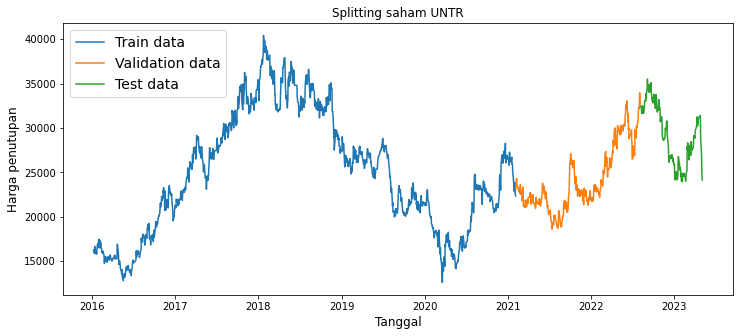

In [47]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham UNTR")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [305]:
untr_saham.drop("average_black_scholes", axis = 1).dropna()

Close  Close+1  Close+2  Close+3
Date                                          
2016-01-07  16225.0  16725.0  16350.0  16100.0
2016-01-08  16250.0  16225.0  16725.0  16350.0
2016-01-11  15875.0  16250.0  16225.0  16725.0
2016-01-12  16650.0  15875.0  16250.0  16225.0
2016-01-13  16650.0  16650.0  15875.0  16250.0
...             ...      ...      ...      ...
2023-04-28  28900.0  31075.0  31400.0  31075.0
2023-05-02  26900.0  28900.0  31075.0  31400.0
2023-05-03  25025.0  26900.0  28900.0  31075.0
2023-05-04  24500.0  25025.0  26900.0  28900.0
2023-05-05  24150.0  24500.0  25025.0  26900.0

[1828 rows x 4 columns]

In [44]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_untr = untr_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_untr = untr_saham.dropna()["Close"].astype(np.float32)
X_untr.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07           15218.923828  16725.0  16350.0  16100.0
2016-01-08           15329.961914  16225.0  16725.0  16350.0
2016-01-11           14737.887695  16250.0  16225.0  16725.0
2016-01-12           14727.974609  15875.0  16250.0  16225.0
2016-01-13           14185.508789  16650.0  15875.0  16250.0

In [45]:
X_untr

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07           15218.923828  16725.0  16350.0  16100.0
2016-01-08           15329.961914  16225.0  16725.0  16350.0
2016-01-11           14737.887695  16250.0  16225.0  16725.0
2016-01-12           14727.974609  15875.0  16250.0  16225.0
2016-01-13           14185.508789  16650.0  15875.0  16250.0
...                           ...      ...      ...      ...
2023-04-28           26722.500000  31075.0  31400.0  31075.0
2023-05-02           28137.564453  28900.0  31075.0  31400.0
2023-05-03           28873.671875  26900.0  28900.0  31075.0
2023-05-04           29024.382812  25025.0  26900.0  28900.0
2023-05-05           29004.550781  24500.0  25025.0  26900.0

[1828 rows x 4 columns]

In [46]:
y_untr

Date
2016-01-07    16225.0
2016-01-08    16250.0
2016-01-11    15875.0
2016-01-12    16650.0
2016-01-13    16650.0
               ...   
2023-04-28    28900.0
2023-05-02    26900.0
2023-05-03    25025.0
2023-05-04    24500.0
2023-05-05    24150.0
Name: Close, Length: 1828, dtype: float32

In [47]:
# make train, validation, test
train_size = int(len(X_untr) * 0.7)
validation_size = int(len(X_untr) * 0.2)

X_train_untr, y_train_untr = X_untr[:train_size], y_untr[:train_size]
X_val_untr, y_val_untr = X_untr[train_size : train_size+validation_size], y_untr[train_size : train_size+validation_size]
X_test_untr, y_test_untr = X_untr[train_size+validation_size:], y_untr[train_size+validation_size:]

In [48]:
len(X_train_untr), len(X_val_untr), len(X_test_untr)

(1279, 365, 184)

**Hasil prediksi saham dengan Black-Scholes**

In [49]:
y_pred_untr_black_scholes = X_test_untr.copy()
y_pred_untr_black_scholes = X_test_untr.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_untr_black_scholes

average_black_scholes
Date                             
2022-08-08           26647.339844
2022-08-09           26411.027344
2022-08-10           26102.320312
2022-08-11           27392.527344
2022-08-12           28850.404297
...                           ...
2023-04-28           26722.500000
2023-05-02           28137.564453
2023-05-03           28873.671875
2023-05-04           29024.382812
2023-05-05           29004.550781

[184 rows x 1 columns]

In [50]:
timestep_test_untr = X_test_untr.index.to_numpy()
timestep_test_untr

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

untr_black_scholes = mean_absolute_error(y_pred_untr_black_scholes, y_test_untr)
untr_black_scholes

2177.0015

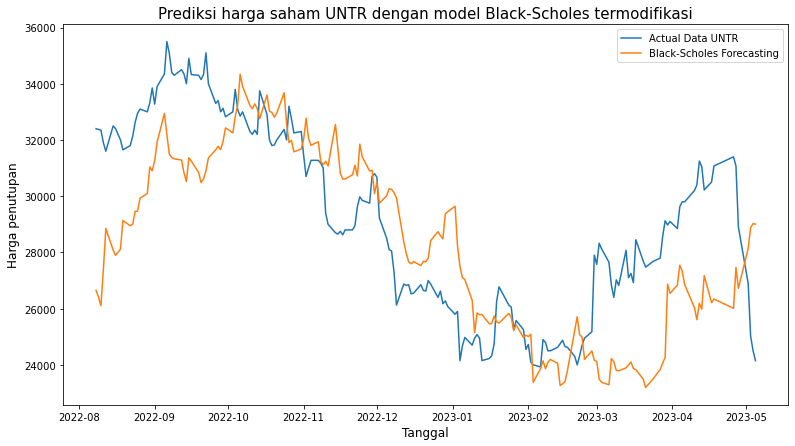

In [249]:
plt.figure(figsize=(13,7))
plt.plot(y_test_untr, label="Actual Data UNTR")
plt.plot(y_pred_untr_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham UNTR dengan model Black-Scholes termodifikasi", fontsize=15)
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [53]:
import tensorflow as tf

In [33]:
# Ini adalah model terbaik untuk ann saham untr dengan variable black-scholes dan historical data

tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_untr = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_untr.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_untr_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_untr = model_ann_untr.fit(x=X_train_untr,
                        y=y_train_untr,
                        validation_data=(X_val_untr, y_val_untr),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 3s 34ms/step - loss: 6727.5400 - mae: 6727.5400 - val_loss: 811.6826 - val_mae: 811.6826
Epoch 2/100
40/40 [==============================] - 1s 18ms/step - loss: 865.6378 - mae: 865.6378 - val_loss: 711.8738 - val_mae: 711.8738
Epoch 3/100
40/40 [==============================] - 1s 18ms/step - loss: 680.4377 - mae: 680.4377 - val_loss: 658.1418 - val_mae: 658.1418
Epoch 4/100
40/40 [==============================] - 1s 18ms/step - loss: 622.7428 - mae: 622.7428 - val_loss: 601.3254 - val_mae: 601.3254
Epoch 5/100
40/40 [==============================] - 1s 17ms/step - loss: 579.9803 - mae: 579.9803 - val_loss: 533.7857 - val_mae: 533.7857
Epoch 6/100
40/40 [==============================] - 1s 15ms/step - loss: 547.2977 - mae: 547.2977 - val_loss: 524.7255 - val_mae: 524.7255
Epoch 7/100
40/40 [==============================] - 1s 24ms/step - loss: 542.4763 - mae: 542.4763 - val_loss: 507.3405 - val_mae: 507.3405
Epoch 8/100
40/40 

40/40 [==============================] - 1s 18ms/step - loss: 505.4326 - mae: 505.4326 - val_loss: 449.8943 - val_mae: 449.8943
Epoch 31/100
40/40 [==============================] - 0s 2ms/step - loss: 518.3352 - mae: 518.3352 - val_loss: 556.8027 - val_mae: 556.8027
Epoch 32/100
40/40 [==============================] - 0s 2ms/step - loss: 505.5691 - mae: 505.5691 - val_loss: 470.1330 - val_mae: 470.1330
Epoch 33/100
40/40 [==============================] - 1s 22ms/step - loss: 481.5565 - mae: 481.5565 - val_loss: 449.5308 - val_mae: 449.5308
Epoch 34/100
40/40 [==============================] - 1s 22ms/step - loss: 482.5366 - mae: 482.5366 - val_loss: 447.3380 - val_mae: 447.3380
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 476.8533 - mae: 476.8533 - val_loss: 472.4047 - val_mae: 472.4047
Epoch 36/100
40/40 [==============================] - 1s 19ms/step - loss: 475.4662 - mae: 475.4662 - val_loss: 446.2653 - val_mae: 446.2653
Epoch 37/100
40/40 [=========

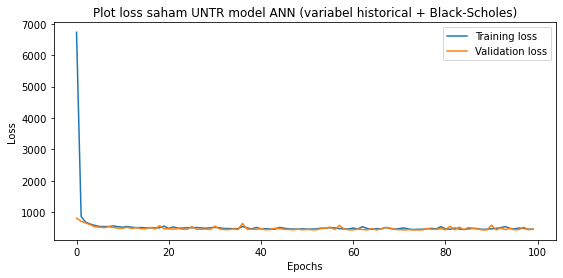

In [34]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_untr.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham UNTR model ANN (variabel historical + Black-Scholes)")
plt.show();

In [35]:
model_ann_untr.evaluate(X_test_untr, y_test_untr)

6/6 [==============================] - 0s 3ms/step - loss: 513.5226 - mae: 513.5226


[513.5225830078125, 513.5225830078125]

In [54]:
# load in saved best peformance
import tensorflow as tf
model_best_untr_ann = tf.keras.models.load_model("best_untr_ann")  
untr_model_1= model_best_untr_ann.evaluate(X_test_untr, y_test_untr)
untr_model_1

6/6 [==============================] - 0s 2ms/step - loss: 445.5816 - mae: 445.5816


[445.5816345214844, 445.5816345214844]

In [55]:
y_pred_ann_untr = model_best_untr_ann.predict(X_test_untr)

6/6 [==============================] - 0s 2ms/step


In [56]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mean_absolute_error(y_pred_ann_untr, y_test_untr), mean_absolute_percentage_error(y_pred_ann_untr, y_test_untr)*100

(445.5816, 1.5402469784021378)

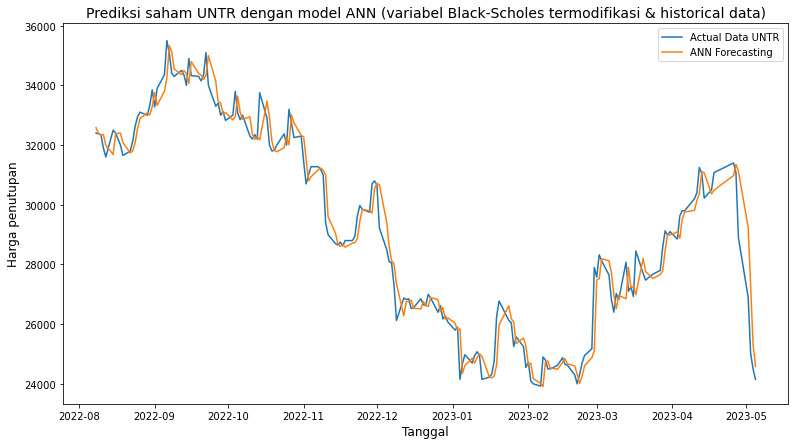

In [73]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_untr, y_test_untr, label="Actual Data UNTR")
plt.plot(timestep_test_untr, y_pred_ann_untr, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham UNTR dengan model ANN (variabel Black-Scholes termodifikasi & historical data)", fontsize=14)
plt.legend();

**Model ANN (Variabel historical)**

In [58]:
X_untr_historical = X_untr.copy()
X_untr_historical = X_untr_historical.drop(["average_black_scholes"], axis=1)

X_untr_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07  16725.0  16350.0  16100.0
2016-01-08  16225.0  16725.0  16350.0
2016-01-11  16250.0  16225.0  16725.0
2016-01-12  15875.0  16250.0  16225.0
2016-01-13  16650.0  15875.0  16250.0
...             ...      ...      ...
2023-04-28  31075.0  31400.0  31075.0
2023-05-02  28900.0  31075.0  31400.0
2023-05-03  26900.0  28900.0  31075.0
2023-05-04  25025.0  26900.0  28900.0
2023-05-05  24500.0  25025.0  26900.0

[1828 rows x 3 columns]

In [59]:
# make train, validation, test
train_size = int(len(X_untr) * 0.7)
validation_size = int(len(X_untr) * 0.2)

X_train_untr_historical, y_train_untr_historical = X_untr_historical[:train_size], y_untr[:train_size]
X_val_untr_historical, y_val_untr_historical = X_untr_historical[train_size : train_size+validation_size], y_untr[train_size : train_size+validation_size]
X_test_untr_historical, y_test_untr_historical = X_untr_historical[train_size+validation_size:], y_untr[train_size+validation_size:]

In [69]:
# Ini adalah model terbaik untuk ann saham untr dengan hanya menggunakan historical data

tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_untr_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_untr_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\untr_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_untr_historical = model_ann_untr_historical.fit(x=X_train_untr_historical,
                        y=y_train_untr_historical,
                        validation_data=(X_val_untr_historical, y_val_untr_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 19ms/step - loss: 7177.8047 - mae: 7177.8047 - val_loss: 578.1818 - val_mae: 578.1818
Epoch 2/100
40/40 [==============================] - 1s 15ms/step - loss: 608.3475 - mae: 608.3475 - val_loss: 514.1545 - val_mae: 514.1545
Epoch 3/100
40/40 [==============================] - 1s 16ms/step - loss: 525.8484 - mae: 525.8484 - val_loss: 506.3684 - val_mae: 506.3684
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 531.1661 - mae: 531.1661 - val_loss: 523.5048 - val_mae: 523.5048
Epoch 5/100
40/40 [==============================] - 1s 14ms/step - loss: 524.6911 - mae: 524.6911 - val_loss: 500.1793 - val_mae: 500.1793
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 519.4514 - mae: 519.4514 - val_loss: 502.0936 - val_mae: 502.0936
Epoch 7/100
40/40 [==============================] - 1s 18ms/step - loss: 515.4305 - mae: 515.4305 - val_loss: 494.5808 - val_mae: 494.5808
Epoch 8/100
40/40 [=

Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 467.7846 - mae: 467.7846 - val_loss: 458.3537 - val_mae: 458.3537
Epoch 34/100
40/40 [==============================] - 1s 20ms/step - loss: 480.9839 - mae: 480.9839 - val_loss: 444.5133 - val_mae: 444.5133
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 507.1096 - mae: 507.1096 - val_loss: 446.0874 - val_mae: 446.0874
Epoch 36/100
40/40 [==============================] - 0s 3ms/step - loss: 483.6980 - mae: 483.6980 - val_loss: 478.7522 - val_mae: 478.7522
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 530.0156 - mae: 530.0156 - val_loss: 485.0627 - val_mae: 485.0627
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 466.1573 - mae: 466.1573 - val_loss: 448.3141 - val_mae: 448.3141
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 462.7877 - mae: 462.7877 - val_loss: 449.4185 - val_mae: 449.4185
Epoch 40/100
40/40 

40/40 [==============================] - 1s 15ms/step - loss: 501.3708 - mae: 501.3708 - val_loss: 438.5216 - val_mae: 438.5216
Epoch 81/100
40/40 [==============================] - 0s 3ms/step - loss: 459.2011 - mae: 459.2011 - val_loss: 453.0008 - val_mae: 453.0008
Epoch 82/100
40/40 [==============================] - 0s 3ms/step - loss: 457.2193 - mae: 457.2193 - val_loss: 561.0343 - val_mae: 561.0343
Epoch 83/100
40/40 [==============================] - 0s 2ms/step - loss: 491.2278 - mae: 491.2278 - val_loss: 442.3630 - val_mae: 442.3630
Epoch 84/100
40/40 [==============================] - 0s 3ms/step - loss: 448.0556 - mae: 448.0556 - val_loss: 461.3112 - val_mae: 461.3112
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 467.0463 - mae: 467.0463 - val_loss: 458.7752 - val_mae: 458.7752
Epoch 86/100
40/40 [==============================] - 0s 3ms/step - loss: 521.8978 - mae: 521.8978 - val_loss: 493.5319 - val_mae: 493.5319
Epoch 87/100
40/40 [============

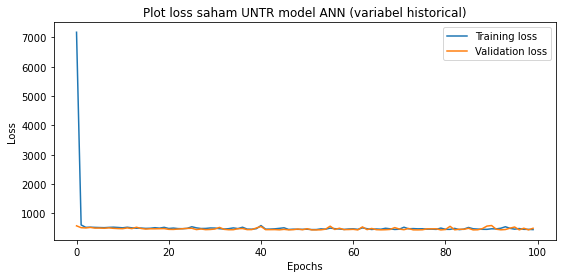

In [70]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_untr_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham UNTR model ANN (variabel historical)");

In [60]:
# load in saved best peformance
import tensorflow as tf
model_best_untr_ann_historical = tf.keras.models.load_model("untr_ann_histo")  
untr_model_2 = model_best_untr_ann_historical.evaluate(X_test_untr_historical, y_test_untr_historical)
untr_model_2

6/6 [==============================] - 0s 2ms/step - loss: 444.0434 - mae: 444.0434


[444.04339599609375, 444.04339599609375]

In [61]:
y_pred_ann_untr_historical = model_best_untr_ann_historical.predict(X_test_untr_historical)

6/6 [==============================] - 0s 2ms/step


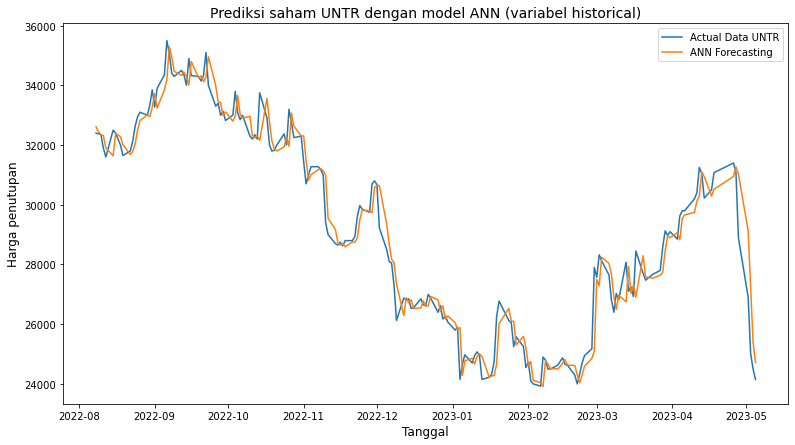

In [72]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_untr, y_test_untr_historical, label="Actual Data UNTR")
plt.plot(timestep_test_untr, y_pred_ann_untr_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham UNTR dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

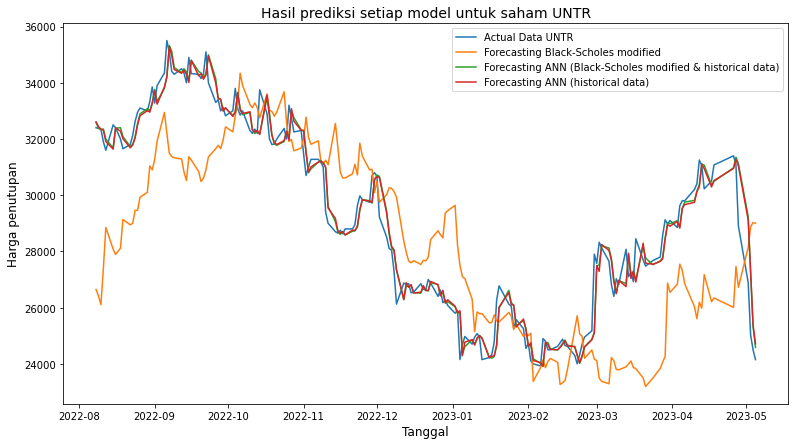

In [71]:
plt.figure(figsize=(13,7))
plt.plot(y_test_untr, label="Actual Data UNTR")
plt.plot(y_pred_untr_black_scholes, label="Forecasting Black-Scholes modified")
plt.plot(timestep_test_untr, y_pred_ann_untr, label="Forecasting ANN (Black-Scholes modified & historical data)")
plt.plot(timestep_test_untr, y_pred_ann_untr_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham UNTR", fontsize=14)
plt.legend();

### HEXA

In [48]:
# membuat variabel horizon dan window_size
HORIZON = 1
WINDOW_SIZE = 3

In [49]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    hexa_saham[f"Close+{i+1}"] = hexa_saham["Close"].shift(periods=i+1)
hexa_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                
2016-01-04  1235.0            1325.393958      NaN      NaN      NaN
2016-01-05  1250.0            1315.075866   1235.0      NaN      NaN
2016-01-06  1230.0            1314.539538   1250.0   1235.0      NaN
2016-01-07  1255.0            1270.040526   1230.0   1250.0   1235.0
2016-01-08  1210.0            1293.936539   1255.0   1230.0   1250.0
2016-01-11  1130.0            1273.885795   1210.0   1255.0   1230.0
2016-01-12  1160.0            1273.366419   1130.0   1210.0   1255.0
2016-01-13  1140.0            1272.847293   1160.0   1130.0   1210.0
2016-01-14  1135.0            1257.703953   1140.0   1160.0   1130.0
2016-01-15  1135.0            1257.191288   1135.0   1140.0   1160.0

In [50]:
hexa_saham

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                
2016-01-04  1235.0            1325.393958      NaN      NaN      NaN
2016-01-05  1250.0            1315.075866   1235.0      NaN      NaN
2016-01-06  1230.0            1314.539538   1250.0   1235.0      NaN
2016-01-07  1255.0            1270.040526   1230.0   1250.0   1235.0
2016-01-08  1210.0            1293.936539   1255.0   1230.0   1250.0
...            ...                    ...      ...      ...      ...
2023-04-28  5700.0            4937.818849   5725.0   5525.0   5225.0
2023-05-02  5650.0            5091.701372   5700.0   5725.0   5525.0
2023-05-03  5550.0            5089.605577   5650.0   5700.0   5725.0
2023-05-04  5525.0            5087.510802   5550.0   5650.0   5700.0
2023-05-05  5550.0            5110.103537   5525.0   5550.0   5650.0

[1831 rows x 5 columns]

In [51]:
timesteps = hexa_saham.dropna().index.to_numpy()
close = hexa_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([1255., 1210., 1130., 1160., 1140., 1135., 1135., 1140., 1135.,
        1110.]))

In [52]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

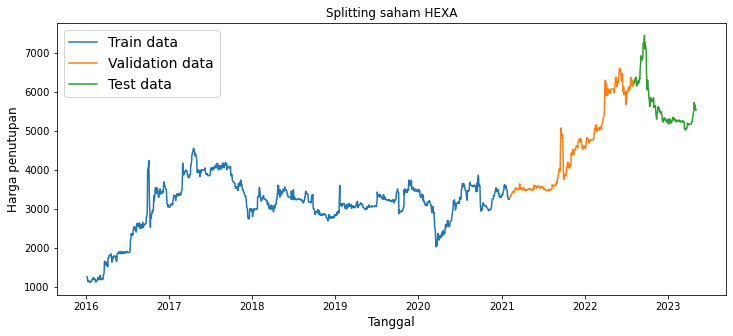

In [53]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham HEXA")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [78]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_hexa = hexa_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_hexa = hexa_saham.dropna()["Close"].astype(np.float32)
X_hexa.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            1270.040527   1230.0   1250.0   1235.0
2016-01-08            1293.936523   1255.0   1230.0   1250.0
2016-01-11            1273.885742   1210.0   1255.0   1230.0
2016-01-12            1273.366455   1130.0   1210.0   1255.0
2016-01-13            1272.847290   1160.0   1130.0   1210.0

In [79]:
X_hexa

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            1270.040527   1230.0   1250.0   1235.0
2016-01-08            1293.936523   1255.0   1230.0   1250.0
2016-01-11            1273.885742   1210.0   1255.0   1230.0
2016-01-12            1273.366455   1130.0   1210.0   1255.0
2016-01-13            1272.847290   1160.0   1130.0   1210.0
...                           ...      ...      ...      ...
2023-04-28            4937.818848   5725.0   5525.0   5225.0
2023-05-02            5091.701172   5700.0   5725.0   5525.0
2023-05-03            5089.605469   5650.0   5700.0   5725.0
2023-05-04            5087.510742   5550.0   5650.0   5700.0
2023-05-05            5110.103516   5525.0   5550.0   5650.0

[1828 rows x 4 columns]

In [80]:
y_hexa

Date
2016-01-07    1255.0
2016-01-08    1210.0
2016-01-11    1130.0
2016-01-12    1160.0
2016-01-13    1140.0
               ...  
2023-04-28    5700.0
2023-05-02    5650.0
2023-05-03    5550.0
2023-05-04    5525.0
2023-05-05    5550.0
Name: Close, Length: 1828, dtype: float32

In [81]:
# make train, validation, test
train_size = int(len(X_hexa) * 0.7)
validation_size = int(len(X_hexa) * 0.2)

X_train_hexa, y_train_hexa = X_hexa[:train_size], y_hexa[:train_size]
X_val_hexa, y_val_hexa = X_hexa[train_size : train_size+validation_size], y_hexa[train_size : train_size+validation_size]
X_test_hexa, y_test_hexa = X_hexa[train_size+validation_size:], y_hexa[train_size+validation_size:]

In [82]:
len(X_train_hexa), len(X_val_hexa), len(X_test_hexa)

(1279, 365, 184)

**Hasil prediksi saham dengan Black-Scholes**

In [83]:
y_pred_hexa_black_scholes = X_test_hexa.copy()
y_pred_hexa_black_scholes = X_test_hexa.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_hexa_black_scholes

average_black_scholes
Date                             
2022-08-08            5888.062988
2022-08-09            5885.648926
2022-08-10            5981.290039
2022-08-11            5978.837891
2022-08-12            6000.880371
...                           ...
2023-04-28            4937.818848
2023-05-02            5091.701172
2023-05-03            5089.605469
2023-05-04            5087.510742
2023-05-05            5110.103516

[184 rows x 1 columns]

In [84]:
timestep_test_hexa = X_test_hexa.index.to_numpy()
timestep_test_hexa

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

hexa_black_scholes = mean_absolute_error(y_pred_hexa_black_scholes, y_test_hexa)
hexa_black_scholes

329.594

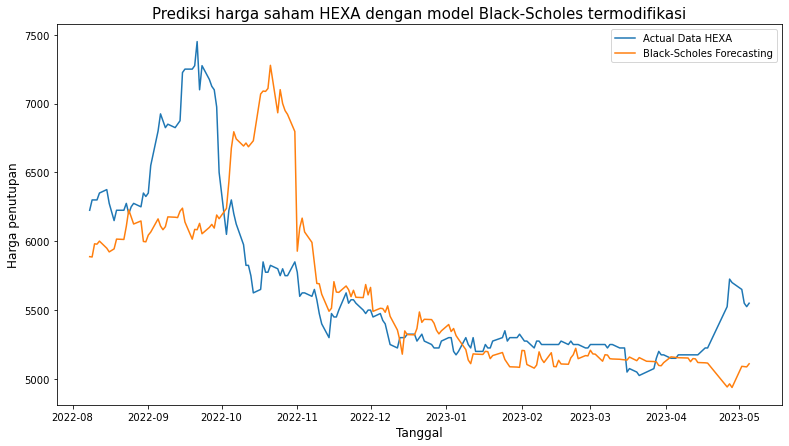

In [86]:
plt.figure(figsize=(13,7))
plt.plot(y_test_hexa, label="Actual Data HEXA")
plt.plot(y_pred_hexa_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham HEXA dengan model Black-Scholes termodifikasi", fontsize=15)
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [87]:
# Ini adalah model terbaik untuk ann saham untr dengan variable black-scholes dan historical data

tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_hexa = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_hexa.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_hexa_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_hexa = model_ann_hexa.fit(x=X_train_hexa,
                        y=y_train_hexa,
                        validation_data=(X_val_hexa, y_val_hexa),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 23ms/step - loss: 830.1891 - mae: 830.1891 - val_loss: 109.7169 - val_mae: 109.7169
Epoch 2/100
40/40 [==============================] - 1s 14ms/step - loss: 100.3011 - mae: 100.3011 - val_loss: 96.6189 - val_mae: 96.6189
Epoch 3/100
40/40 [==============================] - 1s 15ms/step - loss: 75.7383 - mae: 75.7383 - val_loss: 76.7622 - val_mae: 76.7622
Epoch 4/100
40/40 [==============================] - 1s 14ms/step - loss: 65.0215 - mae: 65.0215 - val_loss: 72.1395 - val_mae: 72.1395
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 60.1466 - mae: 60.1466 - val_loss: 75.7943 - val_mae: 75.7943
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 63.2868 - mae: 63.2868 - val_loss: 76.1014 - val_mae: 76.1014
Epoch 7/100
40/40 [==============================] - 1s 14ms/step - loss: 61.8999 - mae: 61.8999 - val_loss: 63.9127 - val_mae: 63.9127
Epoch 8/100
40/40 [=========================

40/40 [==============================] - 1s 15ms/step - loss: 48.4082 - mae: 48.4082 - val_loss: 49.6677 - val_mae: 49.6677
Epoch 30/100
40/40 [==============================] - 0s 3ms/step - loss: 50.8602 - mae: 50.8602 - val_loss: 60.6737 - val_mae: 60.6737
Epoch 31/100
40/40 [==============================] - 0s 3ms/step - loss: 52.8311 - mae: 52.8311 - val_loss: 51.7034 - val_mae: 51.7034
Epoch 32/100
40/40 [==============================] - 1s 14ms/step - loss: 52.0560 - mae: 52.0560 - val_loss: 49.6668 - val_mae: 49.6668
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 45.9795 - mae: 45.9795 - val_loss: 53.5858 - val_mae: 53.5858
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 52.2355 - mae: 52.2355 - val_loss: 57.9146 - val_mae: 57.9146
Epoch 35/100
40/40 [==============================] - 1s 14ms/step - loss: 49.2276 - mae: 49.2276 - val_loss: 48.9950 - val_mae: 48.9950
Epoch 36/100
40/40 [==============================] - 1s 1

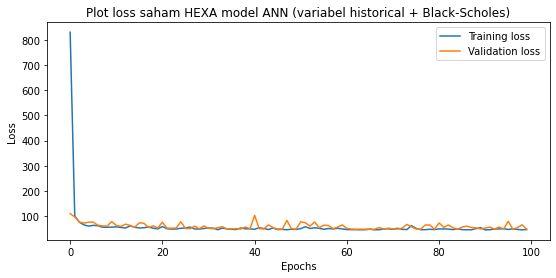

In [88]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_hexa.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham HEXA model ANN (variabel historical + Black-Scholes)")
plt.show();

In [89]:
model_ann_hexa.evaluate(X_test_hexa, y_test_hexa)

6/6 [==============================] - 0s 1ms/step - loss: 56.8615 - mae: 56.8615


[56.86150360107422, 56.86150360107422]

In [87]:
# load in saved best peformance
import tensorflow as tf
model_best_hexa_ann = tf.keras.models.load_model("best_hexa_ann")  
hexa_model_1= model_best_hexa_ann.evaluate(X_test_hexa, y_test_hexa)
hexa_model_1

6/6 [==============================] - 0s 2ms/step - loss: 55.7489 - mae: 55.7489


[55.74885177612305, 55.74885177612305]

In [88]:
y_pred_ann_hexa = model_best_hexa_ann.predict(X_test_hexa)

6/6 [==============================] - 0s 2ms/step


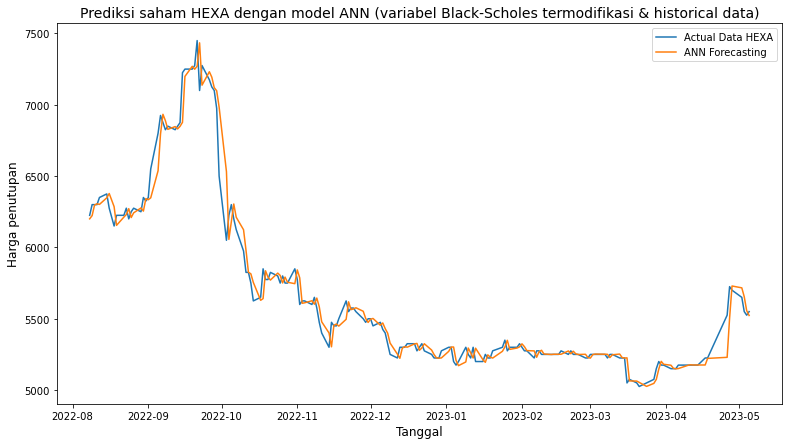

In [89]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_hexa, y_test_hexa, label="Actual Data HEXA")
plt.plot(timestep_test_hexa, y_pred_ann_hexa, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham HEXA dengan model ANN (variabel Black-Scholes termodifikasi & historical data)", fontsize=14)
plt.legend();

**Model ANN (Variabel historical)**

In [90]:
X_hexa_historical = X_hexa.copy()
X_hexa_historical = X_hexa_historical.drop(["average_black_scholes"], axis=1)

X_hexa_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07   1230.0   1250.0   1235.0
2016-01-08   1255.0   1230.0   1250.0
2016-01-11   1210.0   1255.0   1230.0
2016-01-12   1130.0   1210.0   1255.0
2016-01-13   1160.0   1130.0   1210.0
...             ...      ...      ...
2023-04-28   5725.0   5525.0   5225.0
2023-05-02   5700.0   5725.0   5525.0
2023-05-03   5650.0   5700.0   5725.0
2023-05-04   5550.0   5650.0   5700.0
2023-05-05   5525.0   5550.0   5650.0

[1828 rows x 3 columns]

In [91]:
# make train, validation, test
train_size = int(len(X_hexa) * 0.7)
validation_size = int(len(X_hexa) * 0.2)

X_train_hexa_historical, y_train_hexa_historical = X_hexa_historical[:train_size], y_hexa[:train_size]
X_val_hexa_historical, y_val_hexa_historical = X_hexa_historical[train_size : train_size+validation_size], y_hexa[train_size : train_size+validation_size]
X_test_hexa_historical, y_test_hexa_historical = X_hexa_historical[train_size+validation_size:], y_hexa[train_size+validation_size:]

In [95]:
# Ini adalah model terbaik untuk ann saham untr dengan hanya menggunakan historical data

tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_hexa_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_hexa_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\hexa_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_hexa_historical = model_ann_hexa_historical.fit(x=X_train_hexa_historical,
                        y=y_train_hexa_historical,
                        validation_data=(X_val_hexa_historical, y_val_hexa_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 26ms/step - loss: 889.8337 - mae: 889.8337 - val_loss: 65.7588 - val_mae: 65.7588
Epoch 2/100
40/40 [==============================] - 1s 17ms/step - loss: 67.5737 - mae: 67.5737 - val_loss: 64.8070 - val_mae: 64.8070
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 57.9473 - mae: 57.9473 - val_loss: 66.6337 - val_mae: 66.6337
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 57.1516 - mae: 57.1516 - val_loss: 76.0338 - val_mae: 76.0338
Epoch 5/100
40/40 [==============================] - 1s 20ms/step - loss: 55.4382 - mae: 55.4382 - val_loss: 59.7170 - val_mae: 59.7170
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 58.3811 - mae: 58.3811 - val_loss: 74.3009 - val_mae: 74.3009
Epoch 7/100
40/40 [==============================] - 1s 24ms/step - loss: 57.2626 - mae: 57.2626 - val_loss: 59.1553 - val_mae: 59.1553
Epoch 8/100
40/40 [==============================

40/40 [==============================] - 1s 16ms/step - loss: 47.2424 - mae: 47.2424 - val_loss: 47.2919 - val_mae: 47.2919
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 47.1879 - mae: 47.1879 - val_loss: 56.2027 - val_mae: 56.2027
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 48.1037 - mae: 48.1037 - val_loss: 54.4792 - val_mae: 54.4792
Epoch 39/100
40/40 [==============================] - 0s 4ms/step - loss: 48.1988 - mae: 48.1988 - val_loss: 48.5490 - val_mae: 48.5490
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 47.6826 - mae: 47.6826 - val_loss: 47.4051 - val_mae: 47.4051
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 46.2754 - mae: 46.2754 - val_loss: 94.7233 - val_mae: 94.7233
Epoch 42/100
40/40 [==============================] - 0s 2ms/step - loss: 50.3729 - mae: 50.3729 - val_loss: 50.4601 - val_mae: 50.4601
Epoch 43/100
40/40 [==============================] - 0s 4ms

Epoch 88/100
40/40 [==============================] - 0s 4ms/step - loss: 44.5814 - mae: 44.5814 - val_loss: 49.7475 - val_mae: 49.7475
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 46.2169 - mae: 46.2169 - val_loss: 48.7727 - val_mae: 48.7727
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 52.6608 - mae: 52.6608 - val_loss: 48.9206 - val_mae: 48.9206
Epoch 91/100
40/40 [==============================] - 0s 4ms/step - loss: 44.4154 - mae: 44.4154 - val_loss: 49.1400 - val_mae: 49.1400
Epoch 92/100
40/40 [==============================] - 0s 4ms/step - loss: 50.3121 - mae: 50.3121 - val_loss: 63.9620 - val_mae: 63.9620
Epoch 93/100
40/40 [==============================] - 0s 3ms/step - loss: 46.3934 - mae: 46.3934 - val_loss: 62.3209 - val_mae: 62.3209
Epoch 94/100
40/40 [==============================] - 0s 3ms/step - loss: 47.6192 - mae: 47.6192 - val_loss: 66.0179 - val_mae: 66.0179
Epoch 95/100
40/40 [============================

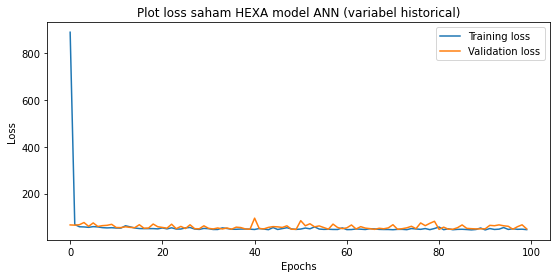

In [96]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_hexa_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham HEXA model ANN (variabel historical)");

In [92]:
# load in saved best peformance
import tensorflow as tf
model_best_hexa_ann_historical = tf.keras.models.load_model("hexa_ann_histo")  
hexa_model_2 = model_best_hexa_ann_historical.evaluate(X_test_hexa_historical, y_test_hexa_historical)
hexa_model_2

6/6 [==============================] - 0s 2ms/step - loss: 54.7253 - mae: 54.7253


[54.725257873535156, 54.725257873535156]

In [93]:
y_pred_ann_hexa_historical = model_best_hexa_ann_historical.predict(X_test_hexa_historical)

6/6 [==============================] - 0s 906us/step


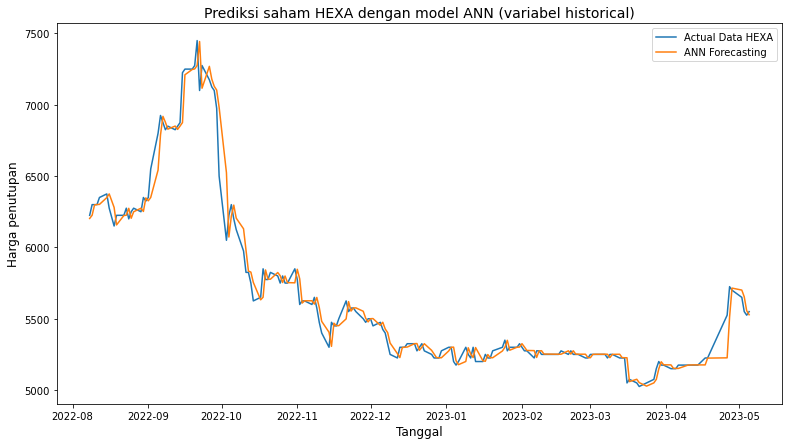

In [94]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_hexa, y_test_hexa_historical, label="Actual Data HEXA")
plt.plot(timestep_test_hexa, y_pred_ann_hexa_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham HEXA dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

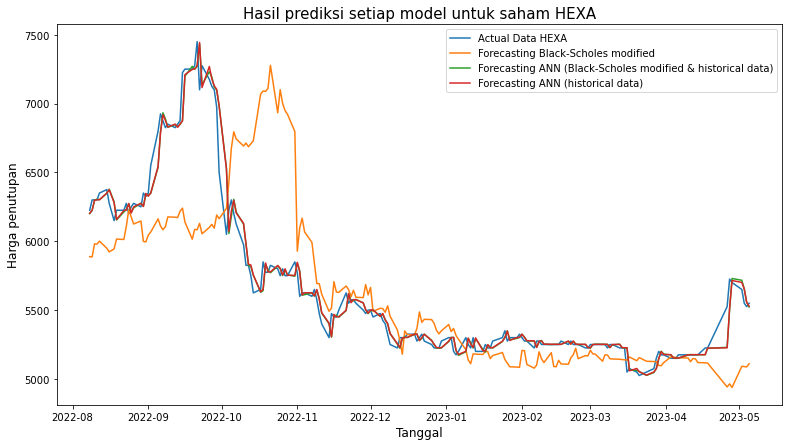

In [95]:
plt.figure(figsize=(13,7))
plt.plot(y_test_hexa, label="Actual Data HEXA")
plt.plot(y_pred_hexa_black_scholes, label="Forecasting Black-Scholes modified")
plt.plot(timestep_test_hexa, y_pred_ann_hexa, label="Forecasting ANN (Black-Scholes modified & historical data)")
plt.plot(timestep_test_hexa, y_pred_ann_hexa_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham HEXA", fontsize=15)
plt.legend();

### KOBX

In [96]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    kobx_saham[f"Close+{i+1}"] = kobx_saham["Close"].shift(periods=i+1)
kobx_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                               
2016-01-04  143.0             139.034130      NaN      NaN      NaN
2016-01-05  143.0             138.014271    143.0      NaN      NaN
2016-01-06  130.0             137.987519    143.0    143.0      NaN
2016-01-07  137.0             125.057966    130.0    143.0    143.0
2016-01-08  129.0             124.041395    137.0    130.0    143.0
2016-01-11  117.0             121.040935    129.0    137.0    130.0
2016-01-12  106.0             121.017474    117.0    129.0    137.0
2016-01-13  117.0             133.886823    106.0    117.0    129.0
2016-01-14  107.0             133.860872    117.0    106.0    117.0
2016-01-15  119.0             133.834927    107.0    117.0    106.0

In [97]:
kobx_saham

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                               
2016-01-04  143.0             139.034130      NaN      NaN      NaN
2016-01-05  143.0             138.014271    143.0      NaN      NaN
2016-01-06  130.0             137.987519    143.0    143.0      NaN
2016-01-07  137.0             125.057966    130.0    143.0    143.0
2016-01-08  129.0             124.041395    137.0    130.0    143.0
...           ...                    ...      ...      ...      ...
2023-04-28  248.0             292.117111    236.0    224.0    208.0
2023-05-02  242.0             266.611700    248.0    236.0    224.0
2023-05-03  238.0             248.788823    242.0    248.0    236.0
2023-05-04  236.0             236.895303    238.0    242.0    248.0
2023-05-05  228.0             252.638805    236.0    238.0    242.0

[1828 rows x 5 columns]

In [98]:
timesteps = kobx_saham.dropna().index.to_numpy()
close = kobx_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([137., 129., 117., 106., 117., 107., 119., 117., 126., 127.]))

In [99]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

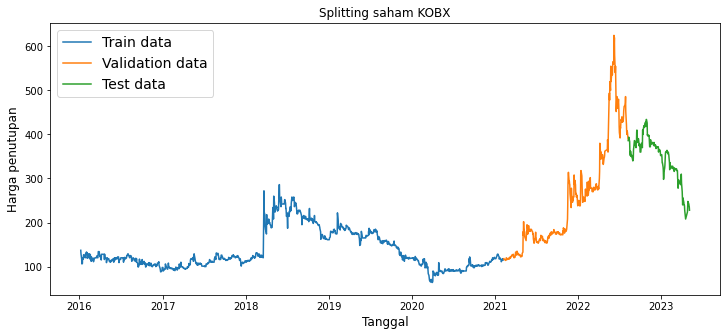

In [101]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham KOBX")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [102]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_kobx = kobx_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_kobx = kobx_saham.dropna()["Close"].astype(np.float32)
X_kobx.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07             125.057968    130.0    143.0    143.0
2016-01-08             124.041397    137.0    130.0    143.0
2016-01-11             121.040932    129.0    137.0    130.0
2016-01-12             121.017471    117.0    129.0    137.0
2016-01-13             133.886826    106.0    117.0    129.0

In [103]:
# make train, validation, test
train_size = int(len(X_kobx) * 0.7)
validation_size = int(len(X_kobx) * 0.2)

X_train_kobx, y_train_kobx = X_kobx[:train_size], y_kobx[:train_size]
X_val_kobx, y_val_kobx = X_kobx[train_size : train_size+validation_size], y_kobx[train_size : train_size+validation_size]
X_test_kobx, y_test_kobx = X_kobx[train_size+validation_size:], y_kobx[train_size+validation_size:]

In [104]:
len(X_train_kobx), len(X_val_kobx), len(X_test_kobx)

(1277, 365, 183)

**Hasil prediksi saham dengan Black-Scholes**

In [105]:
y_pred_kobx_black_scholes = X_test_kobx.copy()
y_pred_kobx_black_scholes = X_test_kobx.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_kobx_black_scholes

average_black_scholes
Date                             
2022-08-09             428.679413
2022-08-10             436.532593
2022-08-11             424.544159
2022-08-12             434.378510
2022-08-15             424.378235
...                           ...
2023-04-28             292.117096
2023-05-02             266.611694
2023-05-03             248.788818
2023-05-04             236.895309
2023-05-05             252.638809

[183 rows x 1 columns]

In [106]:
timestep_test_kobx = X_test_kobx.index.to_numpy()
timestep_test_kobx

array(['2022-08-09T00:00:00.000000000', '2022-08-10T00:00:00.000000000',
       '2022-08-11T00:00:00.000000000', '2022-08-12T00:00:00.000000000',
       '2022-08-15T00:00:00.000000000', '2022-08-16T00:00:00.000000000',
       '2022-08-18T00:00:00.000000000', '2022-08-19T00:00:00.000000000',
       '2022-08-22T00:00:00.000000000', '2022-08-23T00:00:00.000000000',
       '2022-08-24T00:00:00.000000000', '2022-08-25T00:00:00.000000000',
       '2022-08-26T00:00:00.000000000', '2022-08-29T00:00:00.000000000',
       '2022-08-30T00:00:00.000000000', '2022-08-31T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-09-02T00:00:00.000000000',
       '2022-09-05T00:00:00.000000000', '2022-09-06T00:00:00.000000000',
       '2022-09-07T00:00:00.000000000', '2022-09-08T00:00:00.000000000',
       '2022-09-09T00:00:00.000000000', '2022-09-12T00:00:00.000000000',
       '2022-09-13T00:00:00.000000000', '2022-09-14T00:00:00.000000000',
       '2022-09-15T00:00:00.000000000', '2022-09-16

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

kobx_black_scholes = mean_absolute_error(y_pred_kobx_black_scholes, y_test_kobx)
kobx_black_scholes

32.350574

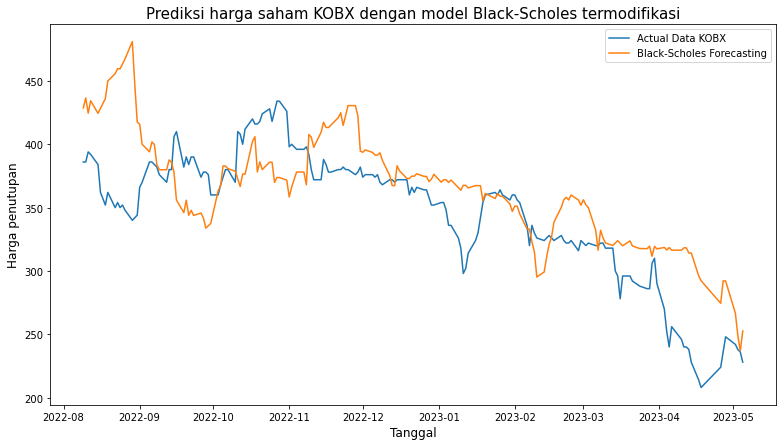

In [108]:
plt.figure(figsize=(13,7))
plt.plot(y_test_kobx, label="Actual Data KOBX")
plt.plot(y_pred_kobx_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham KOBX dengan model Black-Scholes termodifikasi", fontsize=15)
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [110]:
# Ini adalah model terbaik untuk ann saham untr dengan variable black-scholes dan historical data

tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_kobx = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_kobx.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_kobx_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_kobx = model_ann_kobx.fit(x=X_train_kobx,
                        y=y_train_kobx,
                        validation_data=(X_val_kobx, y_val_kobx),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 25ms/step - loss: 36.5750 - mae: 36.5750 - val_loss: 16.7254 - val_mae: 16.7254
Epoch 2/100
40/40 [==============================] - 1s 18ms/step - loss: 5.5189 - mae: 5.5189 - val_loss: 13.5357 - val_mae: 13.5357
Epoch 3/100
40/40 [==============================] - 1s 22ms/step - loss: 3.9510 - mae: 3.9510 - val_loss: 9.5772 - val_mae: 9.5772
Epoch 4/100
40/40 [==============================] - 1s 18ms/step - loss: 3.4975 - mae: 3.4975 - val_loss: 9.2200 - val_mae: 9.2200
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 3.5412 - mae: 3.5412 - val_loss: 9.4159 - val_mae: 9.4159
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 3.8171 - mae: 3.8171 - val_loss: 9.3087 - val_mae: 9.3087
Epoch 7/100
40/40 [==============================] - 1s 18ms/step - loss: 3.4266 - mae: 3.4266 - val_loss: 8.9158 - val_mae: 8.9158
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss:

Epoch 93/100
40/40 [==============================] - 0s 4ms/step - loss: 3.1726 - mae: 3.1726 - val_loss: 8.4823 - val_mae: 8.4823
Epoch 94/100
40/40 [==============================] - 0s 4ms/step - loss: 3.2125 - mae: 3.2125 - val_loss: 8.4269 - val_mae: 8.4269
Epoch 95/100
40/40 [==============================] - 0s 4ms/step - loss: 3.3698 - mae: 3.3698 - val_loss: 10.5638 - val_mae: 10.5638
Epoch 96/100
40/40 [==============================] - 0s 3ms/step - loss: 3.2694 - mae: 3.2694 - val_loss: 8.4215 - val_mae: 8.4215
Epoch 97/100
40/40 [==============================] - 0s 3ms/step - loss: 3.3234 - mae: 3.3234 - val_loss: 8.4245 - val_mae: 8.4245
Epoch 98/100
40/40 [==============================] - 0s 3ms/step - loss: 3.3271 - mae: 3.3271 - val_loss: 8.6581 - val_mae: 8.6581
Epoch 99/100
40/40 [==============================] - 0s 4ms/step - loss: 3.2458 - mae: 3.2458 - val_loss: 9.2629 - val_mae: 9.2629
Epoch 100/100
40/40 [==============================] - 0s 4ms/step - loss:

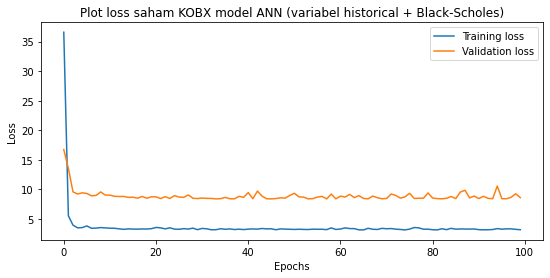

In [111]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_kobx.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham KOBX model ANN (variabel historical + Black-Scholes)")
plt.show();

In [112]:
model_ann_kobx.evaluate(X_test_kobx, y_test_kobx)

6/6 [==============================] - 0s 1ms/step - loss: 6.5182 - mae: 6.5182


[6.518218040466309, 6.518218517303467]

In [109]:
# load in saved best peformance
import tensorflow as tf
model_best_kobx_ann = tf.keras.models.load_model("best_kobx_ann")  
kobx_model_1= model_best_kobx_ann.evaluate(X_test_kobx, y_test_kobx)
kobx_model_1

6/6 [==============================] - 0s 2ms/step - loss: 6.6243 - mae: 6.6243


[6.624279022216797, 6.624279022216797]

In [110]:
y_pred_ann_kobx = model_best_kobx_ann.predict(X_test_kobx)

6/6 [==============================] - 0s 918us/step


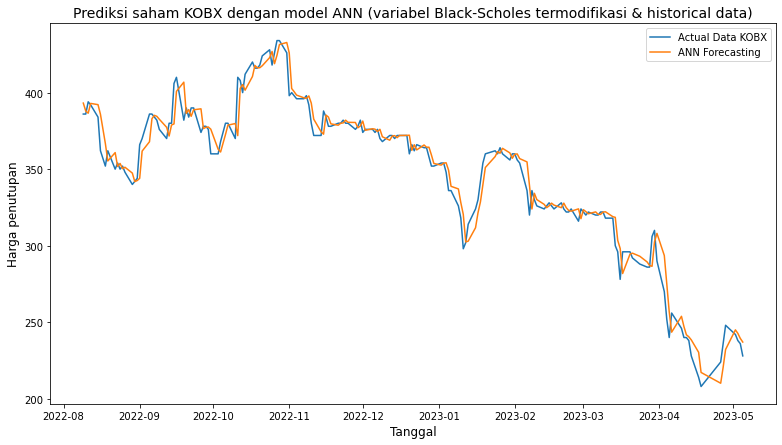

In [111]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_kobx, y_test_kobx, label="Actual Data KOBX")
plt.plot(timestep_test_kobx, y_pred_ann_kobx, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham KOBX dengan model ANN (variabel Black-Scholes termodifikasi & historical data)", fontsize=14)
plt.legend();

**Model ANN (Variabel historical)**

In [112]:
X_kobx_historical = X_kobx.copy()
X_kobx_historical = X_kobx_historical.drop(["average_black_scholes"], axis=1)

X_kobx_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07    130.0    143.0    143.0
2016-01-08    137.0    130.0    143.0
2016-01-11    129.0    137.0    130.0
2016-01-12    117.0    129.0    137.0
2016-01-13    106.0    117.0    129.0
...             ...      ...      ...
2023-04-28    236.0    224.0    208.0
2023-05-02    248.0    236.0    224.0
2023-05-03    242.0    248.0    236.0
2023-05-04    238.0    242.0    248.0
2023-05-05    236.0    238.0    242.0

[1825 rows x 3 columns]

In [113]:
# make train, validation, test
train_size = int(len(X_kobx) * 0.7)
validation_size = int(len(X_kobx) * 0.2)

X_train_kobx_historical, y_train_kobx_historical = X_kobx_historical[:train_size], y_kobx[:train_size]
X_val_kobx_historical, y_val_kobx_historical = X_kobx_historical[train_size : train_size+validation_size], y_kobx[train_size : train_size+validation_size]
X_test_kobx_historical, y_test_kobx_historical = X_kobx_historical[train_size+validation_size:], y_kobx[train_size+validation_size:]

In [118]:
# Ini adalah model terbaik untuk ann saham untr dengan hanya menggunakan historical data

tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_kobx_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_kobx_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\kobx_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_kobx_historical = model_ann_kobx_historical.fit(x=X_train_kobx_historical,
                        y=y_train_kobx_historical,
                        validation_data=(X_val_kobx_historical, y_val_kobx_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 2s 27ms/step - loss: 39.0593 - mae: 39.0593 - val_loss: 9.9479 - val_mae: 9.9479
Epoch 2/100
40/40 [==============================] - 0s 3ms/step - loss: 4.0143 - mae: 4.0143 - val_loss: 9.9522 - val_mae: 9.9522
Epoch 3/100
40/40 [==============================] - 1s 19ms/step - loss: 3.6463 - mae: 3.6463 - val_loss: 9.5630 - val_mae: 9.5630
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 3.7568 - mae: 3.7568 - val_loss: 10.5499 - val_mae: 10.5499
Epoch 5/100
40/40 [==============================] - 1s 17ms/step - loss: 3.5836 - mae: 3.5836 - val_loss: 9.4308 - val_mae: 9.4308
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 3.4808 - mae: 3.4808 - val_loss: 9.9341 - val_mae: 9.9341
Epoch 7/100
40/40 [==============================] - 1s 22ms/step - loss: 3.5526 - mae: 3.5526 - val_loss: 9.1528 - val_mae: 9.1528
Epoch 8/100
40/40 [==============================] - 1s 18ms/step - loss: 3

Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 3.3115 - mae: 3.3115 - val_loss: 8.6778 - val_mae: 8.6778
Epoch 34/100
40/40 [==============================] - 0s 5ms/step - loss: 3.3725 - mae: 3.3725 - val_loss: 8.6116 - val_mae: 8.6116
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 3.3796 - mae: 3.3796 - val_loss: 8.7340 - val_mae: 8.7340
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 3.2107 - mae: 3.2107 - val_loss: 8.5457 - val_mae: 8.5457
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 3.2564 - mae: 3.2564 - val_loss: 8.8147 - val_mae: 8.8147
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 3.2849 - mae: 3.2849 - val_loss: 8.5646 - val_mae: 8.5646
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 3.2560 - mae: 3.2560 - val_loss: 8.8500 - val_mae: 8.8500
Epoch 40/100
40/40 [==============================] - 1s 18ms/step - loss: 3

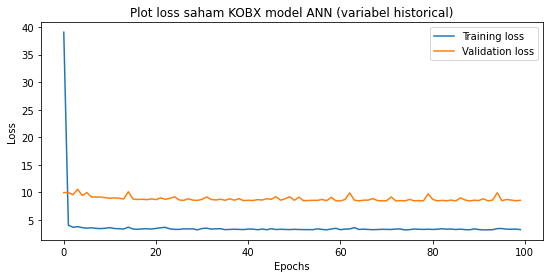

In [119]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_kobx_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham KOBX model ANN (variabel historical)");

In [114]:
# load in saved best peformance
import tensorflow as tf
model_best_kobx_ann_historical = tf.keras.models.load_model("kobx_ann_histo")  
kobx_model_2 = model_best_kobx_ann_historical.evaluate(X_test_kobx_historical, y_test_kobx_historical)
kobx_model_2

6/6 [==============================] - 0s 0s/step - loss: 6.5621 - mae: 6.5621


[6.56211519241333, 6.56211519241333]

In [115]:
y_pred_ann_kobx_historical = model_best_kobx_ann_historical.predict(X_test_kobx_historical)

6/6 [==============================] - 0s 2ms/step


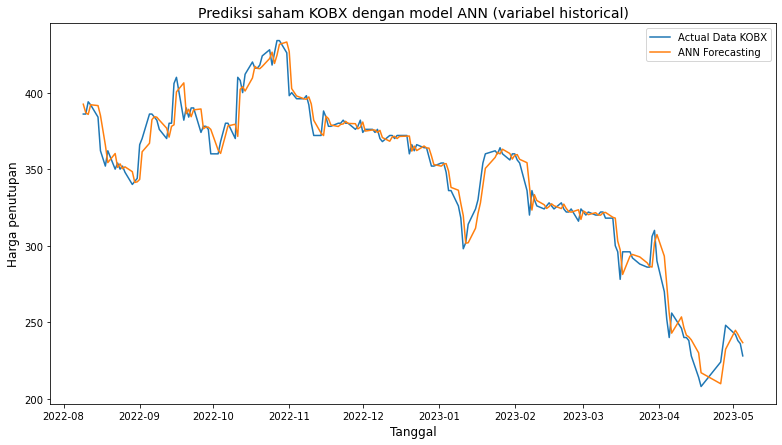

In [116]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_kobx, y_test_kobx_historical, label="Actual Data KOBX")
plt.plot(timestep_test_kobx, y_pred_ann_kobx_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham KOBX dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

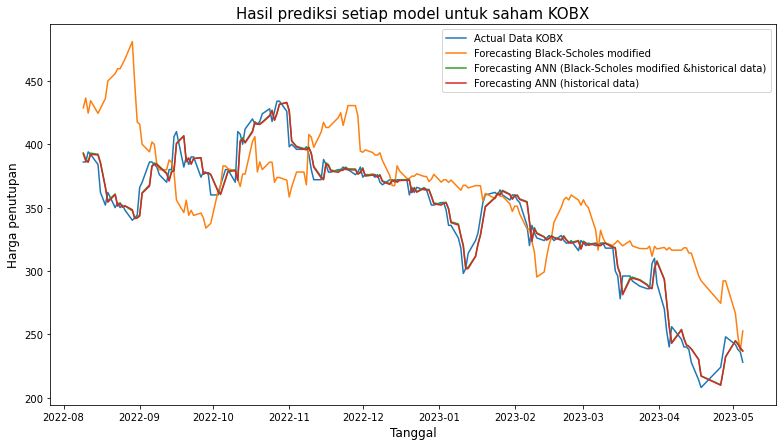

In [117]:
plt.figure(figsize=(13,7))
plt.plot(y_test_kobx, label="Actual Data KOBX")
plt.plot(y_pred_kobx_black_scholes, label="Forecasting Black-Scholes modified")
plt.plot(timestep_test_kobx, y_pred_ann_kobx, label="Forecasting ANN (Black-Scholes modified &historical data)")
plt.plot(timestep_test_kobx, y_pred_ann_kobx_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham KOBX", fontsize=15)
plt.legend();

### PTRO

In [118]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    ptro_saham[f"Close+{i+1}"] = ptro_saham["Close"].shift(periods=i+1)
ptro_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                               
2016-01-04  290.0             289.746623      NaN      NaN      NaN
2016-01-05  290.0             291.532125    290.0      NaN      NaN
2016-01-06  292.0             288.443187    290.0    290.0      NaN
2016-01-07  290.0             289.253364    292.0    290.0    290.0
2016-01-08  292.0             290.062562    290.0    292.0    290.0
2016-01-11  291.0             281.142661    292.0    290.0    292.0
2016-01-12  289.0             280.983162    291.0    292.0    290.0
2016-01-13  291.0             279.852076    289.0    291.0    292.0
2016-01-14  292.0             281.635688    291.0    289.0    291.0
2016-01-15  281.0             274.681757    292.0    291.0    289.0

In [132]:
timesteps = ptro_saham.dropna().index.to_numpy()
close = ptro_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([290., 292., 291., 289., 291., 292., 281., 283., 285., 285.]))

In [133]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

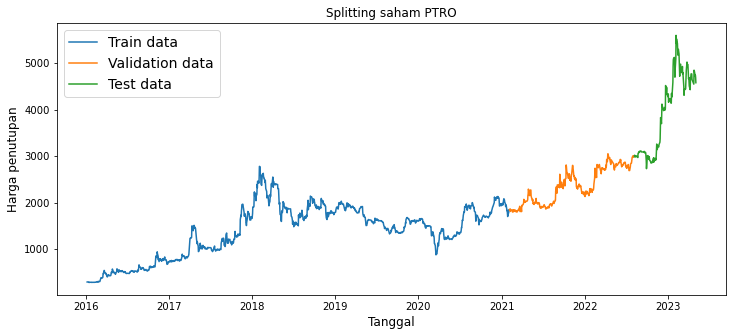

In [121]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham PTRO")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [122]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_ptro = ptro_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_ptro = ptro_saham.dropna()["Close"].astype(np.float32)
X_ptro.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07             289.253357    292.0    290.0    290.0
2016-01-08             290.062561    290.0    292.0    290.0
2016-01-11             281.142670    292.0    290.0    292.0
2016-01-12             280.983154    291.0    292.0    290.0
2016-01-13             279.852081    289.0    291.0    292.0

In [123]:
# make train, validation, test
train_size = int(len(X_ptro) * 0.7)
validation_size = int(len(X_ptro) * 0.2)

X_train_ptro, y_train_ptro = X_ptro[:train_size], y_ptro[:train_size]
X_val_ptro, y_val_ptro = X_ptro[train_size : train_size+validation_size], y_ptro[train_size : train_size+validation_size]
X_test_ptro, y_test_ptro = X_ptro[train_size+validation_size:], y_ptro[train_size+validation_size:]

**Hasil prediksi saham dengan Black-Scholes**

In [124]:
y_pred_ptro_black_scholes = X_test_ptro.copy()
y_pred_ptro_black_scholes = X_test_ptro.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_ptro_black_scholes

average_black_scholes
Date                             
2022-08-08            2708.238525
2022-08-09            2706.691895
2022-08-10            2744.069336
2022-08-11            2713.327393
2022-08-12            2672.900146
...                           ...
2023-04-28            4306.288574
2023-05-02            4559.725586
2023-05-03            4586.438477
2023-05-04            4486.062988
2023-05-05            4405.338379

[184 rows x 1 columns]

In [125]:
timestep_test_ptro = X_test_ptro.index.to_numpy()
timestep_test_ptro

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

ptro_black_scholes = mean_absolute_error(y_pred_ptro_black_scholes, y_test_ptro)
ptro_black_scholes

433.67654

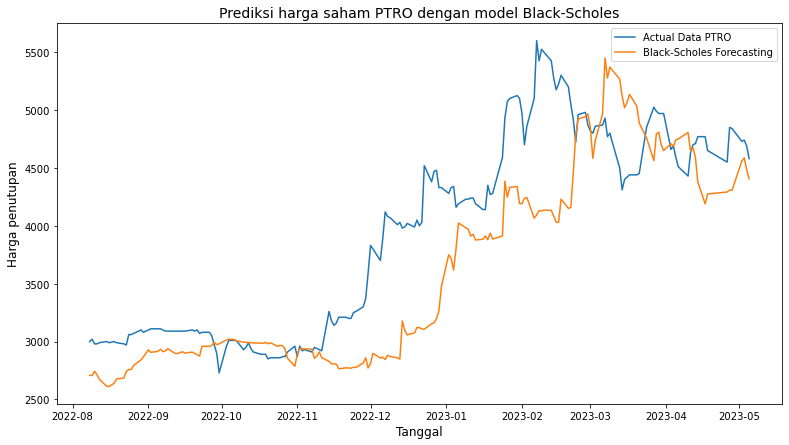

In [128]:
plt.figure(figsize=(13,7))
plt.plot(y_test_ptro, label="Actual Data PTRO")
plt.plot(y_pred_ptro_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham PTRO dengan model Black-Scholes", fontsize=14)
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [131]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_ptro = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_ptro.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_ptro_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_ptro = model_ann_ptro.fit(x=X_train_ptro,
                        y=y_train_ptro,
                        validation_data=(X_val_ptro, y_val_ptro),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 24ms/step - loss: 386.8067 - mae: 386.8067 - val_loss: 89.3174 - val_mae: 89.3174
Epoch 2/100
40/40 [==============================] - 1s 20ms/step - loss: 59.2940 - mae: 59.2940 - val_loss: 57.6168 - val_mae: 57.6168
Epoch 3/100
40/40 [==============================] - 1s 19ms/step - loss: 44.4374 - mae: 44.4374 - val_loss: 56.0479 - val_mae: 56.0479
Epoch 4/100
40/40 [==============================] - 1s 19ms/step - loss: 38.4198 - mae: 38.4198 - val_loss: 48.6469 - val_mae: 48.6469
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 37.0378 - mae: 37.0378 - val_loss: 52.0138 - val_mae: 52.0138
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 37.7140 - mae: 37.7140 - val_loss: 50.2110 - val_mae: 50.2110
Epoch 7/100
40/40 [==============================] - 1s 21ms/step - loss: 36.0531 - mae: 36.0531 - val_loss: 46.0131 - val_mae: 46.0131
Epoch 8/100
40/40 [=============================

40/40 [==============================] - 0s 3ms/step - loss: 31.2119 - mae: 31.2119 - val_loss: 38.8251 - val_mae: 38.8251
Epoch 35/100
40/40 [==============================] - 1s 18ms/step - loss: 31.2918 - mae: 31.2918 - val_loss: 37.6280 - val_mae: 37.6280
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 29.3383 - mae: 29.3383 - val_loss: 46.6546 - val_mae: 46.6546
Epoch 37/100
40/40 [==============================] - 0s 4ms/step - loss: 35.3073 - mae: 35.3073 - val_loss: 38.2072 - val_mae: 38.2072
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 30.7755 - mae: 30.7755 - val_loss: 38.7273 - val_mae: 38.7273
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 28.6661 - mae: 28.6661 - val_loss: 37.7429 - val_mae: 37.7429
Epoch 40/100
40/40 [==============================] - 0s 4ms/step - loss: 29.3186 - mae: 29.3186 - val_loss: 58.5483 - val_mae: 58.5483
Epoch 41/100
40/40 [==============================] - 0s 4ms

Epoch 86/100
40/40 [==============================] - 0s 7ms/step - loss: 33.2364 - mae: 33.2364 - val_loss: 37.3564 - val_mae: 37.3564
Epoch 87/100
40/40 [==============================] - 0s 4ms/step - loss: 29.6394 - mae: 29.6394 - val_loss: 38.3607 - val_mae: 38.3607
Epoch 88/100
40/40 [==============================] - 0s 3ms/step - loss: 29.4833 - mae: 29.4833 - val_loss: 39.8537 - val_mae: 39.8537
Epoch 89/100
40/40 [==============================] - 0s 3ms/step - loss: 29.1277 - mae: 29.1277 - val_loss: 40.1909 - val_mae: 40.1909
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 28.8928 - mae: 28.8928 - val_loss: 37.6016 - val_mae: 37.6016
Epoch 91/100
40/40 [==============================] - 0s 4ms/step - loss: 30.9436 - mae: 30.9436 - val_loss: 45.0205 - val_mae: 45.0205
Epoch 92/100
40/40 [==============================] - 0s 3ms/step - loss: 32.5305 - mae: 32.5305 - val_loss: 68.3571 - val_mae: 68.3571
Epoch 93/100
40/40 [============================

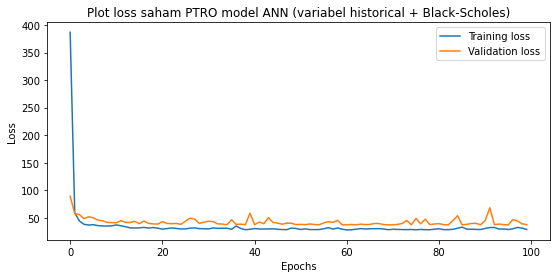

In [132]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_ptro.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham PTRO model ANN (variabel historical + Black-Scholes)")
plt.show();

In [133]:
model_ann_ptro.evaluate(X_test_ptro, y_test_ptro)

6/6 [==============================] - 0s 2ms/step - loss: 71.3137 - mae: 71.3137


[71.31369018554688, 71.31369018554688]

In [134]:
# load in saved best peformance
import tensorflow as tf
model_best_ptro_ann = tf.keras.models.load_model("best_ptro_ann")  
ptro_model_1= model_best_untr_ann.evaluate(X_test_ptro, y_test_ptro)
ptro_model_1

6/6 [==============================] - 0s 3ms/step - loss: 70.8674 - mae: 70.8674


[70.86736297607422, 70.86736297607422]

In [135]:
y_pred_ann_ptro = model_best_ptro_ann.predict(X_test_ptro)

6/6 [==============================] - 0s 2ms/step


In [136]:
mean_absolute_error(y_test_ptro,y_pred_ann_ptro)

69.71307

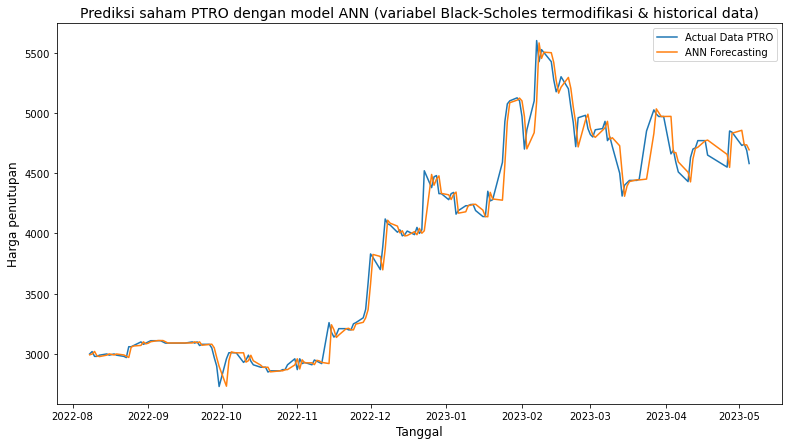

In [137]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_ptro, y_test_ptro, label="Actual Data PTRO")
plt.plot(timestep_test_ptro, y_pred_ann_ptro, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham PTRO dengan model ANN (variabel Black-Scholes termodifikasi & historical data)", fontsize=14)
plt.legend();

**Model ANN (Variabel historical)**

In [138]:
X_ptro_historical = X_ptro.copy()
X_ptro_historical = X_ptro_historical.drop(["average_black_scholes"], axis=1)

X_ptro_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07    292.0    290.0    290.0
2016-01-08    290.0    292.0    290.0
2016-01-11    292.0    290.0    292.0
2016-01-12    291.0    292.0    290.0
2016-01-13    289.0    291.0    292.0
...             ...      ...      ...
2023-04-28   4850.0   4550.0   4650.0
2023-05-02   4840.0   4850.0   4550.0
2023-05-03   4730.0   4840.0   4850.0
2023-05-04   4740.0   4730.0   4840.0
2023-05-05   4690.0   4740.0   4730.0

[1828 rows x 3 columns]

In [139]:
# make train, validation, test
train_size = int(len(X_ptro) * 0.7)
validation_size = int(len(X_ptro) * 0.2)

X_train_ptro_historical, y_train_ptro_historical = X_ptro_historical[:train_size], y_ptro[:train_size]
X_val_ptro_historical, y_val_ptro_historical = X_ptro_historical[train_size : train_size+validation_size], y_ptro[train_size : train_size+validation_size]
X_test_ptro_historical, y_test_ptro_historical = X_ptro_historical[train_size+validation_size:], y_ptro[train_size+validation_size:]

In [140]:
# Ini adalah model terbaik untuk ann saham untr dengan hanya menggunakan historical data

tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_ptro_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_ptro_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\ptro_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_ptro_historical = model_ann_ptro_historical.fit(x=X_train_ptro_historical,
                        y=y_train_ptro_historical,
                        validation_data=(X_val_ptro_historical, y_val_ptro_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 22ms/step - loss: 409.9056 - mae: 409.9056 - val_loss: 65.6177 - val_mae: 65.6177
Epoch 2/100
40/40 [==============================] - 1s 22ms/step - loss: 41.4065 - mae: 41.4065 - val_loss: 44.7766 - val_mae: 44.7766
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 36.4882 - mae: 36.4882 - val_loss: 47.7601 - val_mae: 47.7601
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 35.1174 - mae: 35.1174 - val_loss: 44.9427 - val_mae: 44.9427
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 34.5150 - mae: 34.5150 - val_loss: 48.2185 - val_mae: 48.2185
Epoch 6/100
40/40 [==============================] - 1s 18ms/step - loss: 36.7885 - mae: 36.7885 - val_loss: 40.8364 - val_mae: 40.8364
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 33.5634 - mae: 33.5634 - val_loss: 48.7748 - val_mae: 48.7748
Epoch 8/100
40/40 [==============================]

40/40 [==============================] - 0s 4ms/step - loss: 28.3894 - mae: 28.3894 - val_loss: 37.2550 - val_mae: 37.2550
Epoch 99/100
40/40 [==============================] - 0s 4ms/step - loss: 29.9393 - mae: 29.9393 - val_loss: 41.7650 - val_mae: 41.7650
Epoch 100/100
40/40 [==============================] - 0s 4ms/step - loss: 28.4010 - mae: 28.4010 - val_loss: 37.1029 - val_mae: 37.1029


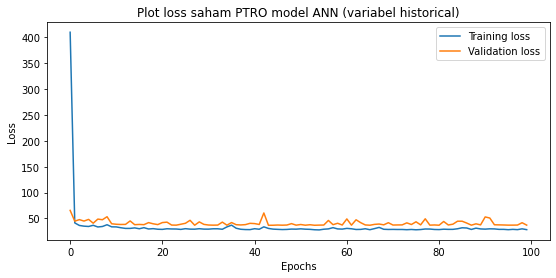

In [141]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_ptro_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham PTRO model ANN (variabel historical)");

In [140]:
# load in saved best peformance
import tensorflow as tf
model_best_ptro_ann_historical = tf.keras.models.load_model("ptro_ann_histo")  
ptro_model_2 = model_best_ptro_ann_historical.evaluate(X_test_ptro_historical, y_test_ptro_historical)
ptro_model_2

6/6 [==============================] - 0s 3ms/step - loss: 69.4916 - mae: 69.4916


[69.49156188964844, 69.49156188964844]

In [141]:
y_pred_ann_ptro_historical = model_best_ptro_ann_historical.predict(X_test_ptro_historical)

6/6 [==============================] - 0s 0s/step


In [142]:
mean_absolute_error(y_test_ptro_historical,y_pred_ann_ptro_historical)

69.49157

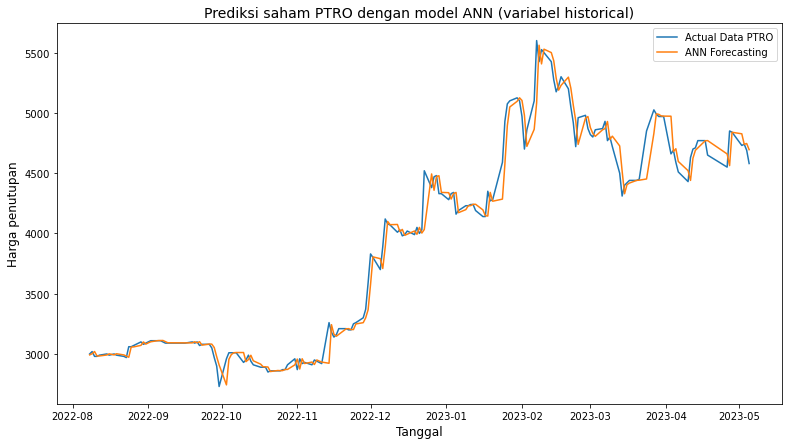

In [143]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_ptro, y_test_ptro_historical, label="Actual Data PTRO")
plt.plot(timestep_test_ptro, y_pred_ann_ptro_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham PTRO dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

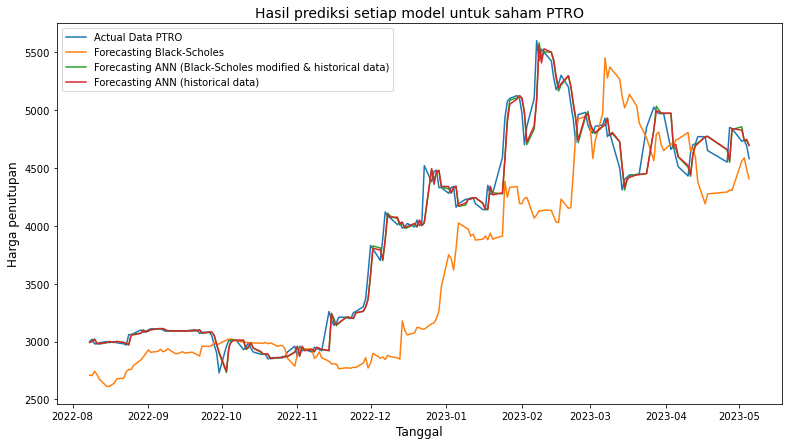

In [144]:
plt.figure(figsize=(13,7))
plt.plot(y_test_ptro, label="Actual Data PTRO")
plt.plot(y_pred_ptro_black_scholes, label="Forecasting Black-Scholes")
plt.plot(timestep_test_ptro, y_pred_ann_ptro, label="Forecasting ANN (Black-Scholes modified & historical data)")
plt.plot(timestep_test_ptro, y_pred_ann_ptro_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham PTRO", fontsize=14)
plt.legend();

### BBCA

In [145]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bbca_saham[f"Close+{i+1}"] = bbca_saham["Close"].shift(periods=i+1)
bbca_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                
2016-01-04  2645.0            2636.526814      NaN      NaN      NaN
2016-01-05  2675.0            2646.041451   2645.0      NaN      NaN
2016-01-06  2640.0            2645.607015   2675.0   2645.0      NaN
2016-01-07  2600.0            2610.367759   2640.0   2675.0   2645.0
2016-01-08  2600.0            2629.824457   2600.0   2640.0   2675.0
2016-01-11  2550.0            2589.628749   2600.0   2600.0   2640.0
2016-01-12  2620.0            2589.203626   2550.0   2600.0   2600.0
2016-01-13  2635.0            2683.187018   2620.0   2550.0   2600.0
2016-01-14  2605.0            2623.129973   2635.0   2620.0   2550.0
2016-01-15  2600.0            2622.699389   2605.0   2635.0   2620.0

In [146]:
timesteps = bbca_saham.dropna().index.to_numpy()
close = bbca_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([2600., 2600., 2550., 2620., 2635., 2605., 2600., 2595., 2615.,
        2605.]))

In [147]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

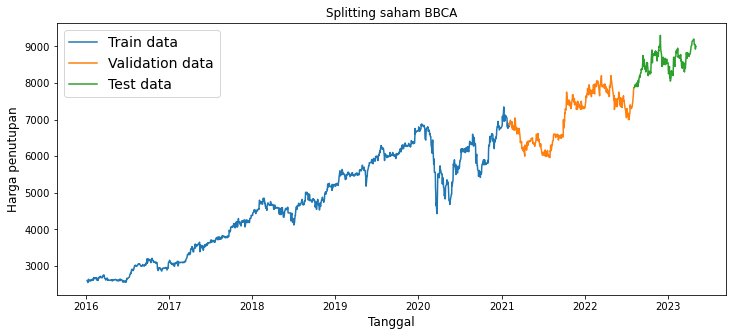

In [148]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham BBCA")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [149]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_bbca = bbca_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_bbca = bbca_saham.dropna()["Close"].astype(np.float32)
X_bbca.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            2610.367676   2640.0   2675.0   2645.0
2016-01-08            2629.824463   2600.0   2640.0   2675.0
2016-01-11            2589.628662   2600.0   2600.0   2640.0
2016-01-12            2589.203613   2550.0   2600.0   2600.0
2016-01-13            2683.187012   2620.0   2550.0   2600.0

In [150]:
# make train, validation, test
train_size = int(len(X_bbca) * 0.7)
validation_size = int(len(X_bbca) * 0.2)

X_train_bbca, y_train_bbca = X_bbca[:train_size], y_bbca[:train_size]
X_val_bbca, y_val_bbca = X_bbca[train_size : train_size+validation_size], y_bbca[train_size : train_size+validation_size]
X_test_bbca, y_test_bbca = X_bbca[train_size+validation_size:], y_bbca[train_size+validation_size:]

**Hasil prediksi saham dengan Black-Scholes**

In [151]:
y_pred_bbca_black_scholes = X_test_bbca.copy()
y_pred_bbca_black_scholes = X_test_bbca.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_bbca_black_scholes

average_black_scholes
Date                             
2022-08-08            7095.726074
2022-08-09            7069.746582
2022-08-10            7118.181152
2022-08-11            6943.418457
2022-08-12            6967.063965
...                           ...
2023-04-28            8325.112305
2023-05-02            8758.012695
2023-05-03            8731.680664
2023-05-04            8680.484375
2023-05-05            8703.910156

[184 rows x 1 columns]

In [152]:
timestep_test_bbca = X_test_bbca.index.to_numpy()
timestep_test_bbca

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [153]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

bbca_black_scholes = mean_absolute_error(y_pred_bbca_black_scholes, y_test_bbca)
bbca_black_scholes

402.55228

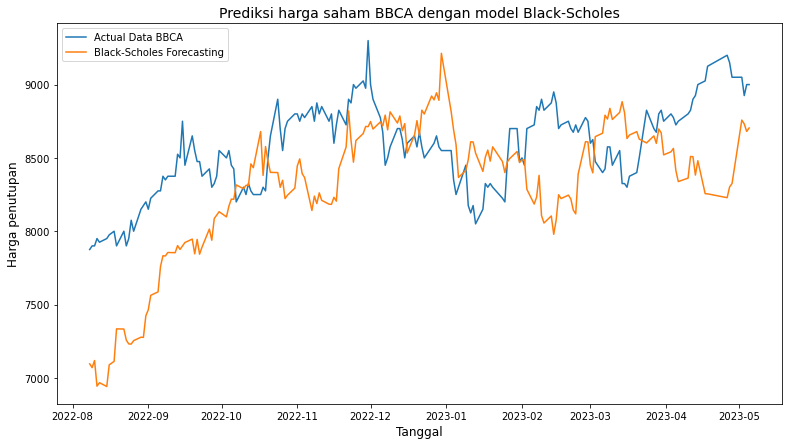

In [154]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bbca, label="Actual Data BBCA")
plt.plot(y_pred_bbca_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham BBCA dengan model Black-Scholes", fontsize=14)
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [154]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bbca = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bbca.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_bbca_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bbca = model_ann_bbca.fit(x=X_train_bbca,
                        y=y_train_bbca,
                        validation_data=(X_val_bbca, y_val_bbca),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
41/41 [==============================] - 2s 33ms/step - loss: 1222.1171 - mae: 1222.1171 - val_loss: 234.7652 - val_mae: 234.7652
Epoch 2/100
41/41 [==============================] - 1s 20ms/step - loss: 100.5526 - mae: 100.5526 - val_loss: 198.0280 - val_mae: 198.0280
Epoch 3/100
41/41 [==============================] - 1s 20ms/step - loss: 84.4646 - mae: 84.4646 - val_loss: 124.6530 - val_mae: 124.6530
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 77.1682 - mae: 77.1682 - val_loss: 240.6676 - val_mae: 240.6676
Epoch 5/100
41/41 [==============================] - 1s 24ms/step - loss: 84.5956 - mae: 84.5956 - val_loss: 108.8615 - val_mae: 108.8615
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 72.4175 - mae: 72.4175 - val_loss: 120.2598 - val_mae: 120.2598
Epoch 7/100
41/41 [==============================] - 1s 19ms/step - loss: 73.3204 - mae: 73.3204 - val_loss: 107.5334 - val_mae: 107.5334
Epoch 8/100
41/41 [===========

Epoch 34/100
41/41 [==============================] - 1s 21ms/step - loss: 56.7720 - mae: 56.7720 - val_loss: 80.9755 - val_mae: 80.9755
Epoch 35/100
41/41 [==============================] - 0s 3ms/step - loss: 58.7580 - mae: 58.7580 - val_loss: 99.6578 - val_mae: 99.6578
Epoch 36/100
41/41 [==============================] - 0s 5ms/step - loss: 56.9405 - mae: 56.9405 - val_loss: 109.6939 - val_mae: 109.6939
Epoch 37/100
41/41 [==============================] - 0s 4ms/step - loss: 57.9736 - mae: 57.9736 - val_loss: 92.8974 - val_mae: 92.8974
Epoch 38/100
41/41 [==============================] - 0s 3ms/step - loss: 53.0880 - mae: 53.0880 - val_loss: 105.0742 - val_mae: 105.0742
Epoch 39/100
41/41 [==============================] - 1s 29ms/step - loss: 66.4888 - mae: 66.4888 - val_loss: 80.5210 - val_mae: 80.5210
Epoch 40/100
41/41 [==============================] - 0s 7ms/step - loss: 57.0844 - mae: 57.0844 - val_loss: 80.6310 - val_mae: 80.6310
Epoch 41/100
41/41 [======================

In [155]:
pd.DataFrame(history_ann_bbca.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})

Training loss          mae  Validation loss     val_mae
0     1222.117065  1222.117065       234.765182  234.765182
1      100.552612   100.552612       198.027969  198.027969
2       84.464584    84.464584       124.653046  124.653046
3       77.168221    77.168221       240.667648  240.667648
4       84.595627    84.595627       108.861458  108.861458
..            ...          ...              ...         ...
95      50.207607    50.207607        83.261566   83.261566
96      49.902615    49.902615        77.428673   77.428673
97      51.876743    51.876743        77.657097   77.657097
98      69.587669    69.587669        92.460960   92.460960
99      53.121159    53.121159       130.136475  130.136475

[100 rows x 4 columns]

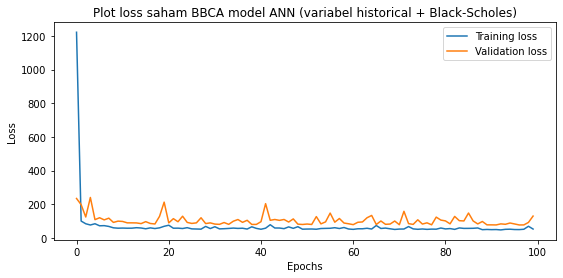

In [156]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bbca.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BBCA model ANN (variabel historical + Black-Scholes)")
plt.show();

In [155]:
# load in saved best peformance
import tensorflow as tf
model_best_bbca_ann = tf.keras.models.load_model("best_bbca_ann")  
bbca_model_1 = model_best_bbca_ann.evaluate(X_test_bbca, y_test_bbca)
bbca_model_1

6/6 [==============================] - 0s 3ms/step - loss: 85.0702 - mae: 85.0702


[85.07017517089844, 85.07017517089844]

In [156]:
y_pred_ann_bbca = model_best_bbca_ann.predict(X_test_bbca)

6/6 [==============================] - 0s 2ms/step


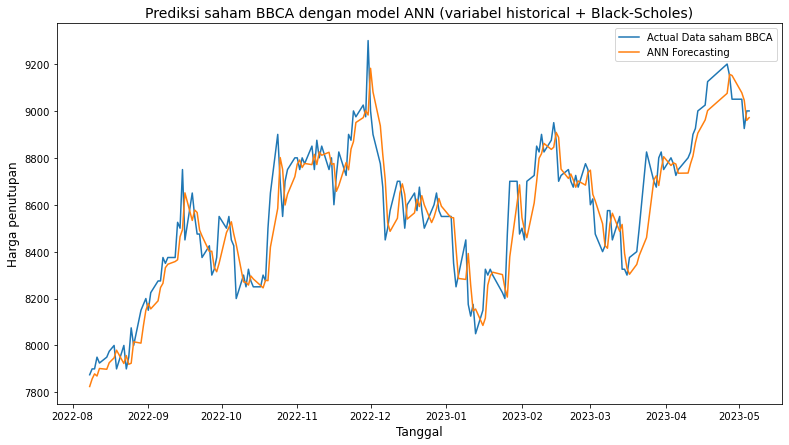

In [157]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bbca, y_test_bbca, label="Actual Data saham BBCA")
plt.plot(timestep_test_bbca, y_pred_ann_bbca, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BBCA dengan model ANN (variabel historical + Black-Scholes)", fontsize=14)
plt.legend();

**Model ANN (Variabel historical)**

In [158]:
X_bbca_historical = X_bbca.copy()
X_bbca_historical = X_bbca_historical.drop(["average_black_scholes"], axis=1)

X_bbca_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07   2640.0   2675.0   2645.0
2016-01-08   2600.0   2640.0   2675.0
2016-01-11   2600.0   2600.0   2640.0
2016-01-12   2550.0   2600.0   2600.0
2016-01-13   2620.0   2550.0   2600.0
...             ...      ...      ...
2023-04-28   9150.0   9200.0   9125.0
2023-05-02   9050.0   9150.0   9200.0
2023-05-03   9050.0   9050.0   9150.0
2023-05-04   8925.0   9050.0   9050.0
2023-05-05   9000.0   8925.0   9050.0

[1831 rows x 3 columns]

In [159]:
# make train, validation, test
train_size = int(len(X_bbca) * 0.7)
validation_size = int(len(X_bbca) * 0.2)

X_train_bbca_historical, y_train_bbca_historical = X_bbca_historical[:train_size], y_bbca[:train_size]
X_val_bbca_historical, y_val_bbca_historical = X_bbca_historical[train_size : train_size+validation_size], y_bbca[train_size : train_size+validation_size]
X_test_bbca_historical, y_test_bbca_historical = X_bbca_historical[train_size+validation_size:], y_bbca[train_size+validation_size:]

In [162]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bbca_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bbca_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\bbca_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bbca_historical = model_ann_bbca_historical.fit(x=X_train_bbca_historical,
                        y=y_train_bbca_historical,
                        validation_data=(X_val_bbca_historical, y_val_bbca_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
41/41 [==============================] - 2s 28ms/step - loss: 1333.7867 - mae: 1333.7867 - val_loss: 123.5536 - val_mae: 123.5536
Epoch 2/100
41/41 [==============================] - 1s 20ms/step - loss: 88.6462 - mae: 88.6462 - val_loss: 87.1929 - val_mae: 87.1929
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 63.8902 - mae: 63.8902 - val_loss: 91.9771 - val_mae: 91.9771
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 57.3350 - mae: 57.3350 - val_loss: 108.9171 - val_mae: 108.9171
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 60.1084 - mae: 60.1084 - val_loss: 97.3069 - val_mae: 97.3069
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 63.9001 - mae: 63.9001 - val_loss: 88.1434 - val_mae: 88.1434
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 58.0578 - mae: 58.0578 - val_loss: 108.6821 - val_mae: 108.6821
Epoch 8/100
41/41 [========================

Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 51.4960 - mae: 51.4960 - val_loss: 81.0141 - val_mae: 81.0141
Epoch 95/100
41/41 [==============================] - 0s 3ms/step - loss: 52.4258 - mae: 52.4258 - val_loss: 100.2036 - val_mae: 100.2036
Epoch 96/100
41/41 [==============================] - 0s 3ms/step - loss: 50.4532 - mae: 50.4532 - val_loss: 84.1395 - val_mae: 84.1395
Epoch 97/100
41/41 [==============================] - 0s 3ms/step - loss: 50.6978 - mae: 50.6978 - val_loss: 121.1783 - val_mae: 121.1783
Epoch 98/100
41/41 [==============================] - 0s 3ms/step - loss: 50.6013 - mae: 50.6013 - val_loss: 87.7047 - val_mae: 87.7047
Epoch 99/100
41/41 [==============================] - 0s 3ms/step - loss: 62.5172 - mae: 62.5172 - val_loss: 105.2057 - val_mae: 105.2057
Epoch 100/100
41/41 [==============================] - 0s 3ms/step - loss: 56.7038 - mae: 56.7038 - val_loss: 78.9735 - val_mae: 78.9735


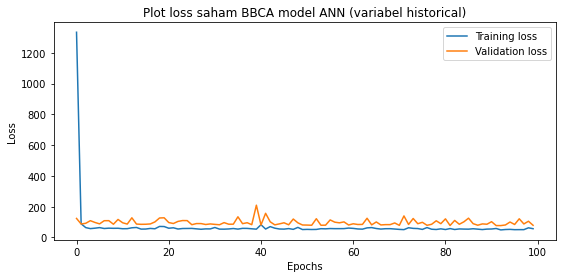

In [163]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bbca_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BBCA model ANN (variabel historical)");

In [160]:
# load in saved best peformance
import tensorflow as tf
model_best_bbca_ann_historical = tf.keras.models.load_model("bbca_ann_histo")  
bbca_model_2 = model_best_bbca_ann_historical.evaluate(X_test_bbca_historical, y_test_bbca_historical)
bbca_model_2

6/6 [==============================] - 0s 2ms/step - loss: 84.3311 - mae: 84.3311


[84.33111572265625, 84.33111572265625]

In [161]:
y_pred_ann_bbca_historical = model_best_bbca_ann_historical.predict(X_test_bbca_historical)

6/6 [==============================] - 0s 2ms/step


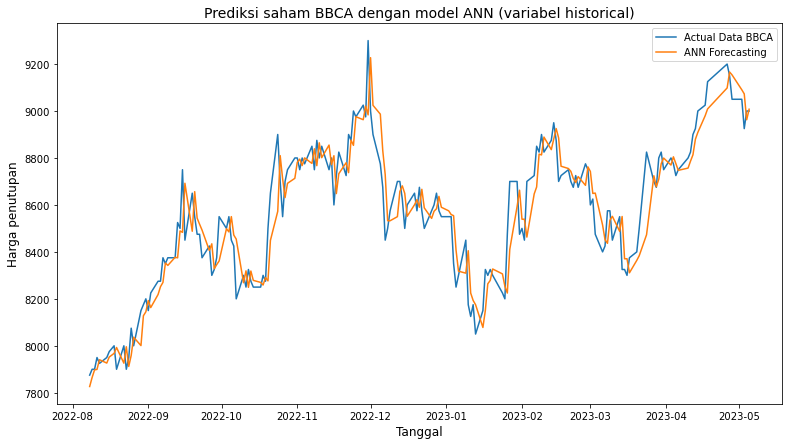

In [162]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bbca, y_test_bbca_historical, label="Actual Data BBCA")
plt.plot(timestep_test_bbca, y_pred_ann_bbca_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BBCA dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

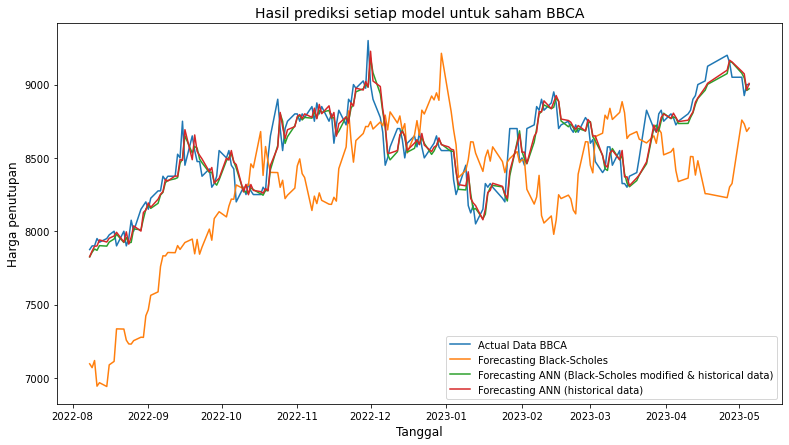

In [163]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bbca, label="Actual Data BBCA")
plt.plot(y_pred_bbca_black_scholes, label="Forecasting Black-Scholes")
plt.plot(timestep_test_bbca, y_pred_ann_bbca, label="Forecasting ANN (Black-Scholes modified & historical data)")
plt.plot(timestep_test_bbca, y_pred_ann_bbca_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham BBCA", fontsize=14)
plt.legend();

### BBNI

In [164]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bbni_saham[f"Close+{i+1}"] = bbni_saham["Close"].shift(periods=i+1)
bbni_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                
2016-01-04  4890.0            4932.674658      NaN      NaN      NaN
2016-01-05  4950.0            4946.541309   4890.0      NaN      NaN
2016-01-06  5050.0            4950.481229   4950.0   4890.0      NaN
2016-01-07  4985.0            4914.744287   5050.0   4950.0   4890.0
2016-01-08  5000.0            4958.355572   4985.0   5050.0   4950.0
2016-01-11  4935.0            4952.375332   5000.0   4985.0   5050.0
2016-01-12  4920.0            4951.353662   4935.0   5000.0   4985.0
2016-01-13  4985.0            4955.287494   4920.0   4935.0   5000.0
2016-01-14  5025.0            4884.905518   4985.0   4920.0   4935.0
2016-01-15  4975.0            4755.113456   5025.0   4985.0   4920.0

In [165]:
timesteps = bbni_saham.dropna().index.to_numpy()
close = bbni_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([4985., 5000., 4935., 4920., 4985., 5025., 4975., 4920., 4960.,
        4850.]))

In [166]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

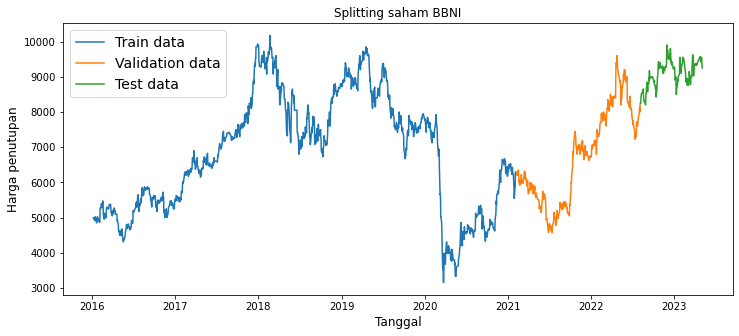

In [168]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham BBNI")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [169]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_bbni = bbni_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_bbni = bbni_saham.dropna()["Close"].astype(np.float32)
X_bbni.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            4914.744141   5050.0   4950.0   4890.0
2016-01-08            4958.355469   4985.0   5050.0   4950.0
2016-01-11            4952.375488   5000.0   4985.0   5050.0
2016-01-12            4951.353516   4935.0   5000.0   4985.0
2016-01-13            4955.287598   4920.0   4935.0   5000.0

In [170]:
# make train, validation, test
train_size = int(len(X_bbni) * 0.7)
validation_size = int(len(X_bbni) * 0.2)

X_train_bbni, y_train_bbni = X_bbni[:train_size], y_bbni[:train_size]
X_val_bbni, y_val_bbni = X_bbni[train_size : train_size+validation_size], y_bbni[train_size : train_size+validation_size]
X_test_bbni, y_test_bbni = X_bbni[train_size+validation_size:], y_bbni[train_size+validation_size:]

**Hasil prediksi saham dengan Black-Scholes**

In [171]:
y_pred_bbni_black_scholes = X_test_bbni.copy()
y_pred_bbni_black_scholes = X_test_bbni.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_bbni_black_scholes

average_black_scholes
Date                             
2022-08-08            7524.497070
2022-08-09            7423.946289
2022-08-10            7372.919922
2022-08-11            7148.760742
2022-08-12            7196.736328
...                           ...
2023-04-28            8912.721680
2023-05-02            9282.604492
2023-05-03            9280.666016
2023-05-04            9253.917969
2023-05-05            9301.593750

[184 rows x 1 columns]

In [172]:
timestep_test_bbni = X_test_bbni.index.to_numpy()
timestep_test_bbni

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [173]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_pred_bbni_black_scholes, y_test_bbni)

477.2464

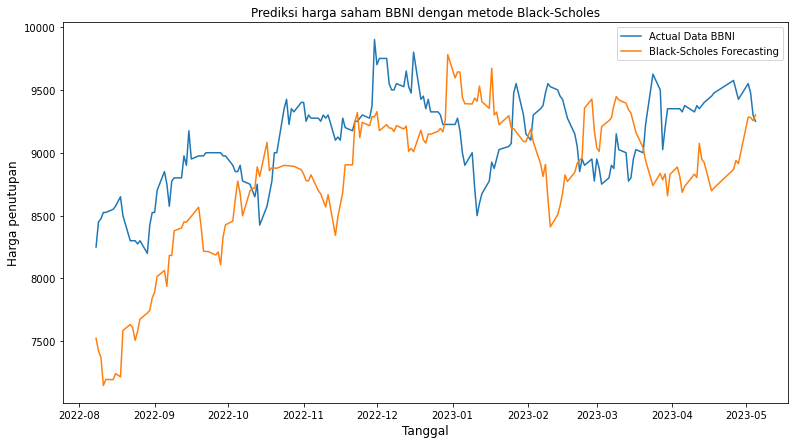

In [174]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bbni, label="Actual Data BBNI")
plt.plot(y_pred_bbni_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham BBNI dengan metode Black-Scholes")
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [175]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bbni = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bbni.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_bbni_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bbni = model_ann_bbni.fit(x=X_train_bbni,
                        y=y_train_bbni,
                        validation_data=(X_val_bbni, y_val_bbni),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 19ms/step - loss: 1846.7031 - mae: 1846.7031 - val_loss: 221.3729 - val_mae: 221.3729
Epoch 2/100
40/40 [==============================] - 1s 16ms/step - loss: 229.4753 - mae: 229.4753 - val_loss: 192.8265 - val_mae: 192.8265
Epoch 3/100
40/40 [==============================] - 1s 19ms/step - loss: 174.6790 - mae: 174.6790 - val_loss: 159.9316 - val_mae: 159.9316
Epoch 4/100
40/40 [==============================] - 1s 15ms/step - loss: 154.6557 - mae: 154.6557 - val_loss: 139.0798 - val_mae: 139.0798
Epoch 5/100
40/40 [==============================] - 1s 21ms/step - loss: 131.9381 - mae: 131.9381 - val_loss: 130.2715 - val_mae: 130.2715
Epoch 6/100
40/40 [==============================] - 1s 22ms/step - loss: 129.3075 - mae: 129.3075 - val_loss: 122.7500 - val_mae: 122.7500
Epoch 7/100
40/40 [==============================] - 1s 19ms/step - loss: 127.1110 - mae: 127.1110 - val_loss: 120.7473 - val_mae: 120.7473
Epoch 8/100
40/40 

Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 116.9004 - mae: 116.9004 - val_loss: 112.7353 - val_mae: 112.7353
Epoch 34/100
40/40 [==============================] - 1s 17ms/step - loss: 114.2000 - mae: 114.2000 - val_loss: 104.9286 - val_mae: 104.9286
Epoch 35/100
40/40 [==============================] - 0s 3ms/step - loss: 111.9198 - mae: 111.9198 - val_loss: 121.1188 - val_mae: 121.1188
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 110.8897 - mae: 110.8897 - val_loss: 105.7765 - val_mae: 105.7765
Epoch 37/100
40/40 [==============================] - 1s 19ms/step - loss: 133.9062 - mae: 133.9062 - val_loss: 104.1341 - val_mae: 104.1341
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 109.0305 - mae: 109.0305 - val_loss: 111.2063 - val_mae: 111.2063
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 121.4152 - mae: 121.4152 - val_loss: 110.3232 - val_mae: 110.3232
Epoch 40/100
40/40

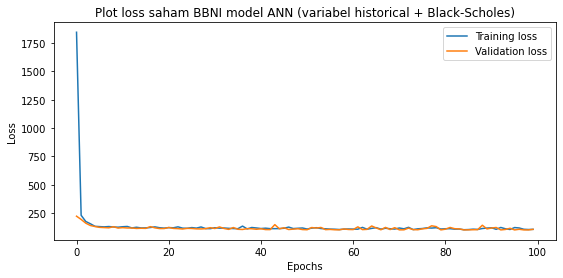

In [176]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bbni.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BBNI model ANN (variabel historical + Black-Scholes)")
plt.show();

In [175]:
# load in saved best peformance
import tensorflow as tf
model_best_bbni_ann = tf.keras.models.load_model("best_bbni_ann")  
model_best_bbni_ann.evaluate(X_test_bbni, y_test_bbni)

6/6 [==============================] - 0s 2ms/step - loss: 94.1558 - mae: 94.1558


[94.15582275390625, 94.15582275390625]

In [176]:
y_pred_ann_bbni = model_best_bbni_ann.predict(X_test_bbni)

6/6 [==============================] - 0s 3ms/step


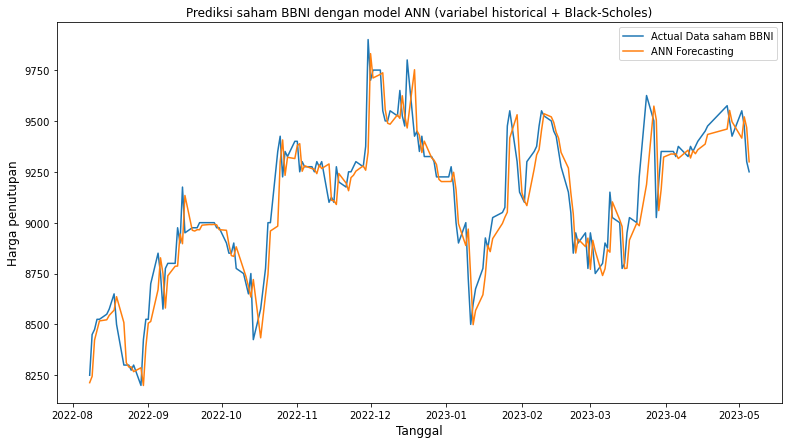

In [177]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bbni, y_test_bbni, label="Actual Data saham BBNI")
plt.plot(timestep_test_bbni, y_pred_ann_bbni, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BBNI dengan model ANN (variabel historical + Black-Scholes)")
plt.legend();

**Model ANN (Variabel historical)**

In [178]:
X_bbni_historical = X_bbni.copy()
X_bbni_historical = X_bbni_historical.drop(["average_black_scholes"], axis=1)

X_bbni_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07   5050.0   4950.0   4890.0
2016-01-08   4985.0   5050.0   4950.0
2016-01-11   5000.0   4985.0   5050.0
2016-01-12   4935.0   5000.0   4985.0
2016-01-13   4920.0   4935.0   5000.0
...             ...      ...      ...
2023-04-28   9500.0   9575.0   9475.0
2023-05-02   9425.0   9500.0   9575.0
2023-05-03   9550.0   9425.0   9500.0
2023-05-04   9475.0   9550.0   9425.0
2023-05-05   9300.0   9475.0   9550.0

[1828 rows x 3 columns]

In [179]:
# make train, validation, test
train_size = int(len(X_bbni) * 0.7)
validation_size = int(len(X_bbni) * 0.2)

X_train_bbni_historical, y_train_bbni_historical = X_bbni_historical[:train_size], y_bbni[:train_size]
X_val_bbni_historical, y_val_bbni_historical = X_bbni_historical[train_size : train_size+validation_size], y_bbni[train_size : train_size+validation_size]
X_test_bbni_historical, y_test_bbni_historical = X_bbni_historical[train_size+validation_size:], y_bbni[train_size+validation_size:]

In [182]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bbni_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bbni_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\bbni_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bbni_historical = model_ann_bbni_historical.fit(x=X_train_bbni_historical,
                        y=y_train_bbni_historical,
                        validation_data=(X_val_bbni_historical, y_val_bbni_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 2s 32ms/step - loss: 1968.8804 - mae: 1968.8804 - val_loss: 149.7140 - val_mae: 149.7140
Epoch 2/100
40/40 [==============================] - 1s 18ms/step - loss: 159.2353 - mae: 159.2353 - val_loss: 124.3876 - val_mae: 124.3876
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 126.5840 - mae: 126.5840 - val_loss: 125.0823 - val_mae: 125.0823
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 128.5048 - mae: 128.5048 - val_loss: 128.9507 - val_mae: 128.9507
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 123.9834 - mae: 123.9834 - val_loss: 126.4129 - val_mae: 126.4129
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 127.5167 - mae: 127.5167 - val_loss: 125.3091 - val_mae: 125.3091
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 126.2253 - mae: 126.2253 - val_loss: 126.8589 - val_mae: 126.8589
Epoch 8/100
40/40 [====

Epoch 33/100
40/40 [==============================] - 0s 4ms/step - loss: 107.7343 - mae: 107.7343 - val_loss: 109.3414 - val_mae: 109.3414
Epoch 34/100
40/40 [==============================] - 0s 4ms/step - loss: 103.9782 - mae: 103.9782 - val_loss: 103.1250 - val_mae: 103.1250
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 108.8411 - mae: 108.8411 - val_loss: 115.9165 - val_mae: 115.9165
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 106.2143 - mae: 106.2143 - val_loss: 104.2037 - val_mae: 104.2037
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 119.8341 - mae: 119.8341 - val_loss: 108.3788 - val_mae: 108.3788
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 107.9644 - mae: 107.9644 - val_loss: 114.1120 - val_mae: 114.1120
Epoch 39/100
40/40 [==============================] - 1s 20ms/step - loss: 110.4940 - mae: 110.4940 - val_loss: 102.3692 - val_mae: 102.3692
Epoch 40/100
40/40 

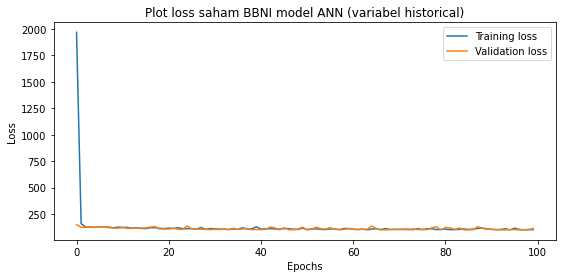

In [183]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bbni_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BBNI model ANN (variabel historical)");

In [180]:
# load in saved best peformance
import tensorflow as tf
model_best_bbni_ann_historical = tf.keras.models.load_model("bbni_ann_histo")  
model_best_bbni_ann_historical.evaluate(X_test_bbni_historical, y_test_bbni_historical)

6/6 [==============================] - 0s 2ms/step - loss: 93.2562 - mae: 93.2562


[93.2562484741211, 93.2562484741211]

In [181]:
y_pred_ann_bbni_historical = model_best_bbni_ann_historical.predict(X_test_bbni_historical)

6/6 [==============================] - 0s 2ms/step


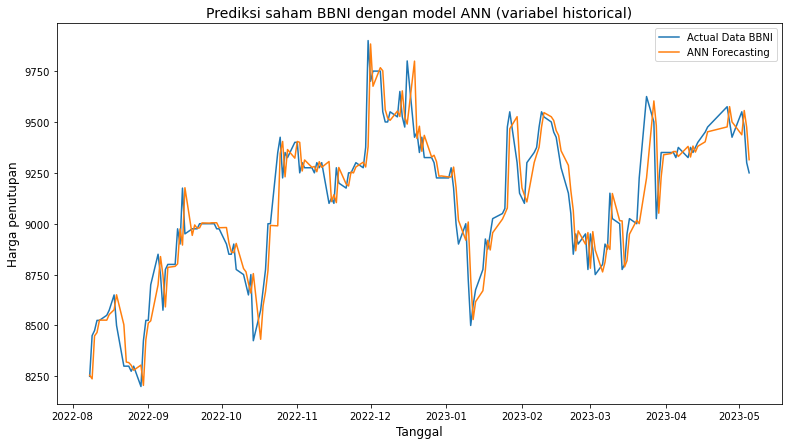

In [182]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bbni, y_test_bbni_historical, label="Actual Data BBNI")
plt.plot(timestep_test_bbni, y_pred_ann_bbni_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BBNI dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

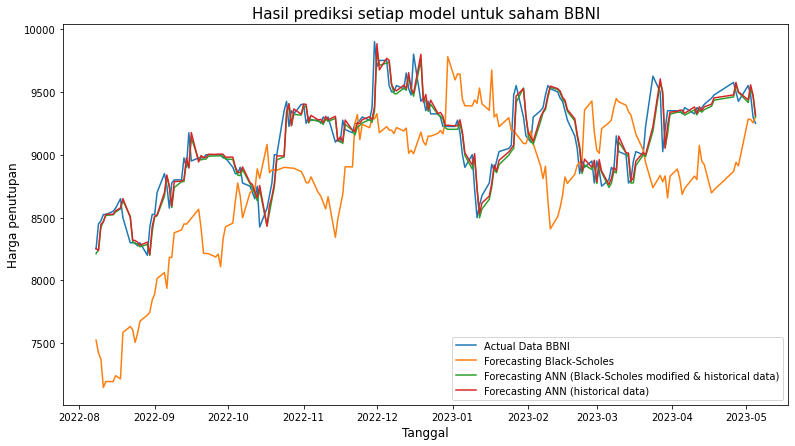

In [183]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bbni, label="Actual Data BBNI")
plt.plot(y_pred_bbni_black_scholes, label="Forecasting Black-Scholes")
plt.plot(timestep_test_bbni, y_pred_ann_bbni, label="Forecasting ANN (Black-Scholes modified & historical data)")
plt.plot(timestep_test_bbni, y_pred_ann_bbni_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham BBNI", fontsize=15)
plt.legend();

### BBRI

In [184]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bbri_saham[f"Close+{i+1}"] = bbri_saham["Close"].shift(periods=i+1)
bbri_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                
2016-01-04  2295.0            2231.484189      NaN      NaN      NaN
2016-01-05  2315.0            2235.925060   2295.0      NaN      NaN
2016-01-06  2305.0            2235.407198   2315.0   2295.0      NaN
2016-01-07  2250.0            2239.844864   2305.0   2315.0   2295.0
2016-01-08  2320.0            2189.783481   2250.0   2305.0   2315.0
2016-01-11  2275.0            2159.557623   2320.0   2250.0   2305.0
2016-01-12  2320.0            2159.057448   2275.0   2320.0   2250.0
2016-01-13  2320.0            2153.606569   2320.0   2275.0   2320.0
2016-01-14  2345.0            2143.208427   2320.0   2320.0   2275.0
2016-01-15  2290.0            2113.020879   2345.0   2320.0   2320.0

In [185]:
timesteps = bbri_saham.dropna().index.to_numpy()
close = bbri_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([2250., 2320., 2275., 2320., 2320., 2345., 2290., 2280., 2300.,
        2200.]))

In [186]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

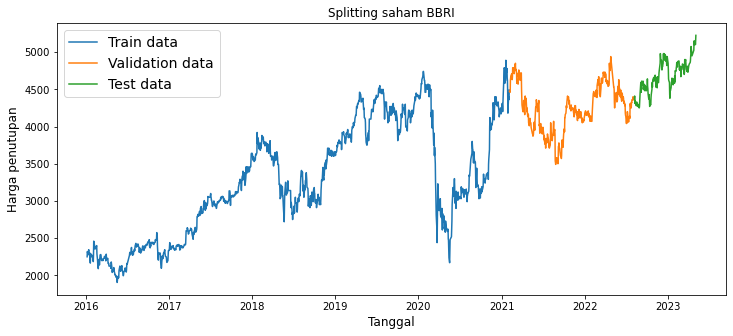

In [188]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham BBRI")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [189]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_bbri = bbri_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_bbri = bbri_saham.dropna()["Close"].astype(np.float32)
X_bbri.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            2239.844971   2305.0   2315.0   2295.0
2016-01-08            2189.783447   2250.0   2305.0   2315.0
2016-01-11            2159.557617   2320.0   2250.0   2305.0
2016-01-12            2159.057373   2275.0   2320.0   2250.0
2016-01-13            2153.606689   2320.0   2275.0   2320.0

In [190]:
# make train, validation, test
train_size = int(len(X_bbri) * 0.7)
validation_size = int(len(X_bbri) * 0.2)

X_train_bbri, y_train_bbri = X_bbri[:train_size], y_bbri[:train_size]
X_val_bbri, y_val_bbri = X_bbri[train_size : train_size+validation_size], y_bbri[train_size : train_size+validation_size]
X_test_bbri, y_test_bbri = X_bbri[train_size+validation_size:], y_bbri[train_size+validation_size:]

**Hasil prediksi saham dengan Black-Scholes**

In [191]:
y_pred_bbri_black_scholes = X_test_bbri.copy()
y_pred_bbri_black_scholes = X_test_bbri.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_bbri_black_scholes

average_black_scholes
Date                             
2022-08-08            4158.067871
2022-08-09            4077.914062
2022-08-10            4067.066162
2022-08-11            4016.650391
2022-08-12            4025.603271
...                           ...
2023-04-28            4820.186035
2023-05-02            4772.483887
2023-05-03            4791.245605
2023-05-04            4800.060059
2023-05-05            4808.870117

[184 rows x 1 columns]

In [192]:
timestep_test_bbri = X_test_bbri.index.to_numpy()
timestep_test_bbri

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [193]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_pred_bbri_black_scholes, y_test_bbri)

213.59207

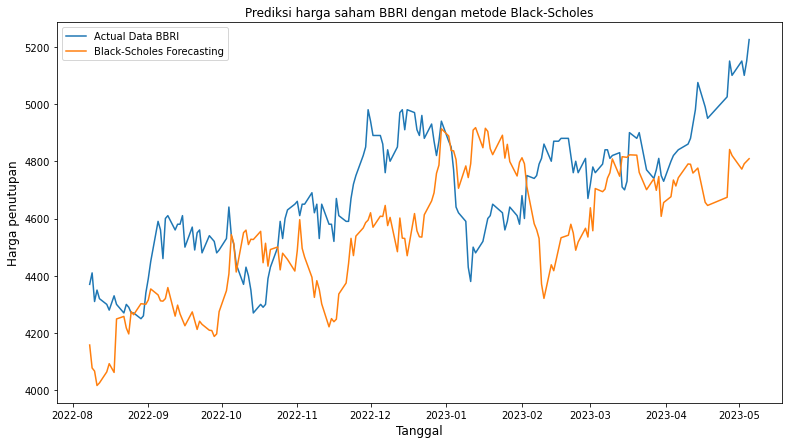

In [194]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bbri, label="Actual Data BBRI")
plt.plot(y_pred_bbri_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham BBRI dengan metode Black-Scholes")
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [195]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bbri = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bbri.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_bbri_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bbri = model_ann_bbri.fit(x=X_train_bbri,
                        y=y_train_bbri,
                        validation_data=(X_val_bbri, y_val_bbri),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 26ms/step - loss: 885.6237 - mae: 885.6237 - val_loss: 108.8589 - val_mae: 108.8589
Epoch 2/100
40/40 [==============================] - 1s 24ms/step - loss: 99.1662 - mae: 99.1662 - val_loss: 99.6790 - val_mae: 99.6790
Epoch 3/100
40/40 [==============================] - 2s 41ms/step - loss: 79.1537 - mae: 79.1537 - val_loss: 89.7831 - val_mae: 89.7831
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 74.7469 - mae: 74.7469 - val_loss: 80.1030 - val_mae: 80.1030
Epoch 5/100
40/40 [==============================] - 1s 24ms/step - loss: 66.0982 - mae: 66.0982 - val_loss: 74.4234 - val_mae: 74.4234
Epoch 6/100
40/40 [==============================] - 0s 8ms/step - loss: 63.8640 - mae: 63.8640 - val_loss: 74.9179 - val_mae: 74.9179
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 59.6528 - mae: 59.6528 - val_loss: 76.0696 - val_mae: 76.0696
Epoch 8/100
40/40 [===========================

Epoch 30/100
40/40 [==============================] - 0s 4ms/step - loss: 57.0540 - mae: 57.0540 - val_loss: 61.4669 - val_mae: 61.4669
Epoch 31/100
40/40 [==============================] - 0s 4ms/step - loss: 54.6939 - mae: 54.6939 - val_loss: 62.2554 - val_mae: 62.2554
Epoch 32/100
40/40 [==============================] - 0s 4ms/step - loss: 52.2706 - mae: 52.2706 - val_loss: 68.8586 - val_mae: 68.8586
Epoch 33/100
40/40 [==============================] - 0s 3ms/step - loss: 58.2867 - mae: 58.2867 - val_loss: 75.0581 - val_mae: 75.0581
Epoch 34/100
40/40 [==============================] - 1s 21ms/step - loss: 57.5495 - mae: 57.5495 - val_loss: 59.4957 - val_mae: 59.4957
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 54.5345 - mae: 54.5345 - val_loss: 60.1405 - val_mae: 60.1405
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 53.9416 - mae: 53.9416 - val_loss: 62.2650 - val_mae: 62.2650
Epoch 37/100
40/40 [===========================

Epoch 80/100
40/40 [==============================] - 0s 3ms/step - loss: 51.1711 - mae: 51.1711 - val_loss: 63.8155 - val_mae: 63.8155
Epoch 81/100
40/40 [==============================] - 0s 3ms/step - loss: 50.7732 - mae: 50.7732 - val_loss: 69.7932 - val_mae: 69.7932
Epoch 82/100
40/40 [==============================] - 0s 3ms/step - loss: 48.9131 - mae: 48.9131 - val_loss: 58.0397 - val_mae: 58.0397
Epoch 83/100
40/40 [==============================] - 1s 24ms/step - loss: 49.7095 - mae: 49.7095 - val_loss: 56.7395 - val_mae: 56.7394
Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 49.0578 - mae: 49.0578 - val_loss: 64.2311 - val_mae: 64.2311
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 50.9209 - mae: 50.9209 - val_loss: 59.6399 - val_mae: 59.6399
Epoch 86/100
40/40 [==============================] - 1s 24ms/step - loss: 47.8168 - mae: 47.8168 - val_loss: 56.5002 - val_mae: 56.5002
Epoch 87/100
40/40 [==========================

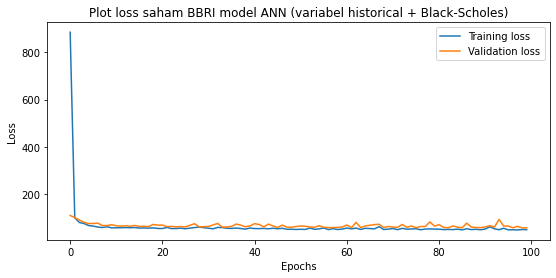

In [196]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bbri.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BBRI model ANN (variabel historical + Black-Scholes)")
plt.show();

In [195]:
# load in saved best peformance
import tensorflow as tf
model_best_bbri_ann = tf.keras.models.load_model("best_bbri_ann")  
model_best_bbri_ann.evaluate(X_test_bbri, y_test_bbri)

6/6 [==============================] - 0s 5ms/step - loss: 50.3574 - mae: 50.3574


[50.357425689697266, 50.357425689697266]

In [196]:
y_pred_ann_bbri = model_best_bbri_ann.predict(X_test_bbri)

6/6 [==============================] - 0s 2ms/step


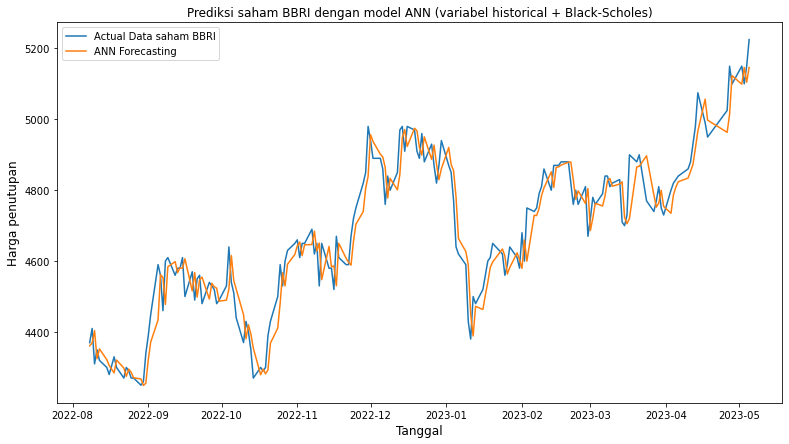

In [197]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bbri, y_test_bbri, label="Actual Data saham BBRI")
plt.plot(timestep_test_bbri, y_pred_ann_bbri, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BBRI dengan model ANN (variabel historical + Black-Scholes)")
plt.legend();

**Model ANN (Variabel historical)**

In [198]:
X_bbri_historical = X_bbri.copy()
X_bbri_historical = X_bbri_historical.drop(["average_black_scholes"], axis=1)

X_bbri_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07   2305.0   2315.0   2295.0
2016-01-08   2250.0   2305.0   2315.0
2016-01-11   2320.0   2250.0   2305.0
2016-01-12   2275.0   2320.0   2250.0
2016-01-13   2320.0   2275.0   2320.0
...             ...      ...      ...
2023-04-28   5150.0   5025.0   4950.0
2023-05-02   5100.0   5150.0   5025.0
2023-05-03   5150.0   5100.0   5150.0
2023-05-04   5100.0   5150.0   5100.0
2023-05-05   5150.0   5100.0   5150.0

[1828 rows x 3 columns]

In [199]:
# make train, validation, test
train_size = int(len(X_bbri) * 0.7)
validation_size = int(len(X_bbri) * 0.2)

X_train_bbri_historical, y_train_bbri_historical = X_bbri_historical[:train_size], y_bbri[:train_size]
X_val_bbri_historical, y_val_bbri_historical = X_bbri_historical[train_size : train_size+validation_size], y_bbri[train_size : train_size+validation_size]
X_test_bbri_historical, y_test_bbri_historical = X_bbri_historical[train_size+validation_size:], y_bbri[train_size+validation_size:]

In [202]:
tf.keras.utils.set_random_seed(42)


model_ann_bbri_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bbri_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\bbri_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bbri_historical = model_ann_bbri_historical.fit(x=X_train_bbri_historical,
                        y=y_train_bbri_historical,
                        validation_data=(X_val_bbri_historical, y_val_bbri_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 20ms/step - loss: 948.6920 - mae: 948.6920 - val_loss: 113.9356 - val_mae: 113.9356
Epoch 2/100
40/40 [==============================] - 1s 25ms/step - loss: 69.1182 - mae: 69.1182 - val_loss: 81.1354 - val_mae: 81.1354
Epoch 3/100
40/40 [==============================] - 1s 22ms/step - loss: 58.8463 - mae: 58.8463 - val_loss: 65.3385 - val_mae: 65.3385
Epoch 4/100
40/40 [==============================] - 1s 21ms/step - loss: 56.0558 - mae: 56.0558 - val_loss: 64.6436 - val_mae: 64.6436
Epoch 5/100
40/40 [==============================] - 0s 3ms/step - loss: 55.4664 - mae: 55.4664 - val_loss: 66.6114 - val_mae: 66.6114
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 55.9766 - mae: 55.9766 - val_loss: 68.1631 - val_mae: 68.1631
Epoch 7/100
40/40 [==============================] - 1s 30ms/step - loss: 54.6761 - mae: 54.6761 - val_loss: 63.3302 - val_mae: 63.3302
Epoch 8/100
40/40 [===========================

40/40 [==============================] - 1s 21ms/step - loss: 50.9124 - mae: 50.9124 - val_loss: 57.2213 - val_mae: 57.2213
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 52.0262 - mae: 52.0262 - val_loss: 65.4470 - val_mae: 65.4470
Epoch 38/100
40/40 [==============================] - 0s 3ms/step - loss: 50.0522 - mae: 50.0522 - val_loss: 61.2216 - val_mae: 61.2216
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 49.1277 - mae: 49.1277 - val_loss: 60.2454 - val_mae: 60.2454
Epoch 40/100
40/40 [==============================] - 1s 25ms/step - loss: 58.3092 - mae: 58.3092 - val_loss: 56.9664 - val_mae: 56.9664
Epoch 41/100
40/40 [==============================] - 0s 5ms/step - loss: 49.8851 - mae: 49.8851 - val_loss: 61.3367 - val_mae: 61.3367
Epoch 42/100
40/40 [==============================] - 0s 3ms/step - loss: 53.6714 - mae: 53.6714 - val_loss: 68.9174 - val_mae: 68.9174
Epoch 43/100
40/40 [==============================] - 0s 6m

Epoch 78/100
40/40 [==============================] - 0s 4ms/step - loss: 48.1849 - mae: 48.1849 - val_loss: 57.1638 - val_mae: 57.1638
Epoch 79/100
40/40 [==============================] - 0s 4ms/step - loss: 48.2596 - mae: 48.2596 - val_loss: 57.7974 - val_mae: 57.7974
Epoch 80/100
40/40 [==============================] - 0s 4ms/step - loss: 47.4156 - mae: 47.4156 - val_loss: 66.5649 - val_mae: 66.5649
Epoch 81/100
40/40 [==============================] - 0s 4ms/step - loss: 48.3376 - mae: 48.3376 - val_loss: 63.4220 - val_mae: 63.4220
Epoch 82/100
40/40 [==============================] - 0s 3ms/step - loss: 48.8012 - mae: 48.8012 - val_loss: 56.6286 - val_mae: 56.6286
Epoch 83/100
40/40 [==============================] - 0s 4ms/step - loss: 49.6769 - mae: 49.6769 - val_loss: 57.0926 - val_mae: 57.0926
Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 50.1186 - mae: 50.1186 - val_loss: 59.8648 - val_mae: 59.8648
Epoch 85/100
40/40 [============================

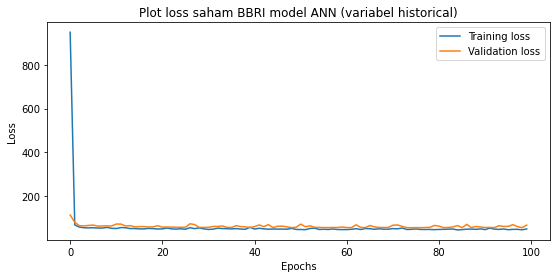

In [203]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bbri_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BBRI model ANN (variabel historical)");

In [200]:
# load in saved best peformance
import tensorflow as tf
model_best_bbri_ann_historical = tf.keras.models.load_model("bbri_ann_histo")  
model_best_bbri_ann_historical.evaluate(X_test_bbri_historical, y_test_bbri_historical)

6/6 [==============================] - 0s 2ms/step - loss: 50.7327 - mae: 50.7327


[50.7326545715332, 50.7326545715332]

In [201]:
y_pred_ann_bbri_historical = model_best_bbri_ann_historical.predict(X_test_bbri_historical)

6/6 [==============================] - 0s 1ms/step


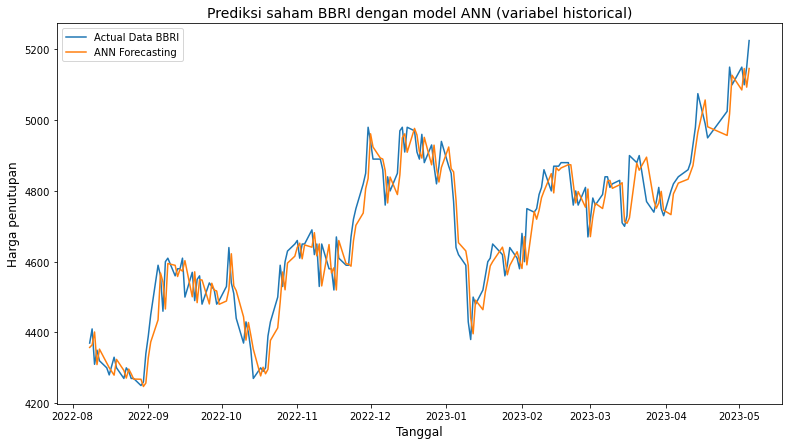

In [202]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bbri, y_test_bbri_historical, label="Actual Data BBRI")
plt.plot(timestep_test_bbri, y_pred_ann_bbri_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BBRI dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

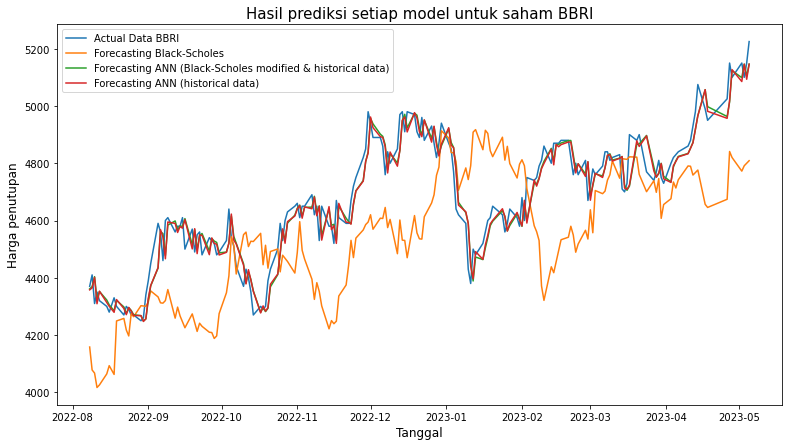

In [203]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bbri, label="Actual Data BBRI")
plt.plot(y_pred_bbri_black_scholes, label="Forecasting Black-Scholes")
plt.plot(timestep_test_bbri, y_pred_ann_bbri, label="Forecasting ANN (Black-Scholes modified & historical data)")
plt.plot(timestep_test_bbri, y_pred_ann_bbri_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham BBRI", fontsize=15)
plt.legend();

### BMRI

In [204]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bmri_saham[f"Close+{i+1}"] = bmri_saham["Close"].shift(periods=i+1)
bmri_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                 
2016-01-04  2312.50            2208.711849      NaN      NaN      NaN
2016-01-05  2343.75            2208.214233  2312.50      NaN      NaN
2016-01-06  2337.50            2182.910924  2343.75  2312.50      NaN
2016-01-07  2275.00            2170.019012  2337.50  2343.75  2312.50
2016-01-08  2318.75            2256.311319  2275.00  2337.50  2343.75
2016-01-11  2275.00            2231.013936  2318.75  2275.00  2337.50
2016-01-12  2300.00            2230.511297  2275.00  2318.75  2275.00
2016-01-13  2337.50            2199.036427  2300.00  2275.00  2318.75
2016-01-14  2337.50            2167.575626  2337.50  2300.00  2275.00
2016-01-15  2318.75            2136.128890  2337.50  2337.50  2300.00

In [205]:
timesteps = bmri_saham.dropna().index.to_numpy()
close = bmri_saham.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([2275.  , 2318.75, 2275.  , 2300.  , 2337.5 , 2337.5 , 2318.75,
        2318.75, 2343.75, 2331.25]))

In [206]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

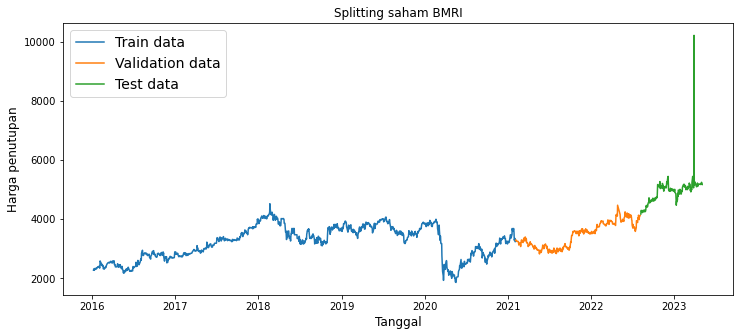

In [207]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting saham BMRI")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [208]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_bmri = bmri_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_bmri = bmri_saham.dropna()["Close"].astype(np.float32)
X_bmri.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            2170.019043  2337.50  2343.75  2312.50
2016-01-08            2256.311279  2275.00  2337.50  2343.75
2016-01-11            2231.013916  2318.75  2275.00  2337.50
2016-01-12            2230.511230  2275.00  2318.75  2275.00
2016-01-13            2199.036377  2300.00  2275.00  2318.75

In [209]:
# make train, validation, test
train_size = int(len(X_bmri) * 0.7)
validation_size = int(len(X_bmri) * 0.2)

X_train_bmri, y_train_bmri = X_bmri[:train_size], y_bmri[:train_size]
X_val_bmri, y_val_bmri = X_bmri[train_size : train_size+validation_size], y_bmri[train_size : train_size+validation_size]
X_test_bmri, y_test_bmri = X_bmri[train_size+validation_size:], y_bmri[train_size+validation_size:]

**Hasil prediksi saham dengan Black-Scholes**

In [210]:
y_pred_bmri_black_scholes = X_test_bmri.copy()
y_pred_bmri_black_scholes = X_test_bmri.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_bmri_black_scholes

average_black_scholes
Date                             
2022-08-08            3700.775391
2022-08-09            3699.934814
2022-08-10            3674.351318
2022-08-11            3599.304199
2022-08-12            3598.486816
...                           ...
2023-04-28            4942.681152
2023-05-02            5219.914551
2023-05-03            5156.744141
2023-05-04            5180.354004
2023-05-05            5129.611328

[184 rows x 1 columns]

In [211]:
timestep_test_bmri = X_test_bmri.index.to_numpy()
timestep_test_bmri

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_pred_bmri_black_scholes, y_test_bmri)

286.25702

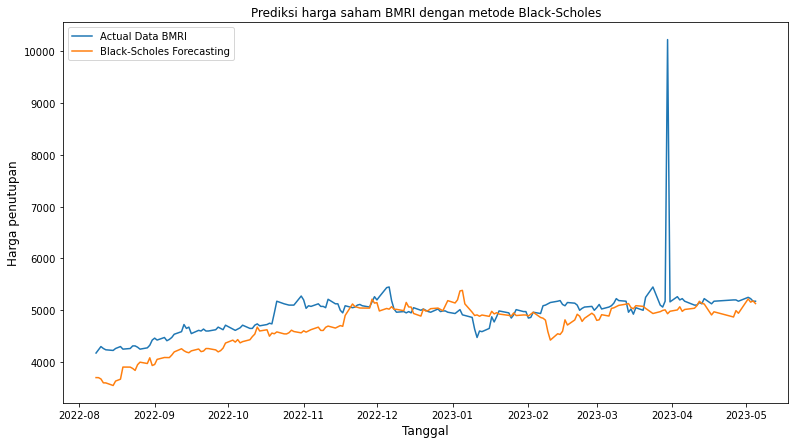

In [213]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bmri, label="Actual Data BMRI")
plt.plot(y_pred_bmri_black_scholes, label="Black-Scholes Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi harga saham BMRI dengan metode Black-Scholes")
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [215]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bmri = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bmri.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_bmri_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bmri = model_ann_bmri.fit(x=X_train_bmri,
                        y=y_train_bmri,
                        validation_data=(X_val_bmri, y_val_bmri),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
41/41 [==============================] - 1s 20ms/step - loss: 841.9493 - mae: 841.9493 - val_loss: 91.9414 - val_mae: 91.9414
Epoch 2/100
41/41 [==============================] - 1s 20ms/step - loss: 82.9248 - mae: 82.9248 - val_loss: 83.0949 - val_mae: 83.0949
Epoch 3/100
41/41 [==============================] - 1s 20ms/step - loss: 77.8037 - mae: 77.8037 - val_loss: 66.5758 - val_mae: 66.5758
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 69.9435 - mae: 69.9435 - val_loss: 102.7375 - val_mae: 102.7375
Epoch 5/100
41/41 [==============================] - 0s 7ms/step - loss: 72.0615 - mae: 72.0615 - val_loss: 67.6314 - val_mae: 67.6314
Epoch 6/100
41/41 [==============================] - 1s 22ms/step - loss: 61.4170 - mae: 61.4170 - val_loss: 55.0304 - val_mae: 55.0304
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 59.7360 - mae: 59.7360 - val_loss: 70.6523 - val_mae: 70.6523
Epoch 8/100
41/41 [============================

Epoch 96/100
41/41 [==============================] - 0s 4ms/step - loss: 52.3682 - mae: 52.3682 - val_loss: 51.9617 - val_mae: 51.9617
Epoch 97/100
41/41 [==============================] - 0s 4ms/step - loss: 52.3024 - mae: 52.3024 - val_loss: 46.8397 - val_mae: 46.8397
Epoch 98/100
41/41 [==============================] - 0s 4ms/step - loss: 49.9859 - mae: 49.9859 - val_loss: 55.8775 - val_mae: 55.8775
Epoch 99/100
41/41 [==============================] - 1s 25ms/step - loss: 52.8770 - mae: 52.8770 - val_loss: 46.3174 - val_mae: 46.3174
Epoch 100/100
41/41 [==============================] - 0s 4ms/step - loss: 47.4493 - mae: 47.4493 - val_loss: 55.2834 - val_mae: 55.2834


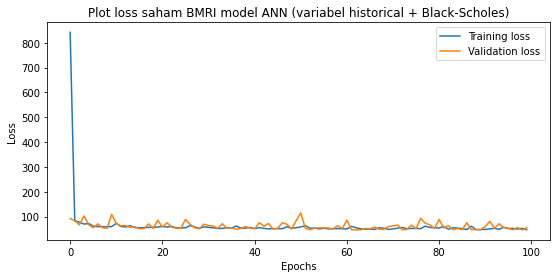

In [216]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bmri.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BMRI model ANN (variabel historical + Black-Scholes)")
plt.show();

In [214]:
# load in saved best peformance
import tensorflow as tf
model_best_bmri_ann = tf.keras.models.load_model("best_bmri_ann")  
model_best_bmri_ann.evaluate(X_test_bmri, y_test_bmri)

6/6 [==============================] - 0s 4ms/step - loss: 102.4110 - mae: 102.4110


[102.41102600097656, 102.41102600097656]

In [215]:
y_pred_ann_bmri = model_best_bmri_ann.predict(X_test_bmri)

6/6 [==============================] - 0s 2ms/step


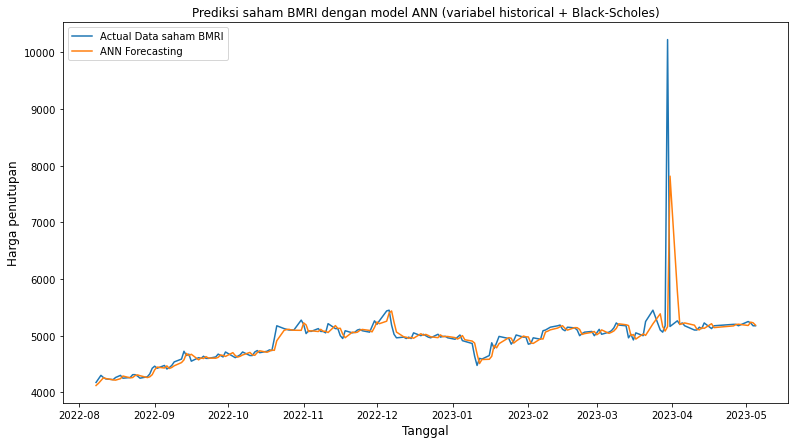

In [216]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bmri, y_test_bmri, label="Actual Data saham BMRI")
plt.plot(timestep_test_bmri, y_pred_ann_bmri, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BMRI dengan model ANN (variabel historical + Black-Scholes)")
plt.legend();

**Model ANN (Variabel historical)**

In [217]:
X_bmri_historical = X_bmri.copy()
X_bmri_historical = X_bmri_historical.drop(["average_black_scholes"], axis=1)

X_bmri_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07  2337.50  2343.75  2312.50
2016-01-08  2275.00  2337.50  2343.75
2016-01-11  2318.75  2275.00  2337.50
2016-01-12  2275.00  2318.75  2275.00
2016-01-13  2300.00  2275.00  2318.75
...             ...      ...      ...
2023-04-28  5200.00  5200.00  5175.00
2023-05-02  5175.00  5200.00  5200.00
2023-05-03  5250.00  5175.00  5200.00
2023-05-04  5225.00  5250.00  5175.00
2023-05-05  5175.00  5225.00  5250.00

[1831 rows x 3 columns]

In [218]:
# make train, validation, test
train_size = int(len(X_bmri) * 0.7)
validation_size = int(len(X_bmri) * 0.2)

X_train_bmri_historical, y_train_bmri_historical = X_bmri_historical[:train_size], y_bmri[:train_size]
X_val_bmri_historical, y_val_bmri_historical = X_bmri_historical[train_size : train_size+validation_size], y_bmri[train_size : train_size+validation_size]
X_test_bmri_historical, y_test_bmri_historical = X_bmri_historical[train_size+validation_size:], y_bmri[train_size+validation_size:]

In [222]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bmri_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bmri_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\bmri_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bmri_historical = model_ann_bmri_historical.fit(x=X_train_bmri_historical,
                        y=y_train_bmri_historical,
                        validation_data=(X_val_bmri_historical, y_val_bmri_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
41/41 [==============================] - 2s 30ms/step - loss: 917.9746 - mae: 917.9746 - val_loss: 55.0421 - val_mae: 55.0421
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 75.4189 - mae: 75.4189 - val_loss: 55.2864 - val_mae: 55.2864
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 57.6176 - mae: 57.6176 - val_loss: 56.3073 - val_mae: 56.3073
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 56.7840 - mae: 56.7840 - val_loss: 65.9447 - val_mae: 65.9447
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 62.1928 - mae: 62.1928 - val_loss: 64.6374 - val_mae: 64.6374
Epoch 6/100
41/41 [==============================] - 1s 23ms/step - loss: 58.9442 - mae: 58.9442 - val_loss: 50.7640 - val_mae: 50.7640
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 54.3055 - mae: 54.3055 - val_loss: 54.3783 - val_mae: 54.3783
Epoch 8/100
41/41 [==============================] 

Epoch 90/100
41/41 [==============================] - 0s 4ms/step - loss: 47.7060 - mae: 47.7060 - val_loss: 50.2992 - val_mae: 50.2992
Epoch 91/100
41/41 [==============================] - 0s 4ms/step - loss: 47.7117 - mae: 47.7117 - val_loss: 59.3599 - val_mae: 59.3599
Epoch 92/100
41/41 [==============================] - 0s 4ms/step - loss: 50.4802 - mae: 50.4802 - val_loss: 52.4252 - val_mae: 52.4252
Epoch 93/100
41/41 [==============================] - 0s 3ms/step - loss: 49.5817 - mae: 49.5817 - val_loss: 64.0498 - val_mae: 64.0498
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 48.5148 - mae: 48.5148 - val_loss: 68.7114 - val_mae: 68.7114
Epoch 95/100
41/41 [==============================] - 0s 4ms/step - loss: 55.7594 - mae: 55.7594 - val_loss: 48.0099 - val_mae: 48.0099
Epoch 96/100
41/41 [==============================] - 0s 4ms/step - loss: 48.5787 - mae: 48.5787 - val_loss: 50.6509 - val_mae: 50.6509
Epoch 97/100
41/41 [============================

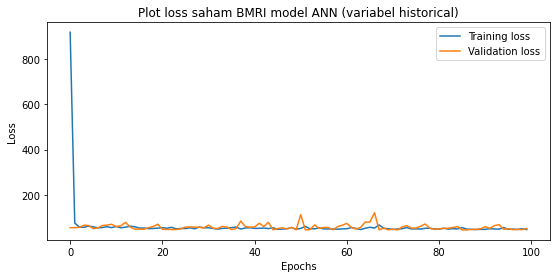

In [223]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bmri_historical.history).rename(columns={"loss":"Training loss",
                                                       "val_loss": "Validation loss"})[["Training loss","Validation loss"]].plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Plot loss saham BMRI model ANN (variabel historical)");

In [219]:
# load in saved best peformance
import tensorflow as tf
model_best_bmri_ann_historical = tf.keras.models.load_model("bmri_ann_histo")  
model_best_bmri_ann_historical.evaluate(X_test_bmri_historical, y_test_bmri_historical)

6/6 [==============================] - 0s 2ms/step - loss: 111.8685 - mae: 111.8685


[111.8685073852539, 111.8685073852539]

In [220]:
y_pred_ann_bmri_historical = model_best_bmri_ann_historical.predict(X_test_bmri_historical)

6/6 [==============================] - 0s 2ms/step


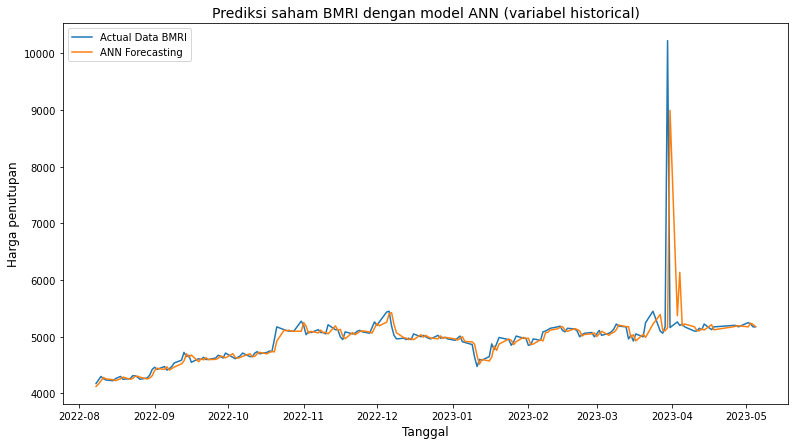

In [221]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bmri, y_test_bmri_historical, label="Actual Data BMRI")
plt.plot(timestep_test_bmri, y_pred_ann_bmri_historical, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi saham BMRI dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

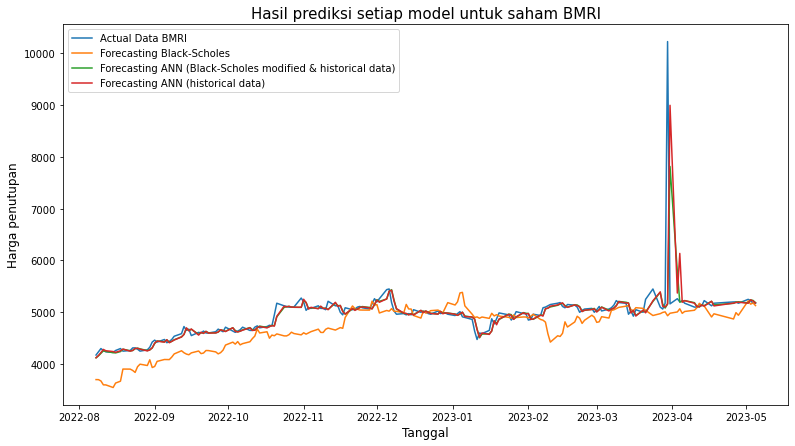

In [222]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bmri, label="Actual Data BMRI")
plt.plot(y_pred_bmri_black_scholes, label="Forecasting Black-Scholes")
plt.plot(timestep_test_bmri, y_pred_ann_bmri, label="Forecasting ANN (Black-Scholes modified & historical data)")
plt.plot(timestep_test_bmri, y_pred_ann_bmri_historical, label="Forecasting ANN (historical data)")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Hasil prediksi setiap model untuk saham BMRI", fontsize=15)
plt.legend();

### MEGA

In [228]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    mega_saham[f"Close+{i+1}"] = mega_saham["Close"].shift(periods=i+1)
mega_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                
2016-01-04  3275.0            3027.772584      NaN      NaN      NaN
2016-01-05  3275.0            2977.492126   3275.0      NaN      NaN
2016-01-06  3275.0            2976.847424   3275.0   3275.0      NaN
2016-01-07  3100.0            2762.908324   3275.0   3275.0   3275.0
2016-01-08  3000.0            2762.310087   3100.0   3275.0   3275.0
2016-01-11  3000.0            2761.711980   3000.0   3100.0   3275.0
2016-01-12  2930.0            2761.114004   3000.0   3000.0   3100.0
2016-01-13  2930.0            2973.626023   2930.0   3000.0   3000.0
2016-01-14  2930.0            2972.982164   2930.0   2930.0   3000.0
2016-01-15  2930.0            3071.416393   2930.0   2930.0   2930.0

In [229]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_mega = mega_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_mega = mega_saham.dropna()["Close"].astype(np.float32)
X_mega.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            2762.908203   3275.0   3275.0   3275.0
2016-01-08            2762.310059   3100.0   3275.0   3275.0
2016-01-11            2761.711914   3000.0   3100.0   3275.0
2016-01-12            2761.114014   3000.0   3000.0   3100.0
2016-01-13            2973.625977   2930.0   3000.0   3000.0

In [230]:
# make train, validation, test
train_size = int(len(X_mega) * 0.7)
validation_size = int(len(X_mega) * 0.2)

X_train_mega, y_train_mega = X_mega[:train_size], y_mega[:train_size]
X_val_mega, y_val_mega = X_mega[train_size : train_size+validation_size], y_mega[train_size : train_size+validation_size]
X_test_mega, y_test_mega = X_mega[train_size+validation_size:], y_mega[train_size+validation_size:]

**Hasil prediksi saham dengan Black-Scholes**

In [231]:
y_pred_mega_black_scholes = X_test_mega.copy()
y_pred_mega_black_scholes = X_test_mega.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_mega_black_scholes

average_black_scholes
Date                             
2022-08-08            4753.165527
2022-08-09            4791.729004
2022-08-10            4879.766113
2022-08-11            4878.700684
2022-08-12            4749.016602
...                           ...
2023-04-27            5099.728027
2023-04-28            4975.477539
2023-05-02            5006.408691
2023-05-03            4980.532715
2023-05-04            5004.214355

[183 rows x 1 columns]

In [232]:
timestep_test_mega = X_test_mega.index.to_numpy()
timestep_test_mega

array(['2022-08-08T00:00:00.000000000', '2022-08-09T00:00:00.000000000',
       '2022-08-10T00:00:00.000000000', '2022-08-11T00:00:00.000000000',
       '2022-08-12T00:00:00.000000000', '2022-08-15T00:00:00.000000000',
       '2022-08-16T00:00:00.000000000', '2022-08-18T00:00:00.000000000',
       '2022-08-19T00:00:00.000000000', '2022-08-22T00:00:00.000000000',
       '2022-08-23T00:00:00.000000000', '2022-08-24T00:00:00.000000000',
       '2022-08-25T00:00:00.000000000', '2022-08-26T00:00:00.000000000',
       '2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15

In [233]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_pred_mega_black_scholes, y_test_mega)

235.15321

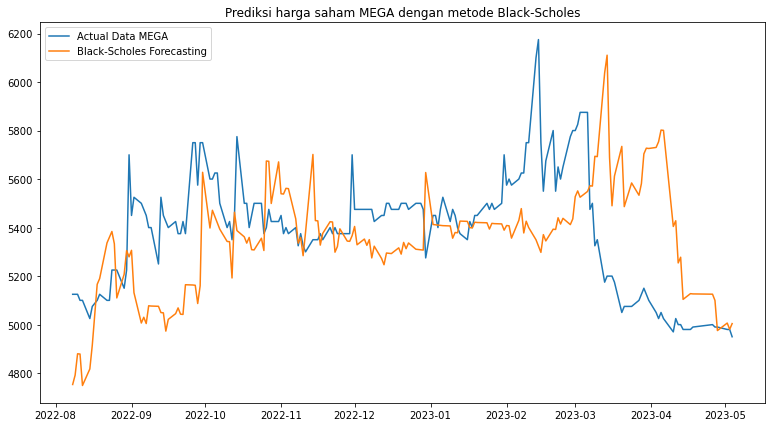

In [234]:
plt.figure(figsize=(13,7))
plt.plot(y_test_mega, label="Actual Data MEGA")
plt.plot(y_pred_mega_black_scholes, label="Black-Scholes Forecasting")
plt.title("Prediksi harga saham MEGA dengan metode Black-Scholes")
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [235]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_mega = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_mega.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_mega_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_mega = model_ann_mega.fit(x=X_train_mega,
                        y=y_train_mega,
                        validation_data=(X_val_mega, y_val_mega),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
41/41 [==============================] - 2s 31ms/step - loss: 1200.5721 - mae: 1200.5721 - val_loss: 315.5145 - val_mae: 315.5145
Epoch 2/100
41/41 [==============================] - 1s 22ms/step - loss: 163.1928 - mae: 163.1928 - val_loss: 237.0076 - val_mae: 237.0076
Epoch 3/100
41/41 [==============================] - 1s 29ms/step - loss: 123.1654 - mae: 123.1654 - val_loss: 193.9997 - val_mae: 193.9997
Epoch 4/100
41/41 [==============================] - 0s 4ms/step - loss: 110.3653 - mae: 110.3653 - val_loss: 268.3816 - val_mae: 268.3816
Epoch 5/100
41/41 [==============================] - 1s 24ms/step - loss: 110.5144 - mae: 110.5144 - val_loss: 188.1951 - val_mae: 188.1951
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 108.7388 - mae: 108.7388 - val_loss: 201.0928 - val_mae: 201.0928
Epoch 7/100
41/41 [==============================] - 1s 21ms/step - loss: 101.4396 - mae: 101.4396 - val_loss: 148.3715 - val_mae: 148.3715
Epoch 8/100
41/41 [=

41/41 [==============================] - 0s 4ms/step - loss: 78.9608 - mae: 78.9608 - val_loss: 119.4353 - val_mae: 119.4353
Epoch 91/100
41/41 [==============================] - 0s 3ms/step - loss: 69.3060 - mae: 69.3060 - val_loss: 121.0616 - val_mae: 121.0616
Epoch 92/100
41/41 [==============================] - 0s 4ms/step - loss: 78.2344 - mae: 78.2344 - val_loss: 118.5267 - val_mae: 118.5267
Epoch 93/100
41/41 [==============================] - 0s 4ms/step - loss: 71.0838 - mae: 71.0838 - val_loss: 173.8344 - val_mae: 173.8344
Epoch 94/100
41/41 [==============================] - 0s 3ms/step - loss: 92.0703 - mae: 92.0703 - val_loss: 145.9441 - val_mae: 145.9441
Epoch 95/100
41/41 [==============================] - 0s 3ms/step - loss: 75.6024 - mae: 75.6024 - val_loss: 119.7124 - val_mae: 119.7124
Epoch 96/100
41/41 [==============================] - 0s 4ms/step - loss: 70.4832 - mae: 70.4832 - val_loss: 155.6976 - val_mae: 155.6976
Epoch 97/100
41/41 [===========================

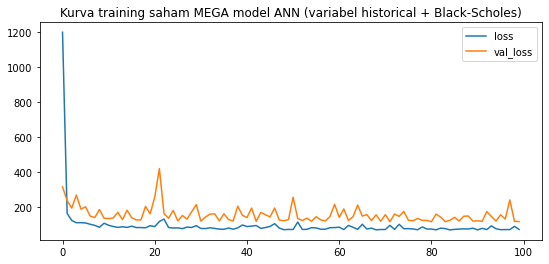

In [236]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_mega.history)[["loss","val_loss"]].plot()
plt.title("Kurva training saham MEGA model ANN (variabel historical + Black-Scholes)")
plt.show();

In [237]:
# load in saved best peformance
import tensorflow as tf
model_best_mega_ann = tf.keras.models.load_model("best_mega_ann")  
model_best_mega_ann.evaluate(X_test_mega, y_test_mega)

6/6 [==============================] - 0s 5ms/step - loss: 61.0229 - mae: 61.0229


[61.02286148071289, 61.02286148071289]

In [238]:
y_pred_ann_mega = model_best_mega_ann.predict(X_test_mega)

6/6 [==============================] - 0s 2ms/step


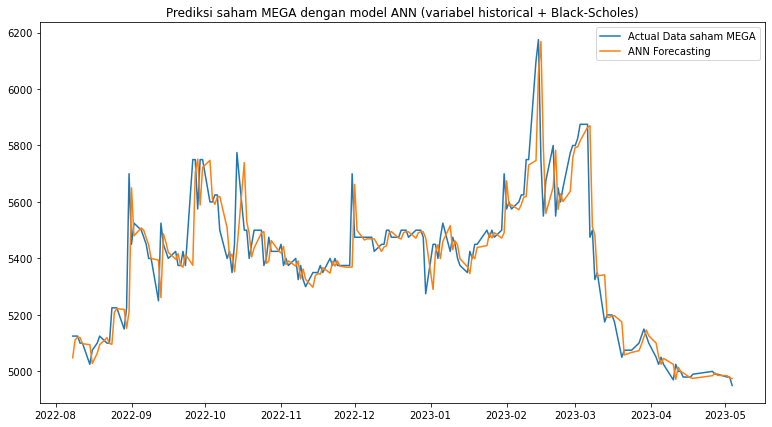

In [239]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_mega, y_test_mega, label="Actual Data saham MEGA")
plt.plot(timestep_test_mega, y_pred_ann_mega, label="ANN Forecasting")
plt.title("Prediksi saham MEGA dengan model ANN (variabel historical + Black-Scholes)")
plt.legend();

**Model ANN (Variabel historical)**

In [240]:
X_mega_historical = X_mega.copy()
X_mega_historical = X_mega_historical.drop(["average_black_scholes"], axis=1)

X_mega_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07   3275.0   3275.0   3275.0
2016-01-08   3100.0   3275.0   3275.0
2016-01-11   3000.0   3100.0   3275.0
2016-01-12   3000.0   3000.0   3100.0
2016-01-13   2930.0   3000.0   3000.0
...             ...      ...      ...
2023-04-27   5000.0   4990.0   4980.0
2023-04-28   4990.0   5000.0   4990.0
2023-05-02   4990.0   4990.0   5000.0
2023-05-03   4980.0   4990.0   4990.0
2023-05-04   4980.0   4980.0   4990.0

[1830 rows x 3 columns]

In [241]:
# make train, validation, test
train_size = int(len(X_mega) * 0.7)
validation_size = int(len(X_mega) * 0.2)

X_train_mega_historical, y_train_mega_historical = X_mega_historical[:train_size], y_mega[:train_size]
X_val_mega_historical, y_val_mega_historical = X_mega_historical[train_size : train_size+validation_size], y_mega[train_size : train_size+validation_size]
X_test_mega_historical, y_test_mega_historical = X_mega_historical[train_size+validation_size:], y_mega[train_size+validation_size:]

In [242]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_mega_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_mega_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\mega_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_mega_historical = model_ann_mega_historical.fit(x=X_train_mega_historical,
                        y=y_train_mega_historical,
                        validation_data=(X_val_mega_historical, y_val_mega_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
41/41 [==============================] - 2s 34ms/step - loss: 1310.6573 - mae: 1310.6573 - val_loss: 178.5673 - val_mae: 178.5673
Epoch 2/100
41/41 [==============================] - 0s 5ms/step - loss: 109.5619 - mae: 109.5619 - val_loss: 231.3611 - val_mae: 231.3611
Epoch 3/100
41/41 [==============================] - 1s 37ms/step - loss: 104.8184 - mae: 104.8184 - val_loss: 140.4833 - val_mae: 140.4833
Epoch 4/100
41/41 [==============================] - 0s 5ms/step - loss: 101.2190 - mae: 101.2190 - val_loss: 212.1722 - val_mae: 212.1722
Epoch 5/100
41/41 [==============================] - 1s 22ms/step - loss: 99.9784 - mae: 99.9784 - val_loss: 137.0911 - val_mae: 137.0911
Epoch 6/100
41/41 [==============================] - 0s 5ms/step - loss: 94.2371 - mae: 94.2371 - val_loss: 154.5664 - val_mae: 154.5664
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 94.1340 - mae: 94.1340 - val_loss: 189.7101 - val_mae: 189.7101
Epoch 8/100
41/41 [=========

41/41 [==============================] - 0s 4ms/step - loss: 73.7042 - mae: 73.7042 - val_loss: 116.7400 - val_mae: 116.7400
Epoch 97/100
41/41 [==============================] - 0s 4ms/step - loss: 81.6626 - mae: 81.6626 - val_loss: 115.1143 - val_mae: 115.1143
Epoch 98/100
41/41 [==============================] - 0s 4ms/step - loss: 78.0891 - mae: 78.0891 - val_loss: 144.4951 - val_mae: 144.4951
Epoch 99/100
41/41 [==============================] - 0s 4ms/step - loss: 80.7280 - mae: 80.7280 - val_loss: 137.0909 - val_mae: 137.0909
Epoch 100/100
41/41 [==============================] - 0s 4ms/step - loss: 76.5636 - mae: 76.5636 - val_loss: 115.4469 - val_mae: 115.4469


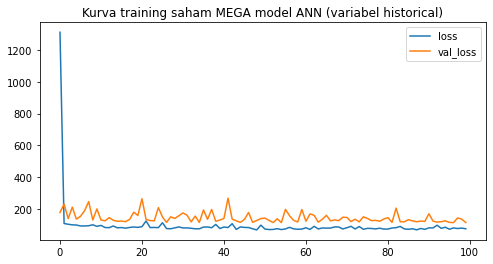

In [243]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [8, 4]
pd.DataFrame(history_ann_mega_historical.history)[["loss","val_loss"]].plot()
plt.title("Kurva training saham MEGA model ANN (variabel historical)");

In [244]:
# load in saved best peformance
import tensorflow as tf
model_best_mega_ann_historical = tf.keras.models.load_model("mega_ann_histo")  
model_best_mega_ann_historical.evaluate(X_test_mega_historical, y_test_mega_historical)

6/6 [==============================] - 0s 2ms/step - loss: 62.2451 - mae: 62.2451


[62.24509048461914, 62.24509048461914]

In [245]:
y_pred_ann_mega_historical = model_best_mega_ann_historical.predict(X_test_mega_historical)

6/6 [==============================] - 0s 2ms/step


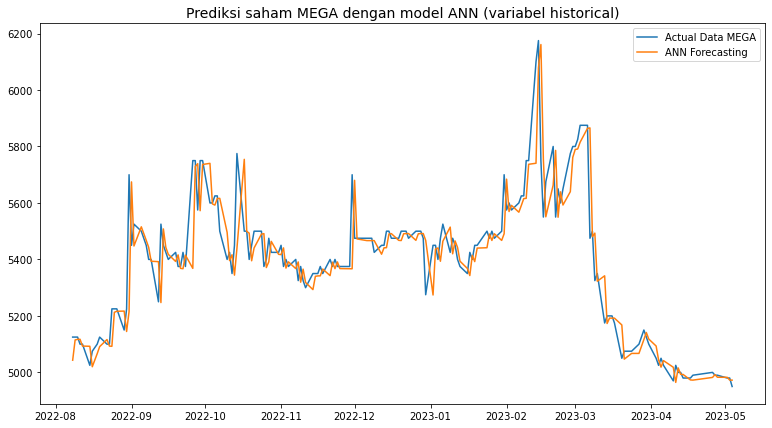

In [246]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_mega, y_test_mega_historical, label="Actual Data MEGA")
plt.plot(timestep_test_mega, y_pred_ann_mega_historical, label="ANN Forecasting")
plt.title("Prediksi saham MEGA dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

### BDMN

In [247]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    bdmn_saham[f"Close+{i+1}"] = bdmn_saham["Close"].shift(periods=i+1)
bdmn_saham.head(10)

Close  average_black_scholes  Close+1  Close+2  Close+3
Date                                                                
2016-01-04  3150.0            3092.899948      NaN      NaN      NaN
2016-01-05  3110.0            2953.062617   3150.0      NaN      NaN
2016-01-06  3250.0            2987.248884   3110.0   3150.0      NaN
2016-01-07  3000.0            2981.665436   3250.0   3110.0   3150.0
2016-01-08  3045.0            3095.326263   3000.0   3250.0   3110.0
2016-01-11  2900.0            2851.287461   3045.0   3000.0   3250.0
2016-01-12  2970.0            2850.701408   2900.0   3045.0   3000.0
2016-01-13  3080.0            2899.769058   2970.0   2900.0   3045.0
2016-01-14  3200.0            2894.208709   3080.0   2970.0   2900.0
2016-01-15  3110.0            2769.530915   3200.0   3080.0   2970.0

In [248]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_bdmn = bdmn_saham.dropna().drop("Close", axis=1).astype(np.float32) 
y_bdmn = bdmn_saham.dropna()["Close"].astype(np.float32)
X_bdmn.head()

average_black_scholes  Close+1  Close+2  Close+3
Date                                                        
2016-01-07            2981.665527   3250.0   3110.0   3150.0
2016-01-08            3095.326172   3000.0   3250.0   3110.0
2016-01-11            2851.287354   3045.0   3000.0   3250.0
2016-01-12            2850.701416   2900.0   3045.0   3000.0
2016-01-13            2899.769043   2970.0   2900.0   3045.0

In [249]:
# make train, validation, test
train_size = int(len(X_bdmn) * 0.7)
validation_size = int(len(X_bdmn) * 0.2)

X_train_bdmn, y_train_bdmn = X_bdmn[:train_size], y_bdmn[:train_size]
X_val_bdmn, y_val_bdmn = X_bdmn[train_size : train_size+validation_size], y_bdmn[train_size : train_size+validation_size]
X_test_bdmn, y_test_bdmn = X_bdmn[train_size+validation_size:], y_bdmn[train_size+validation_size:]

**Hasil prediksi saham dengan Black-Scholes**

In [250]:
y_pred_bdmn_black_scholes = X_test_bdmn.copy()
y_pred_bdmn_black_scholes = X_test_bdmn.drop(["Close+1", "Close+2", "Close+3"], axis=1)

y_pred_bdmn_black_scholes

average_black_scholes
Date                             
2022-08-05            2330.878174
2022-08-08            2330.395264
2022-08-09            2329.912598
2022-08-10            2369.079590
2022-08-11            2368.588867
...                           ...
2023-04-27            2680.558350
2023-04-28            2689.901611
2023-05-02            2846.800293
2023-05-03            2915.627930
2023-05-04            2915.021484

[184 rows x 1 columns]

In [251]:
timestep_test_bdmn = X_test_bdmn.index.to_numpy()
timestep_test_bdmn

array(['2022-08-05T00:00:00.000000000', '2022-08-08T00:00:00.000000000',
       '2022-08-09T00:00:00.000000000', '2022-08-10T00:00:00.000000000',
       '2022-08-11T00:00:00.000000000', '2022-08-12T00:00:00.000000000',
       '2022-08-15T00:00:00.000000000', '2022-08-16T00:00:00.000000000',
       '2022-08-18T00:00:00.000000000', '2022-08-19T00:00:00.000000000',
       '2022-08-22T00:00:00.000000000', '2022-08-23T00:00:00.000000000',
       '2022-08-24T00:00:00.000000000', '2022-08-25T00:00:00.000000000',
       '2022-08-26T00:00:00.000000000', '2022-08-29T00:00:00.000000000',
       '2022-08-30T00:00:00.000000000', '2022-08-31T00:00:00.000000000',
       '2022-09-01T00:00:00.000000000', '2022-09-02T00:00:00.000000000',
       '2022-09-05T00:00:00.000000000', '2022-09-06T00:00:00.000000000',
       '2022-09-07T00:00:00.000000000', '2022-09-08T00:00:00.000000000',
       '2022-09-09T00:00:00.000000000', '2022-09-12T00:00:00.000000000',
       '2022-09-13T00:00:00.000000000', '2022-09-14

In [252]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(y_pred_bdmn_black_scholes, y_test_bdmn)

218.8874

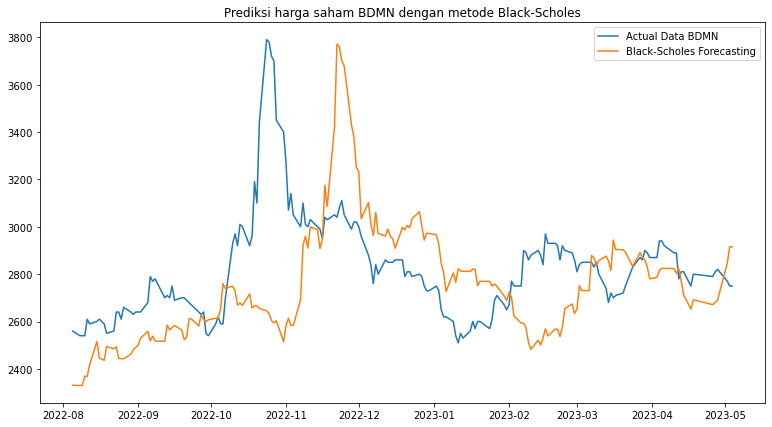

In [253]:
plt.figure(figsize=(13,7))
plt.plot(y_test_bdmn, label="Actual Data BDMN")
plt.plot(y_pred_bdmn_black_scholes, label="Black-Scholes Forecasting")
plt.title("Prediksi harga saham BDMN dengan metode Black-Scholes")
plt.legend();

**Model ANN (Variabel historical + Black-Scholes)**

In [254]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bdmn = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bdmn.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_bdmn_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bdmn = model_ann_bdmn.fit(x=X_train_bdmn,
                        y=y_train_bdmn,
                        validation_data=(X_val_bdmn, y_val_bdmn),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 1s 27ms/step - loss: 1319.7739 - mae: 1319.7739 - val_loss: 66.6933 - val_mae: 66.6933
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 202.9492 - mae: 202.9492 - val_loss: 88.3892 - val_mae: 88.3892
Epoch 3/100
40/40 [==============================] - 1s 27ms/step - loss: 156.0536 - mae: 156.0536 - val_loss: 60.2856 - val_mae: 60.2856
Epoch 4/100
40/40 [==============================] - 1s 33ms/step - loss: 116.8552 - mae: 116.8552 - val_loss: 43.9548 - val_mae: 43.9548
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 109.9607 - mae: 109.9607 - val_loss: 44.4178 - val_mae: 44.4178
Epoch 6/100
40/40 [==============================] - 1s 31ms/step - loss: 106.9828 - mae: 106.9828 - val_loss: 41.0928 - val_mae: 41.0928
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 103.8820 - mae: 103.8820 - val_loss: 53.3081 - val_mae: 53.3081
Epoch 8/100
40/40 [================

Epoch 32/100
40/40 [==============================] - 0s 6ms/step - loss: 85.5485 - mae: 85.5485 - val_loss: 35.5927 - val_mae: 35.5927
Epoch 33/100
40/40 [==============================] - 0s 5ms/step - loss: 88.7161 - mae: 88.7161 - val_loss: 34.8876 - val_mae: 34.8876
Epoch 34/100
40/40 [==============================] - 0s 3ms/step - loss: 86.6388 - mae: 86.6388 - val_loss: 36.3427 - val_mae: 36.3427
Epoch 35/100
40/40 [==============================] - 0s 4ms/step - loss: 93.0687 - mae: 93.0687 - val_loss: 36.2888 - val_mae: 36.2888
Epoch 36/100
40/40 [==============================] - 0s 4ms/step - loss: 99.0403 - mae: 99.0403 - val_loss: 39.0845 - val_mae: 39.0845
Epoch 37/100
40/40 [==============================] - 0s 3ms/step - loss: 85.2323 - mae: 85.2323 - val_loss: 37.3939 - val_mae: 37.3939
Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 95.2416 - mae: 95.2416 - val_loss: 39.4227 - val_mae: 39.4227
Epoch 39/100
40/40 [============================

Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 84.1971 - mae: 84.1971 - val_loss: 41.7839 - val_mae: 41.7839
Epoch 85/100
40/40 [==============================] - 0s 3ms/step - loss: 86.3009 - mae: 86.3009 - val_loss: 34.6396 - val_mae: 34.6396
Epoch 86/100
40/40 [==============================] - 0s 4ms/step - loss: 93.1371 - mae: 93.1371 - val_loss: 48.0891 - val_mae: 48.0891
Epoch 87/100
40/40 [==============================] - 0s 4ms/step - loss: 93.1709 - mae: 93.1709 - val_loss: 38.4132 - val_mae: 38.4132
Epoch 88/100
40/40 [==============================] - 0s 4ms/step - loss: 84.4298 - mae: 84.4298 - val_loss: 34.5849 - val_mae: 34.5849
Epoch 89/100
40/40 [==============================] - 0s 4ms/step - loss: 86.1458 - mae: 86.1458 - val_loss: 34.6370 - val_mae: 34.6370
Epoch 90/100
40/40 [==============================] - 0s 3ms/step - loss: 82.9355 - mae: 82.9355 - val_loss: 35.0067 - val_mae: 35.0067
Epoch 91/100
40/40 [============================

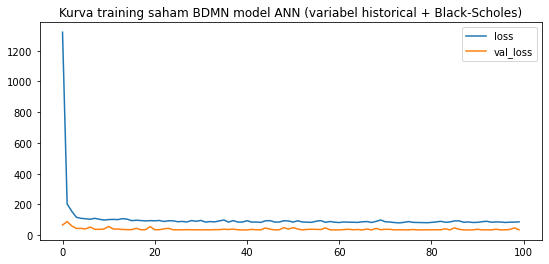

In [255]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_bdmn.history)[["loss","val_loss"]].plot()
plt.title("Kurva training saham BDMN model ANN (variabel historical + Black-Scholes)")
plt.show();

In [256]:
# load in saved best peformance
import tensorflow as tf
model_best_bdmn_ann = tf.keras.models.load_model("best_bdmn_ann")  
model_best_bdmn_ann.evaluate(X_test_bdmn, y_test_bdmn)

6/6 [==============================] - 0s 2ms/step - loss: 41.7036 - mae: 41.7036


[41.7036018371582, 41.7036018371582]

In [257]:
y_pred_ann_bdmn = model_best_bdmn_ann.predict(X_test_bdmn)

6/6 [==============================] - 0s 2ms/step


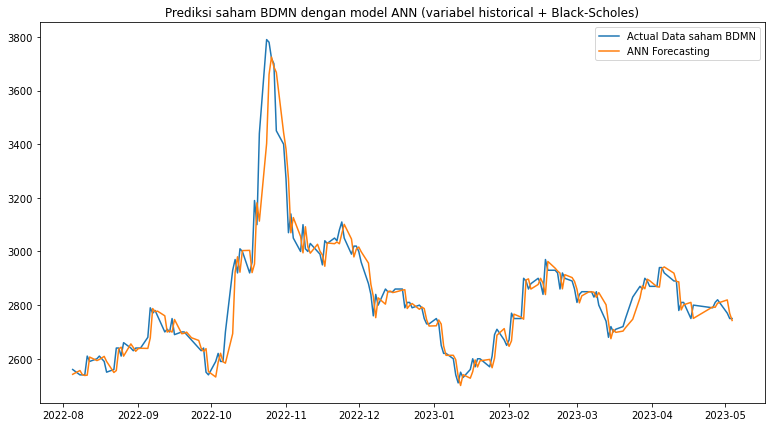

In [258]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bdmn, y_test_bdmn, label="Actual Data saham BDMN")
plt.plot(timestep_test_bdmn, y_pred_ann_bdmn, label="ANN Forecasting")
plt.title("Prediksi saham BDMN dengan model ANN (variabel historical + Black-Scholes)")
plt.legend();

**Model ANN (Variabel historical)**

In [259]:
X_bdmn_historical = X_bdmn.copy()
X_bdmn_historical = X_bdmn_historical.drop(["average_black_scholes"], axis=1)

X_bdmn_historical

Close+1  Close+2  Close+3
Date                                 
2016-01-07   3250.0   3110.0   3150.0
2016-01-08   3000.0   3250.0   3110.0
2016-01-11   3045.0   3000.0   3250.0
2016-01-12   2900.0   3045.0   3000.0
2016-01-13   2970.0   2900.0   3045.0
...             ...      ...      ...
2023-04-27   2790.0   2800.0   2750.0
2023-04-28   2810.0   2790.0   2800.0
2023-05-02   2820.0   2810.0   2790.0
2023-05-03   2770.0   2820.0   2810.0
2023-05-04   2750.0   2770.0   2820.0

[1827 rows x 3 columns]

In [260]:
# make train, validation, test
train_size = int(len(X_bdmn) * 0.7)
validation_size = int(len(X_bdmn) * 0.2)

X_train_bdmn_historical, y_train_bdmn_historical = X_bdmn_historical[:train_size], y_bdmn[:train_size]
X_val_bdmn_historical, y_val_bdmn_historical = X_bdmn_historical[train_size : train_size+validation_size], y_bdmn[train_size : train_size+validation_size]
X_test_bdmn_historical, y_test_bdmn_historical = X_bdmn_historical[train_size+validation_size:], y_bdmn[train_size+validation_size:]

In [261]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_bdmn_historical = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_bdmn_historical.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\bdmn_ann_histo"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_bdmn_historical = model_ann_bdmn_historical.fit(x=X_train_bdmn_historical,
                        y=y_train_bdmn_historical,
                        validation_data=(X_val_bdmn_historical, y_val_bdmn_historical),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
40/40 [==============================] - 2s 27ms/step - loss: 1405.6133 - mae: 1405.6133 - val_loss: 53.1217 - val_mae: 53.1217
Epoch 2/100
40/40 [==============================] - 1s 17ms/step - loss: 124.2891 - mae: 124.2891 - val_loss: 40.5439 - val_mae: 40.5439
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 107.0627 - mae: 107.0627 - val_loss: 43.0167 - val_mae: 43.0167
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 106.8559 - mae: 106.8559 - val_loss: 46.2189 - val_mae: 46.2189
Epoch 5/100
40/40 [==============================] - 1s 27ms/step - loss: 106.6262 - mae: 106.6262 - val_loss: 39.3122 - val_mae: 39.3122
Epoch 6/100
40/40 [==============================] - 0s 3ms/step - loss: 105.6159 - mae: 105.6159 - val_loss: 55.9754 - val_mae: 55.9754
Epoch 7/100
40/40 [==============================] - 1s 20ms/step - loss: 106.8357 - mae: 106.8357 - val_loss: 39.1951 - val_mae: 39.1951
Epoch 8/100
40/40 [================

Epoch 38/100
40/40 [==============================] - 0s 4ms/step - loss: 89.5396 - mae: 89.5396 - val_loss: 35.1971 - val_mae: 35.1971
Epoch 39/100
40/40 [==============================] - 0s 3ms/step - loss: 84.0882 - mae: 84.0882 - val_loss: 34.4635 - val_mae: 34.4635
Epoch 40/100
40/40 [==============================] - 0s 3ms/step - loss: 83.6897 - mae: 83.6897 - val_loss: 39.4359 - val_mae: 39.4359
Epoch 41/100
40/40 [==============================] - 0s 4ms/step - loss: 85.8985 - mae: 85.8985 - val_loss: 38.7382 - val_mae: 38.7382
Epoch 42/100
40/40 [==============================] - 0s 4ms/step - loss: 91.0843 - mae: 91.0843 - val_loss: 38.4683 - val_mae: 38.4683
Epoch 43/100
40/40 [==============================] - 0s 4ms/step - loss: 86.3053 - mae: 86.3053 - val_loss: 36.3306 - val_mae: 36.3306
Epoch 44/100
40/40 [==============================] - 0s 3ms/step - loss: 86.8290 - mae: 86.8290 - val_loss: 38.4988 - val_mae: 38.4988
Epoch 45/100
40/40 [============================

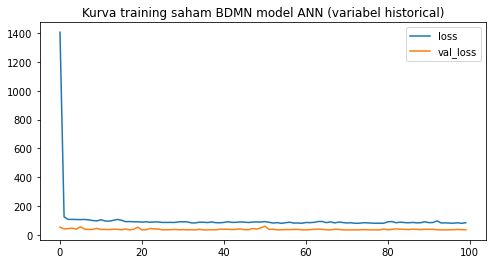

In [262]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [8, 4]
pd.DataFrame(history_ann_bdmn_historical.history)[["loss","val_loss"]].plot()
plt.title("Kurva training saham BDMN model ANN (variabel historical)");

In [263]:
# load in saved best peformance
import tensorflow as tf
model_best_bdmn_ann_historical = tf.keras.models.load_model("bdmn_ann_histo")  
model_best_bdmn_ann_historical.evaluate(X_test_bdmn_historical, y_test_bdmn_historical)

6/6 [==============================] - 0s 1ms/step - loss: 41.1437 - mae: 41.1437


[41.1436882019043, 41.1436882019043]

In [264]:
y_pred_ann_bdmn_historical = model_best_bdmn_ann_historical.predict(X_test_bdmn_historical)

6/6 [==============================] - 0s 2ms/step


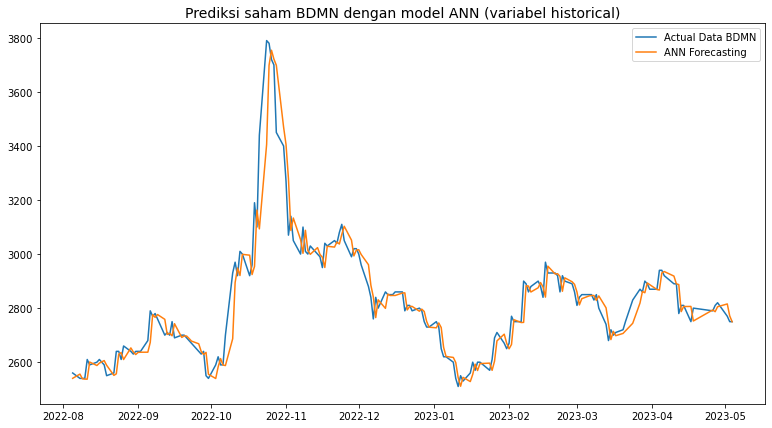

In [265]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_bdmn, y_test_bdmn_historical, label="Actual Data BDMN")
plt.plot(timestep_test_bdmn, y_pred_ann_bdmn_historical, label="ANN Forecasting")
plt.title("Prediksi saham BDMN dengan model ANN (variabel historical)", fontsize=14)
plt.legend();

### Saham IHSG

In [54]:
ihsg

Date        Close
0    2016-01-04  4525.918945
1    2016-01-05  4557.821777
2    2016-01-06  4608.981934
3    2016-01-07  4530.448242
4    2016-01-08  4546.288086
...         ...          ...
1829 2023-04-28  6915.715820
1830 2023-05-02  6863.301758
1831 2023-05-03  6812.722168
1832 2023-05-04  6844.026855
1833 2023-05-05  6787.630859

[1834 rows x 2 columns]

In [55]:
ihsg = ihsg.set_index(["Date"])

In [56]:
ihsg

Close
Date                   
2016-01-04  4525.918945
2016-01-05  4557.821777
2016-01-06  4608.981934
2016-01-07  4530.448242
2016-01-08  4546.288086
...                 ...
2023-04-28  6915.715820
2023-05-02  6863.301758
2023-05-03  6812.722168
2023-05-04  6844.026855
2023-05-05  6787.630859

[1834 rows x 1 columns]

In [57]:
ihsg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1834 entries, 2016-01-04 to 2023-05-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1785 non-null   float64
dtypes: float64(1)
memory usage: 28.7 KB


In [58]:
WINDOW_SIZE = 3

In [59]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    ihsg[f"Close+{i+1}"] = ihsg["Close"].shift(periods=i+1)
ihsg.head(10)

Close      Close+1      Close+2      Close+3
Date                                                          
2016-01-04  4525.918945          NaN          NaN          NaN
2016-01-05  4557.821777  4525.918945          NaN          NaN
2016-01-06  4608.981934  4557.821777  4525.918945          NaN
2016-01-07  4530.448242  4608.981934  4557.821777  4525.918945
2016-01-08  4546.288086  4530.448242  4608.981934  4557.821777
2016-01-11  4465.482910  4546.288086  4530.448242  4608.981934
2016-01-12  4512.526855  4465.482910  4546.288086  4530.448242
2016-01-13  4537.179199  4512.526855  4465.482910  4546.288086
2016-01-14  4513.181152  4537.179199  4512.526855  4465.482910
2016-01-15  4523.976074  4513.181152  4537.179199  4512.526855

In [61]:
timesteps = ihsg.dropna().index.to_numpy()
close = ihsg.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([4530.448242, 4546.288086, 4465.48291 , 4512.526855, 4537.179199,
        4513.181152, 4523.976074, 4481.275879, 4491.736816, 4427.984863]))

In [62]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

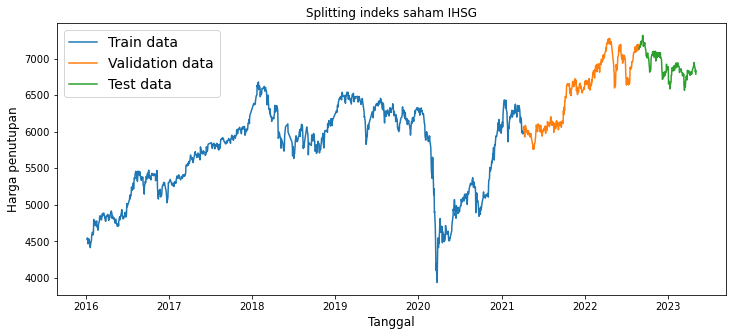

In [63]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting indeks saham IHSG")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [17]:
ihsg.dropna()

Close      Close+1      Close+2      Close+3
Date                                                          
2016-01-07  4530.448242  4608.981934  4557.821777  4525.918945
2016-01-08  4546.288086  4530.448242  4608.981934  4557.821777
2016-01-11  4465.482910  4546.288086  4530.448242  4608.981934
2016-01-12  4512.526855  4465.482910  4546.288086  4530.448242
2016-01-13  4537.179199  4512.526855  4465.482910  4546.288086
...                 ...          ...          ...          ...
2023-04-28  6915.715820  6945.477051  6910.146973  6821.807129
2023-05-02  6863.301758  6915.715820  6945.477051  6910.146973
2023-05-03  6812.722168  6863.301758  6915.715820  6945.477051
2023-05-04  6844.026855  6812.722168  6863.301758  6915.715820
2023-05-05  6787.630859  6844.026855  6812.722168  6863.301758

[1695 rows x 4 columns]

In [229]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_ihsg = ihsg.dropna().drop("Close", axis=1).astype(np.float32) 
y_ihsg = ihsg.dropna()["Close"].astype(np.float32)
X_ihsg

Close+1      Close+2      Close+3
Date                                             
2016-01-07  4608.981934  4557.821777  4525.918945
2016-01-08  4530.448242  4608.981934  4557.821777
2016-01-11  4546.288086  4530.448242  4608.981934
2016-01-12  4465.482910  4546.288086  4530.448242
2016-01-13  4512.526855  4465.482910  4546.288086
...                 ...          ...          ...
2023-04-28  6945.477051  6910.146973  6821.807129
2023-05-02  6915.715820  6945.477051  6910.146973
2023-05-03  6863.301758  6915.715820  6945.477051
2023-05-04  6812.722168  6863.301758  6915.715820
2023-05-05  6844.026855  6812.722168  6863.301758

[1695 rows x 3 columns]

In [230]:
y_ihsg

Date
2016-01-07    4530.448242
2016-01-08    4546.288086
2016-01-11    4465.482910
2016-01-12    4512.526855
2016-01-13    4537.179199
                 ...     
2023-04-28    6915.715820
2023-05-02    6863.301758
2023-05-03    6812.722168
2023-05-04    6844.026855
2023-05-05    6787.630859
Name: Close, Length: 1695, dtype: float32

In [231]:
# make train, validation, test
train_size = int(len(X_ihsg) * 0.7)
validation_size = int(len(X_ihsg) * 0.2)

X_train_ihsg, y_train_ihsg = X_ihsg[:train_size], y_ihsg[:train_size]
X_val_ihsg, y_val_ihsg = X_ihsg[train_size : train_size+validation_size], y_ihsg[train_size : train_size+validation_size]
X_test_ihsg, y_test_ihsg = X_ihsg[train_size+validation_size:], y_ihsg[train_size+validation_size:]

In [274]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_ihsg = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_ihsg.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_ihsg_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_ihsg = model_ann_ihsg.fit(x=X_train_ihsg,
                        y=y_train_ihsg,
                        validation_data=(X_val_ihsg, y_val_ihsg),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
43/43 [==============================] - 2s 22ms/step - loss: 1481.1351 - mae: 1481.1351 - val_loss: 163.0839 - val_mae: 163.0839
Epoch 2/100
43/43 [==============================] - 1s 18ms/step - loss: 63.0687 - mae: 63.0687 - val_loss: 62.8794 - val_mae: 62.8794
Epoch 3/100
43/43 [==============================] - 1s 21ms/step - loss: 52.3170 - mae: 52.3170 - val_loss: 52.7710 - val_mae: 52.7710
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 49.4023 - mae: 49.4023 - val_loss: 61.6618 - val_mae: 61.6618
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 53.5578 - mae: 53.5578 - val_loss: 53.4401 - val_mae: 53.4401
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 51.5558 - mae: 51.5558 - val_loss: 53.7788 - val_mae: 53.7788
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 50.9754 - mae: 50.9754 - val_loss: 71.7359 - val_mae: 71.7359
Epoch 8/100
43/43 [===========================

43/43 [==============================] - 1s 20ms/step - loss: 48.3550 - mae: 48.3550 - val_loss: 47.2141 - val_mae: 47.2141
Epoch 42/100
43/43 [==============================] - 0s 3ms/step - loss: 48.4446 - mae: 48.4446 - val_loss: 47.8635 - val_mae: 47.8635
Epoch 43/100
43/43 [==============================] - 0s 3ms/step - loss: 52.4381 - mae: 52.4381 - val_loss: 63.4275 - val_mae: 63.4275
Epoch 44/100
43/43 [==============================] - 0s 3ms/step - loss: 50.1651 - mae: 50.1651 - val_loss: 47.5067 - val_mae: 47.5067
Epoch 45/100
43/43 [==============================] - 0s 3ms/step - loss: 45.3086 - mae: 45.3086 - val_loss: 51.2888 - val_mae: 51.2888
Epoch 46/100
43/43 [==============================] - 0s 4ms/step - loss: 45.8011 - mae: 45.8011 - val_loss: 77.4710 - val_mae: 77.4710
Epoch 47/100
43/43 [==============================] - 0s 4ms/step - loss: 48.4347 - mae: 48.4347 - val_loss: 48.2508 - val_mae: 48.2508
Epoch 48/100
43/43 [==============================] - 0s 4ms

Epoch 91/100
43/43 [==============================] - 0s 3ms/step - loss: 45.6847 - mae: 45.6847 - val_loss: 44.6282 - val_mae: 44.6282
Epoch 92/100
43/43 [==============================] - 0s 4ms/step - loss: 42.1896 - mae: 42.1896 - val_loss: 66.6225 - val_mae: 66.6225
Epoch 93/100
43/43 [==============================] - 0s 5ms/step - loss: 42.9705 - mae: 42.9705 - val_loss: 45.8960 - val_mae: 45.8960
Epoch 94/100
43/43 [==============================] - 0s 4ms/step - loss: 45.7330 - mae: 45.7330 - val_loss: 47.1222 - val_mae: 47.1222
Epoch 95/100
43/43 [==============================] - 0s 3ms/step - loss: 55.8228 - mae: 55.8228 - val_loss: 57.2594 - val_mae: 57.2594
Epoch 96/100
43/43 [==============================] - 0s 6ms/step - loss: 42.0700 - mae: 42.0700 - val_loss: 44.5871 - val_mae: 44.5871
Epoch 97/100
43/43 [==============================] - 0s 3ms/step - loss: 42.3590 - mae: 42.3590 - val_loss: 53.1962 - val_mae: 53.1962
Epoch 98/100
43/43 [============================

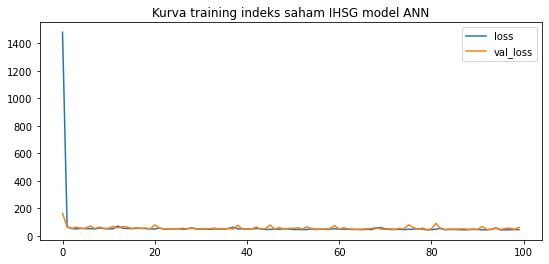

In [275]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_ihsg.history)[["loss","val_loss"]].plot()
plt.title("Kurva training indeks saham IHSG model ANN")
plt.show();

In [238]:
# load in saved best peformance
import tensorflow as tf
model_best_ihsg_ann = tf.keras.models.load_model("best_ihsg_ann")  
model_best_ihsg_ann.evaluate(X_test_ihsg, y_test_ihsg)

6/6 [==============================] - 0s 2ms/step - loss: 37.8609 - mae: 37.8609


[37.86091613769531, 37.86091613769531]

In [233]:
y_pred_ann_ihsg = model_best_ihsg_ann.predict(X_test_ihsg)

6/6 [==============================] - 0s 1ms/step


In [235]:
timestep_test_ihsg = X_test_ihsg.index.to_numpy()
timestep_test_ihsg

array(['2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15T00:00:00.000000000',
       '2022-09-16T00:00:00.000000000', '2022-09-19T00:00:00.000000000',
       '2022-09-20T00:00:00.000000000', '2022-09-21T00:00:00.000000000',
       '2022-09-22T00:00:00.000000000', '2022-09-23T00:00:00.000000000',
       '2022-09-26T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
       '2022-09-28T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
       '2022-10-04T00:00:00.000000000', '2022-10-05

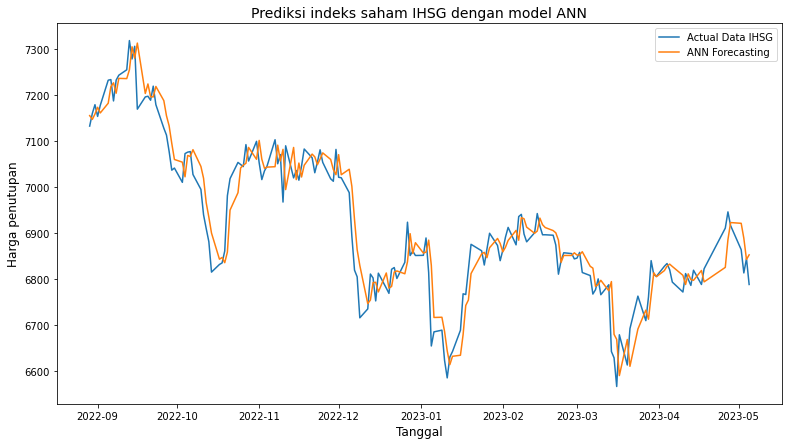

In [239]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_ihsg, y_test_ihsg, label="Actual Data IHSG")
plt.plot(timestep_test_ihsg, y_pred_ann_ihsg, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi indeks saham IHSG dengan model ANN", fontsize=14)
plt.legend();

### LQ45

In [64]:
lq45

Date       Close
0    2016-01-04  782.200012
1    2016-01-05  789.619995
2    2016-01-06  802.130005
3    2016-01-07  785.799988
4    2016-01-08  790.059998
...         ...         ...
1829 2023-04-28  961.750000
1830 2023-05-02  955.609985
1831 2023-05-03  947.650024
1832 2023-05-04  952.280029
1833 2023-05-05  945.049988

[1834 rows x 2 columns]

In [65]:
lq45 = lq45.set_index(["Date"])

In [66]:
# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
    lq45[f"Close+{i+1}"] = lq45["Close"].shift(periods=i+1)
lq45.head(10)

Close     Close+1     Close+2     Close+3
Date                                                      
2016-01-04  782.200012         NaN         NaN         NaN
2016-01-05  789.619995  782.200012         NaN         NaN
2016-01-06  802.130005  789.619995  782.200012         NaN
2016-01-07  785.799988  802.130005  789.619995  782.200012
2016-01-08  790.059998  785.799988  802.130005  789.619995
2016-01-11  773.440002  790.059998  785.799988  802.130005
2016-01-12  786.919983  773.440002  790.059998  785.799988
2016-01-13  793.299988  786.919983  773.440002  790.059998
2016-01-14  786.419983  793.299988  786.919983  773.440002
2016-01-15  784.219971  786.419983  793.299988  786.919983

In [67]:
timesteps = lq45.dropna().index.to_numpy()
close = lq45.dropna()['Close'].to_numpy()

timesteps[:10], close[:10]

(array(['2016-01-07T00:00:00.000000000', '2016-01-08T00:00:00.000000000',
        '2016-01-11T00:00:00.000000000', '2016-01-12T00:00:00.000000000',
        '2016-01-13T00:00:00.000000000', '2016-01-14T00:00:00.000000000',
        '2016-01-15T00:00:00.000000000', '2016-01-18T00:00:00.000000000',
        '2016-01-19T00:00:00.000000000', '2016-01-20T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([785.799988, 790.059998, 773.440002, 786.919983, 793.299988,
        786.419983, 784.219971, 776.219971, 782.429993, 769.130005]))

In [68]:
train_size = int(len(close) * 0.7)
validation_size = int(len(close) * 0.2)

X_train_plot, y_train_plot = timesteps[:train_size], close[:train_size]
X_val_plot, y_val_plot = timesteps[train_size : train_size+validation_size], close[train_size : train_size+validation_size]
X_test_plot, y_test_plot = timesteps[train_size+validation_size:], close[train_size+validation_size:]

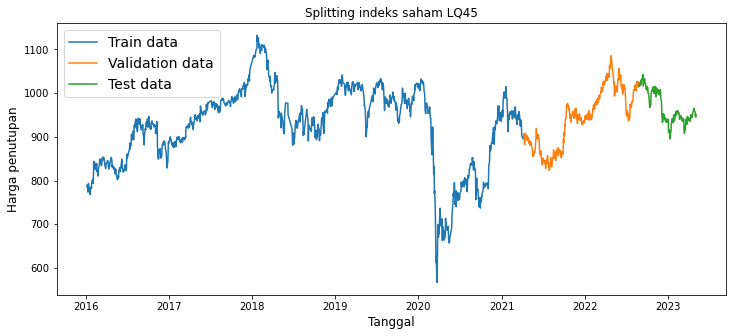

In [69]:
# Plot correctly made splits
plt.figure(figsize=(12,5))
plt.plot(X_train_plot, y_train_plot, label="Train data")
plt.plot(X_val_plot, y_val_plot, label="Validation data")
plt.plot(X_test_plot, y_test_plot, label="Test data")
plt.title("Splitting indeks saham LQ45")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.legend(fontsize=14)
plt.show();

In [243]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X_lq45 = lq45.dropna().drop("Close", axis=1).astype(np.float32) 
y_lq45 = lq45.dropna()["Close"].astype(np.float32)
X_lq45.head()

Close+1     Close+2     Close+3
Date                                          
2016-01-07  802.130005  789.619995  782.200012
2016-01-08  785.799988  802.130005  789.619995
2016-01-11  790.059998  785.799988  802.130005
2016-01-12  773.440002  790.059998  785.799988
2016-01-13  786.919983  773.440002  790.059998

In [244]:
# make train, validation, test
train_size = int(len(X_lq45) * 0.7)
validation_size = int(len(X_lq45) * 0.2)

X_train_lq45, y_train_lq45 = X_lq45[:train_size], y_lq45[:train_size]
X_val_lq45, y_val_lq45 = X_lq45[train_size : train_size+validation_size], y_lq45[train_size : train_size+validation_size]
X_test_lq45, y_test_lq45 = X_lq45[train_size+validation_size:], y_lq45[train_size+validation_size:]

In [285]:
# membuat model untuk prediksi saham 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])


In [286]:
tf.keras.utils.set_random_seed(42)

#make multivariate time series model
model_ann_lq45 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(1, activation="linear")
])

#2. compile
model_ann_lq45.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

#3. checkpoint callback
checkpoint_filepath = r"C:\Users\ACER\Documents\Data Science & Machine Learning\Jupyter Notebook\Skripsi Machine Learning\Mengolah Data\Mengolah Data Final (use skenario 2)\best_lq45_ann"
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               verbose=0,
                                                               save_best_only=True)


# 4. fit the model
history_ann_lq45 = model_ann_lq45.fit(x=X_train_lq45,
                        y=y_train_lq45,
                        validation_data=(X_val_lq45, y_val_lq45),
                        epochs=100,
                        callbacks=[model_checkpoint_callback])

Epoch 1/100
43/43 [==============================] - 1s 24ms/step - loss: 244.1315 - mae: 244.1315 - val_loss: 24.4675 - val_mae: 24.4675
Epoch 2/100
43/43 [==============================] - 1s 18ms/step - loss: 12.7837 - mae: 12.7837 - val_loss: 8.9778 - val_mae: 8.9778
Epoch 3/100
43/43 [==============================] - 1s 19ms/step - loss: 10.4208 - mae: 10.4208 - val_loss: 8.9448 - val_mae: 8.9448
Epoch 4/100
43/43 [==============================] - 0s 4ms/step - loss: 10.3274 - mae: 10.3274 - val_loss: 10.1423 - val_mae: 10.1423
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 10.8891 - mae: 10.8891 - val_loss: 9.6272 - val_mae: 9.6272
Epoch 6/100
43/43 [==============================] - 0s 3ms/step - loss: 11.0814 - mae: 11.0814 - val_loss: 9.7587 - val_mae: 9.7587
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - loss: 11.3809 - mae: 11.3809 - val_loss: 11.5357 - val_mae: 11.5357
Epoch 8/100
43/43 [==============================] - 0s 3m

43/43 [==============================] - 1s 25ms/step - loss: 11.1952 - mae: 11.1952 - val_loss: 8.0194 - val_mae: 8.0194
Epoch 39/100
43/43 [==============================] - 0s 4ms/step - loss: 9.4639 - mae: 9.4639 - val_loss: 9.8550 - val_mae: 9.8550
Epoch 40/100
43/43 [==============================] - 0s 3ms/step - loss: 9.7029 - mae: 9.7029 - val_loss: 8.3789 - val_mae: 8.3789
Epoch 41/100
43/43 [==============================] - 0s 4ms/step - loss: 10.2282 - mae: 10.2282 - val_loss: 8.1366 - val_mae: 8.1366
Epoch 42/100
43/43 [==============================] - 0s 3ms/step - loss: 9.8867 - mae: 9.8867 - val_loss: 8.4354 - val_mae: 8.4354
Epoch 43/100
43/43 [==============================] - 0s 3ms/step - loss: 9.7369 - mae: 9.7369 - val_loss: 8.3462 - val_mae: 8.3462
Epoch 44/100
43/43 [==============================] - 0s 4ms/step - loss: 9.7907 - mae: 9.7907 - val_loss: 10.3852 - val_mae: 10.3852
Epoch 45/100
43/43 [==============================] - 0s 3ms/step - loss: 9.3681 -

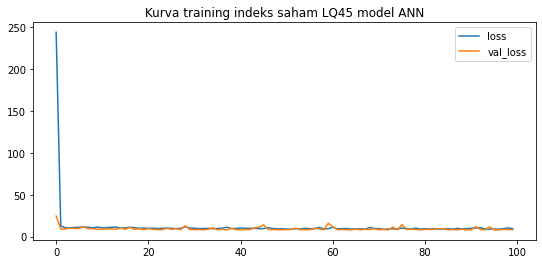

In [287]:
# plot the loss curves
plt.rcParams['figure.figsize'] = [9, 4]
pd.DataFrame(history_ann_lq45.history)[["loss","val_loss"]].plot()
plt.title("Kurva training indeks saham LQ45 model ANN")
plt.show();

In [245]:
# load in saved best peformance
import tensorflow as tf
model_best_lq45_ann = tf.keras.models.load_model("best_lq45_ann")  
model_best_lq45_ann.evaluate(X_test_lq45, y_test_lq45)

6/6 [==============================] - 0s 2ms/step - loss: 6.0912 - mae: 6.0912


[6.09116792678833, 6.09116792678833]

In [246]:
y_pred_ann_lq45 = model_best_lq45_ann.predict(X_test_lq45)

6/6 [==============================] - 0s 1ms/step


In [247]:
timestep_test_lq45 = X_test_lq45.index.to_numpy()
timestep_test_lq45

array(['2022-08-29T00:00:00.000000000', '2022-08-30T00:00:00.000000000',
       '2022-08-31T00:00:00.000000000', '2022-09-01T00:00:00.000000000',
       '2022-09-02T00:00:00.000000000', '2022-09-05T00:00:00.000000000',
       '2022-09-06T00:00:00.000000000', '2022-09-07T00:00:00.000000000',
       '2022-09-08T00:00:00.000000000', '2022-09-09T00:00:00.000000000',
       '2022-09-12T00:00:00.000000000', '2022-09-13T00:00:00.000000000',
       '2022-09-14T00:00:00.000000000', '2022-09-15T00:00:00.000000000',
       '2022-09-16T00:00:00.000000000', '2022-09-19T00:00:00.000000000',
       '2022-09-20T00:00:00.000000000', '2022-09-21T00:00:00.000000000',
       '2022-09-22T00:00:00.000000000', '2022-09-23T00:00:00.000000000',
       '2022-09-26T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
       '2022-09-28T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
       '2022-09-30T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
       '2022-10-04T00:00:00.000000000', '2022-10-05

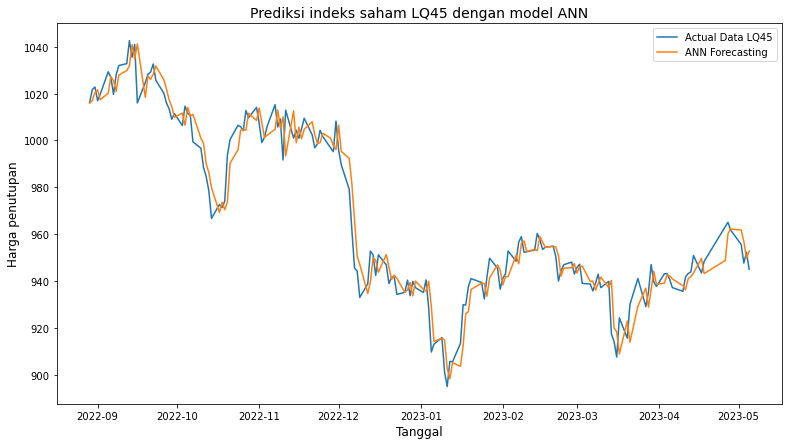

In [248]:
plt.figure(figsize=(13,7))
plt.plot(timestep_test_lq45, y_test_lq45, label="Actual Data LQ45")
plt.plot(timestep_test_lq45, y_pred_ann_lq45, label="ANN Forecasting")
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Harga penutupan", fontsize=12)
plt.title("Prediksi indeks saham LQ45 dengan model ANN", fontsize=14)
plt.legend();

In [292]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

def evaluasi(saham,y_true, y_pred_ann_1,y_pred_ann_2, y_pred_ann_3):
    mae_ann_1 = mean_absolute_error(y_true, y_pred_ann_1)
    mape_ann_1 = mean_absolute_percentage_error(y_true, y_pred_ann_1)*100
    mae_ann_2 = mean_absolute_error(y_true, y_pred_ann_2)
    mape_ann_2 = mean_absolute_percentage_error(y_true, y_pred_ann_2)*100
    mae_ann_3 = mean_absolute_error(y_true, y_pred_ann_3)
    mape_ann_3 = mean_absolute_percentage_error(y_true, y_pred_ann_3)*100
    print(color.BOLD + f"Jenis Saham {saham}\n" + color.END)
    print(color.BOLD + "Model Black-Scholes termodifikasi:" + color.END)
    print(f"MAE = {mae_ann_1} \nMAPE = {round(mape_ann_1,2)} % \n")
    print(color.BOLD + "Model ANN (Black-Scholes modified & historical):" + color.END)
    print(f"MAE = {mae_ann_2} \nMAPE = {round(mape_ann_2,2)} % \n")
    print(color.BOLD + "Model ANN (historical data):" + color.END)
    print(f"MAE = {mae_ann_3} \nMAPE = {round(mape_ann_3,2)} %")

### Sektor alat berat

In [293]:
evaluasi("UNTR", y_test_untr,y_pred_untr_black_scholes, y_pred_ann_untr, y_pred_ann_untr_historical)

Jenis Saham UNTR

Model Black-Scholes termodifikasi:
MAE = 2177.00146484375 
MAPE = 7.41 % 

Model ANN (Black-Scholes modified & historical):
MAE = 445.58160400390625 
MAPE = 1.55 % 

Model ANN (historical data):
MAE = 444.04339599609375 
MAPE = 1.54 %


In [294]:
evaluasi("PTRO",y_test_ptro,y_pred_ptro_black_scholes, y_pred_ann_ptro, y_pred_ann_ptro_historical)

Jenis Saham PTRO

Model Black-Scholes termodifikasi:
MAE = 433.6765441894531 
MAPE = 10.43 % 

Model ANN (Black-Scholes modified & historical):
MAE = 69.71307373046875 
MAPE = 1.66 % 

Model ANN (historical data):
MAE = 69.49156951904297 
MAPE = 1.65 %


In [295]:
evaluasi("HEXA",y_test_hexa,y_pred_hexa_black_scholes, y_pred_ann_hexa, y_pred_ann_hexa_historical)

Jenis Saham HEXA

Model Black-Scholes termodifikasi:
MAE = 329.593994140625 
MAPE = 5.45 % 

Model ANN (Black-Scholes modified & historical):
MAE = 55.748870849609375 
MAPE = 0.94 % 

Model ANN (historical data):
MAE = 54.725257873535156 
MAPE = 0.93 %


In [296]:
evaluasi("KOBX",y_test_kobx,y_pred_kobx_black_scholes, y_pred_ann_kobx, y_pred_ann_kobx_historical)

Jenis Saham KOBX

Model Black-Scholes termodifikasi:
MAE = 32.3505744934082 
MAPE = 9.86 % 

Model ANN (Black-Scholes modified & historical):
MAE = 6.624276161193848 
MAPE = 2.01 % 

Model ANN (historical data):
MAE = 6.5621137619018555 
MAPE = 1.99 %


### Sektor Bank

In [297]:
evaluasi("BBNI",y_test_bbni,y_pred_bbni_black_scholes, y_pred_ann_bbni, y_pred_ann_bbni_historical)

Jenis Saham BBNI

Model Black-Scholes termodifikasi:
MAE = 477.24639892578125 
MAPE = 5.29 % 

Model ANN (Black-Scholes modified & historical):
MAE = 94.15576171875 
MAPE = 1.04 % 

Model ANN (historical data):
MAE = 93.25624084472656 
MAPE = 1.03 %


In [298]:
evaluasi("BBCA",y_test_bbca,y_pred_bbca_black_scholes, y_pred_ann_bbca, y_pred_ann_bbca_historical)

Jenis Saham BBCA

Model Black-Scholes termodifikasi:
MAE = 402.5522766113281 
MAPE = 4.73 % 

Model ANN (Black-Scholes modified & historical):
MAE = 85.0701675415039 
MAPE = 0.99 % 

Model ANN (historical data):
MAE = 84.33116149902344 
MAPE = 0.98 %


In [299]:
evaluasi("BMRI", y_test_bmri,y_pred_bmri_black_scholes, y_pred_ann_bmri, y_pred_ann_bmri_historical)

Jenis Saham BMRI

Model Black-Scholes termodifikasi:
MAE = 286.25701904296875 
MAPE = 5.64 % 

Model ANN (Black-Scholes modified & historical):
MAE = 102.4110336303711 
MAPE = 1.77 % 

Model ANN (historical data):
MAE = 111.8685073852539 
MAPE = 1.96 %


In [300]:
evaluasi("BBRI", y_test_bbri,y_pred_bbri_black_scholes, y_pred_ann_bbri, y_pred_ann_bbri_historical)

Jenis Saham BBRI

Model Black-Scholes termodifikasi:
MAE = 213.59207153320312 
MAPE = 4.55 % 

Model ANN (Black-Scholes modified & historical):
MAE = 50.35744857788086 
MAPE = 1.08 % 

Model ANN (historical data):
MAE = 50.732666015625 
MAPE = 1.08 %
